## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_A_Cs", "ln_A_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_A_Cs                                                              \
          count      mean       std       min       25%       50%       75%   
Species                                                                       
Alder      13.0  6.249674  1.661129  3.295837  5.840642  6.040255  6.940222   
Aspen       9.0  5.584313  3.039601  2.708050  3.295837  4.204693  6.729824   
Birch      45.0  5.737563  2.249143  2.079442  3.761200  6.173786  7.229839   
Oak         7.0  6.900674  2.917841  2.397895  4.966038  7.753624  9.021902   
Pine      130.0  6.066275  1.963371  1.504077  4.358932  6.564371  7.374614   
Red oak     3.0  3.445685  0.588708  2.833213  3.164860  3.496508  3.751920   
Robinia     1.0  4.394449       NaN  4.394449  4.394449  4.394449  4.394449   
Spruce      1.0  5.176150       NaN  5.176150  5.176150  5.176150  5.176150   

                   ln_A_Sr                                                    \
               max   count      mean       std       min       25%       50%   
Species                                                                        
Alder     9.287301    13.0  6.055811  1.449620  4.094345  4.442651  6.302619   
Aspen    11.366743     9.0  7.575485  2.597130  4.615121  5.209486  7.870930   
Birch    10.332018    45.0  7.671630  2.317833  2.660260  5.752573  7.749322   
Oak      10.177324     7.0  7.188390  2.638333  3.871201  5.248545  7.766417   
Pine     10.468801   130.0  7.470846  1.889243  2.406945  6.165469  7.588295   
Red oak   4.007333     3.0  4.697638  0.334751  4.418841  4.512005  4.605170   
Robinia   4.394449     1.0  7.265430       NaN  7.265430  7.265430  7.265430   
Spruce    5.176150     1.0  7.783224       NaN  7.783224  7.783224  7.783224   

                              
              75%        max  
Species                       
Alder    7.286192   7.649693  
Aspen    8.881836  11.180246  
Birch    8.995909  13.864301  
Oak      8.529114  11.125791  
Pine     8.730280  12.687263  
Red oak  4.837037   5.068904  
Robinia  7.265430   7.265430  
Spruce   7.783224   7.783224

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_A_Sr"
indep_variables = ['Species_ID', 'D_cm', 'F_Soil_ID', 'AEDR_mean',
    'Sr_2021_kBq_m', 'Distance_km', 'Azimuth']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,F_Soil_ID,AEDR_mean,Sr_2021_kBq_m,Distance_km,Azimuth
0,0,26.060965,1,3.524231,998.435843,5.926403,249
1,0,4.303100,1,3.830667,987.750099,6.018960,249
2,0,28.142898,1,0.483571,65.777826,13.046428,189
3,0,14.953551,2,0.364500,69.886752,12.741627,189
4,0,7.208435,2,0.333333,69.993095,12.893213,189


In [11]:
# Columns in "y" data collections
y.head()

,ln_A_Sr
0,9.103868
1,10.083724
2,6.416732
3,5.910797
4,6.139885


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8712571249424637, 0.8909250018891706, 0.8455768349965698]
    Mean: 0.869
    Std: 0.019

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.7856132  0.72414463 0.77558777]
    Mean: 0.762
    Std: 0.027

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5173984818077754, 0.6477229921011936, 0.5928222347114586]
    Mean: 0.586
    Std: 0.053

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.9176503346702123                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.32416217454349816                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.09251860424939151                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 164          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.34765153803612303                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.9176503346702123
Gamma: 0.32416217454349816
Learning_rate: 0.09251860424939151
Max_depth: 2
N_estimators: 164
Subsample: 0.34765153803612303


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:6.56032	validation_1-rmse:6.61049
[1]	validation_0-rmse:6.00907	validation_1-rmse:6.06548
[2]	validation_0-rmse:5.49594	validation_1-rmse:5.56177
[3]	validation_0-rmse:5.03167	validation_1-rmse:5.10173
[4]	validation_0-rmse:4.61127	validation_1-rmse:4.68307
[5]	validation_0-rmse:4.25557	validation_1-rmse:4.32738
[6]	validation_0-rmse:3.88927	validation_1-rmse:3.96135
[7]	validation_0-rmse:3.56159	validation_1-rmse:3.63904


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.26974	validation_1-rmse:3.35005
[9]	validation_0-rmse:3.01105	validation_1-rmse:3.09421
[10]	validation_0-rmse:2.75702	validation_1-rmse:2.83840
[11]	validation_0-rmse:2.54537	validation_1-rmse:2.62173
[12]	validation_0-rmse:2.35235	validation_1-rmse:2.43326
[13]	validation_0-rmse:2.18005	validation_1-rmse:2.26263
[14]	validation_0-rmse:2.01677	validation_1-rmse:2.10155
[15]	validation_0-rmse:1.86656	validation_1-rmse:1.96273
[16]	validation_0-rmse:1.72845	validation_1-rmse:1.83779
[17]	validation_0-rmse:1.61103	validation_1-rmse:1.71758
[18]	validation_0-rmse:1.50595	validation_1-rmse:1.62179
[19]	validation_0-rmse:1.41494	validation_1-rmse:1.54044
[20]	validation_0-rmse:1.32745	validation_1-rmse:1.45253
[21]	validation_0-rmse:1.25172	validation_1-rmse:1.38130
[22]	validation_0-rmse:1.18894	validation_1-rmse:1.32113
[23]	validation_0-rmse:1.12302	validation_1-rmse:1.25964
[24]	validation_0-rmse:1.06081	validation_1-rmse:1.19842
[25]	validation_0-rmse:1.01397	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.52873	validation_1-rmse:6.60180
[1]	validation_0-rmse:5.95314	validation_1-rmse:6.01792
[2]	validation_0-rmse:5.46224	validation_1-rmse:5.53129
[3]	validation_0-rmse:4.99864	validation_1-rmse:5.06205
[4]	validation_0-rmse:4.58575	validation_1-rmse:4.65573
[5]	validation_0-rmse:4.19851	validation_1-rmse:4.27170
[6]	validation_0-rmse:3.81996	validation_1-rmse:3.89926
[7]	validation_0-rmse:3.51334	validation_1-rmse:3.58512
[8]	validation_0-rmse:3.22207	validation_1-rmse:3.29082
[9]	validation_0-rmse:2.96663	validation_1-rmse:3.03869
[10]	validation_0-rmse:2.74503	validation_1-rmse:2.79992
[11]	validation_0-rmse:2.52822	validation_1-rmse:2.56362
[12]	validation_0-rmse:2.35353	validation_1-rmse:2.39490
[13]	validation_0-rmse:2.18855	validation_1-rmse:2.24561
[14]	validation_0-rmse:2.01640	validation_1-rmse:2.07624
[15]	validation_0-rmse:1.86187	validation_1-rmse:1.91218
[16]	validation_0-rmse:1.72744	validation_1-rmse:1.78136
[17]	validation_0-rmse:1.62405	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.99692	validation_1-rmse:5.75895
[2]	validation_0-rmse:5.49186	validation_1-rmse:5.24222
[3]	validation_0-rmse:5.02787	validation_1-rmse:4.78849
[4]	validation_0-rmse:4.60537	validation_1-rmse:4.37946
[5]	validation_0-rmse:4.21620	validation_1-rmse:3.98398
[6]	validation_0-rmse:3.86305	validation_1-rmse:3.65574
[7]	validation_0-rmse:3.53924	validation_1-rmse:3.33588
[8]	validation_0-rmse:3.23995	validation_1-rmse:3.06317
[9]	validation_0-rmse:2.99679	validation_1-rmse:2.83978
[10]	validation_0-rmse:2.75251	validation_1-rmse:2.61054
[11]	validation_0-rmse:2.54843	validation_1-rmse:2.42495
[12]	validation_0-rmse:2.35938	validation_1-rmse:2.24824
[13]	validation_0-rmse:2.18311	validation_1-rmse:2.08083
[14]	validation_0-rmse:2.01761	validation_1-rmse:1.94369
[15]	validation_0-rmse:1.85893	validation_1-rmse:1.80771
[16]	validation_0-rmse:1.73323	validation_1-rmse:1.70981
[17]	validation_0-rmse:1.62517	validation_1-rmse:1.62794
[18]	validation_0-rmse:1.51727	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.00408	validation_1-rmse:5.11887
[4]	validation_0-rmse:4.58830	validation_1-rmse:4.69572
[5]	validation_0-rmse:4.22681	validation_1-rmse:4.33133
[6]	validation_0-rmse:3.88929	validation_1-rmse:3.98145
[7]	validation_0-rmse:3.57605	validation_1-rmse:3.65868
[8]	validation_0-rmse:3.29971	validation_1-rmse:3.37286
[9]	validation_0-rmse:3.01772	validation_1-rmse:3.07589
[10]	validation_0-rmse:2.80664	validation_1-rmse:2.86112
[11]	validation_0-rmse:2.59200	validation_1-rmse:2.63919
[12]	validation_0-rmse:2.37658	validation_1-rmse:2.41778
[13]	validation_0-rmse:2.20252	validation_1-rmse:2.23125
[14]	validation_0-rmse:2.06333	validation_1-rmse:2.08727
[15]	validation_0-rmse:1.91717	validation_1-rmse:1.91528
[16]	validation_0-rmse:1.79009	validation_1-rmse:1.77888
[17]	validation_0-rmse:1.67914	validation_1-rmse:1.66505
[18]	validation_0-rmse:1.55585	validation_1-rmse:1.53696
[19]	validation_0-rmse:1.46465	validation_1-rmse:1.44055
[20]	validation_0-rmse:1.37100	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.93467	validation_1-rmse:3.81299
[7]	validation_0-rmse:3.60401	validation_1-rmse:3.49030
[8]	validation_0-rmse:3.30143	validation_1-rmse:3.16742
[9]	validation_0-rmse:3.04030	validation_1-rmse:2.89272
[10]	validation_0-rmse:2.79583	validation_1-rmse:2.64333
[11]	validation_0-rmse:2.59598	validation_1-rmse:2.44401
[12]	validation_0-rmse:2.40147	validation_1-rmse:2.25371
[13]	validation_0-rmse:2.21866	validation_1-rmse:2.06699
[14]	validation_0-rmse:2.05726	validation_1-rmse:1.93347
[15]	validation_0-rmse:1.90599	validation_1-rmse:1.77628
[16]	validation_0-rmse:1.77188	validation_1-rmse:1.63652
[17]	validation_0-rmse:1.64804	validation_1-rmse:1.50884
[18]	validation_0-rmse:1.55444	validation_1-rmse:1.42139
[19]	validation_0-rmse:1.46491	validation_1-rmse:1.33773
[20]	validation_0-rmse:1.37995	validation_1-rmse:1.26498
[21]	validation_0-rmse:1.29948	validation_1-rmse:1.20520
[22]	validation_0-rmse:1.21570	validation_1-rmse:1.12182
[23]	validation_0-rmse:1.14569	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.55522	validation_1-rmse:3.60499
[8]	validation_0-rmse:3.24884	validation_1-rmse:3.30887
[9]	validation_0-rmse:2.99414	validation_1-rmse:3.05767
[10]	validation_0-rmse:2.74633	validation_1-rmse:2.79479
[11]	validation_0-rmse:2.53912	validation_1-rmse:2.60414
[12]	validation_0-rmse:2.34321	validation_1-rmse:2.38615
[13]	validation_0-rmse:2.15337	validation_1-rmse:2.19439
[14]	validation_0-rmse:1.99312	validation_1-rmse:2.02010
[15]	validation_0-rmse:1.86295	validation_1-rmse:1.88597
[16]	validation_0-rmse:1.72549	validation_1-rmse:1.75855
[17]	validation_0-rmse:1.61738	validation_1-rmse:1.64513
[18]	validation_0-rmse:1.51223	validation_1-rmse:1.55864
[19]	validation_0-rmse:1.41079	validation_1-rmse:1.44199
[20]	validation_0-rmse:1.31235	validation_1-rmse:1.34674
[21]	validation_0-rmse:1.23746	validation_1-rmse:1.27402
[22]	validation_0-rmse:1.17660	validation_1-rmse:1.21261
[23]	validation_0-rmse:1.10903	validation_1-rmse:1.13585
[24]	validation_0-rmse:1.05696	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.57032	validation_1-rmse:3.53436
[8]	validation_0-rmse:3.26321	validation_1-rmse:3.19885
[9]	validation_0-rmse:3.00822	validation_1-rmse:2.92895
[10]	validation_0-rmse:2.76640	validation_1-rmse:2.68838
[11]	validation_0-rmse:2.54804	validation_1-rmse:2.45719
[12]	validation_0-rmse:2.33505	validation_1-rmse:2.24461
[13]	validation_0-rmse:2.17056	validation_1-rmse:2.07502
[14]	validation_0-rmse:2.01335	validation_1-rmse:1.91347
[15]	validation_0-rmse:1.85844	validation_1-rmse:1.75578
[16]	validation_0-rmse:1.72912	validation_1-rmse:1.61602
[17]	validation_0-rmse:1.61227	validation_1-rmse:1.50374
[18]	validation_0-rmse:1.49876	validation_1-rmse:1.38402
[19]	validation_0-rmse:1.40919	validation_1-rmse:1.29932
[20]	validation_0-rmse:1.30872	validation_1-rmse:1.20444
[21]	validation_0-rmse:1.22062	validation_1-rmse:1.13243
[22]	validation_0-rmse:1.15121	validation_1-rmse:1.05975
[23]	validation_0-rmse:1.08783	validation_1-rmse:0.99643
[24]	validation_0-rmse:1.03125	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.93751	validation_1-rmse:3.13984
[10]	validation_0-rmse:2.70518	validation_1-rmse:2.92975
[11]	validation_0-rmse:2.50310	validation_1-rmse:2.73134
[12]	validation_0-rmse:2.31965	validation_1-rmse:2.54886
[13]	validation_0-rmse:2.16373	validation_1-rmse:2.39239
[14]	validation_0-rmse:2.01288	validation_1-rmse:2.25221
[15]	validation_0-rmse:1.85375	validation_1-rmse:2.11421
[16]	validation_0-rmse:1.71033	validation_1-rmse:1.98259
[17]	validation_0-rmse:1.60047	validation_1-rmse:1.87573
[18]	validation_0-rmse:1.49068	validation_1-rmse:1.77913
[19]	validation_0-rmse:1.39196	validation_1-rmse:1.69585
[20]	validation_0-rmse:1.30247	validation_1-rmse:1.62333
[21]	validation_0-rmse:1.22562	validation_1-rmse:1.55460
[22]	validation_0-rmse:1.16160	validation_1-rmse:1.50003
[23]	validation_0-rmse:1.09199	validation_1-rmse:1.43515
[24]	validation_0-rmse:1.02416	validation_1-rmse:1.35786
[25]	validation_0-rmse:0.97276	validation_1-rmse:1.31311
[26]	validation_0-rmse:0.91862	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.95653	validation_1-rmse:6.10653
[2]	validation_0-rmse:5.44393	validation_1-rmse:5.56372
[3]	validation_0-rmse:4.98558	validation_1-rmse:5.08803
[4]	validation_0-rmse:4.55949	validation_1-rmse:4.63421
[5]	validation_0-rmse:4.19055	validation_1-rmse:4.27945
[6]	validation_0-rmse:3.84460	validation_1-rmse:3.91390
[7]	validation_0-rmse:3.54962	validation_1-rmse:3.60483
[8]	validation_0-rmse:3.27199	validation_1-rmse:3.31445
[9]	validation_0-rmse:3.00794	validation_1-rmse:3.04657
[10]	validation_0-rmse:2.78213	validation_1-rmse:2.81888
[11]	validation_0-rmse:2.57891	validation_1-rmse:2.62191
[12]	validation_0-rmse:2.37021	validation_1-rmse:2.40466
[13]	validation_0-rmse:2.19417	validation_1-rmse:2.22335
[14]	validation_0-rmse:2.06758	validation_1-rmse:2.09667
[15]	validation_0-rmse:1.90568	validation_1-rmse:1.91667
[16]	validation_0-rmse:1.76216	validation_1-rmse:1.75959
[17]	validation_0-rmse:1.65541	validation_1-rmse:1.65776
[18]	validation_0-rmse:1.53248	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.45653	validation_1-rmse:5.56943
[3]	validation_0-rmse:5.00026	validation_1-rmse:5.08498
[4]	validation_0-rmse:4.57411	validation_1-rmse:4.65307
[5]	validation_0-rmse:4.17230	validation_1-rmse:4.24820
[6]	validation_0-rmse:3.82656	validation_1-rmse:3.89661
[7]	validation_0-rmse:3.52537	validation_1-rmse:3.58219
[8]	validation_0-rmse:3.23609	validation_1-rmse:3.27974
[9]	validation_0-rmse:2.98024	validation_1-rmse:3.02224
[10]	validation_0-rmse:2.73623	validation_1-rmse:2.79007
[11]	validation_0-rmse:2.53624	validation_1-rmse:2.59299
[12]	validation_0-rmse:2.34343	validation_1-rmse:2.41144
[13]	validation_0-rmse:2.16389	validation_1-rmse:2.24610
[14]	validation_0-rmse:1.99831	validation_1-rmse:2.08930
[15]	validation_0-rmse:1.84831	validation_1-rmse:1.95216
[16]	validation_0-rmse:1.71421	validation_1-rmse:1.81355
[17]	validation_0-rmse:1.59956	validation_1-rmse:1.70763
[18]	validation_0-rmse:1.48707	validation_1-rmse:1.59791
[19]	validation_0-rmse:1.38261	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.68865	validation_1-rmse:5.91289
[1]	validation_0-rmse:6.09590	validation_1-rmse:5.35730
[2]	validation_0-rmse:5.56588	validation_1-rmse:4.86460
[3]	validation_0-rmse:5.11012	validation_1-rmse:4.44205
[4]	validation_0-rmse:4.67699	validation_1-rmse:4.02675
[5]	validation_0-rmse:4.27487	validation_1-rmse:3.65909
[6]	validation_0-rmse:3.94207	validation_1-rmse:3.34891
[7]	validation_0-rmse:3.62734	validation_1-rmse:3.07119
[8]	validation_0-rmse:3.33824	validation_1-rmse:2.79098
[9]	validation_0-rmse:3.07250	validation_1-rmse:2.55540
[10]	validation_0-rmse:2.82880	validation_1-rmse:2.33435
[11]	validation_0-rmse:2.62841	validation_1-rmse:2.14843
[12]	validation_0-rmse:2.41737	validation_1-rmse:1.96316
[13]	validation_0-rmse:2.23428	validation_1-rmse:1.80001
[14]	validation_0-rmse:2.08363	validation_1-rmse:1.66775
[15]	validation_0-rmse:1.94228	validation_1-rmse:1.54125


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[16]	validation_0-rmse:1.79245	validation_1-rmse:1.41460
[17]	validation_0-rmse:1.67266	validation_1-rmse:1.31243
[18]	validation_0-rmse:1.56284	validation_1-rmse:1.22931
[19]	validation_0-rmse:1.47730	validation_1-rmse:1.15150
[20]	validation_0-rmse:1.37570	validation_1-rmse:1.08492
[21]	validation_0-rmse:1.28244	validation_1-rmse:1.01240
[22]	validation_0-rmse:1.21508	validation_1-rmse:0.96394
[23]	validation_0-rmse:1.13467	validation_1-rmse:0.91873
[24]	validation_0-rmse:1.08579	validation_1-rmse:0.88467
[25]	validation_0-rmse:1.03078	validation_1-rmse:0.85691
[26]	validation_0-rmse:0.98272	validation_1-rmse:0.84003
[27]	validation_0-rmse:0.94262	validation_1-rmse:0.81794
[28]	validation_0-rmse:0.89742	validation_1-rmse:0.79163
[29]	validation_0-rmse:0.85627	validation_1-rmse:0.77486
[30]	validation_0-rmse:0.81949	validation_1-rmse:0.75548
[31]	validation_0-rmse:0.78740	validation_1-rmse:0.74002
[32]	validation_0-rmse:0.76867	validation_1-rmse:0.73512
[33]	validation_0-rmse:0.74477	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.45921	validation_1-rmse:5.23110
[5]	validation_0-rmse:4.08253	validation_1-rmse:4.82551
[6]	validation_0-rmse:3.76123	validation_1-rmse:4.49847
[7]	validation_0-rmse:3.45528	validation_1-rmse:4.16380
[8]	validation_0-rmse:3.18253	validation_1-rmse:3.86031
[9]	validation_0-rmse:2.92281	validation_1-rmse:3.60580
[10]	validation_0-rmse:2.69304	validation_1-rmse:3.35761
[11]	validation_0-rmse:2.47996	validation_1-rmse:3.14786
[12]	validation_0-rmse:2.30505	validation_1-rmse:2.95987
[13]	validation_0-rmse:2.14637	validation_1-rmse:2.78747
[14]	validation_0-rmse:2.00077	validation_1-rmse:2.62069
[15]	validation_0-rmse:1.85992	validation_1-rmse:2.47839
[16]	validation_0-rmse:1.74130	validation_1-rmse:2.34197
[17]	validation_0-rmse:1.62212	validation_1-rmse:2.21393
[18]	validation_0-rmse:1.52108	validation_1-rmse:2.11560
[19]	validation_0-rmse:1.42718	validation_1-rmse:1.98856
[20]	validation_0-rmse:1.33675	validation_1-rmse:1.87220
[21]	validation_0-rmse:1.26523	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.88211	validation_1-rmse:4.01755
[7]	validation_0-rmse:3.56613	validation_1-rmse:3.70203
[8]	validation_0-rmse:3.27245	validation_1-rmse:3.41112
[9]	validation_0-rmse:3.01453	validation_1-rmse:3.16232
[10]	validation_0-rmse:2.76039	validation_1-rmse:2.90738
[11]	validation_0-rmse:2.56583	validation_1-rmse:2.71840
[12]	validation_0-rmse:2.35476	validation_1-rmse:2.51622
[13]	validation_0-rmse:2.18594	validation_1-rmse:2.34622
[14]	validation_0-rmse:2.02657	validation_1-rmse:2.18393
[15]	validation_0-rmse:1.86237	validation_1-rmse:2.01894
[16]	validation_0-rmse:1.73045	validation_1-rmse:1.89903
[17]	validation_0-rmse:1.62620	validation_1-rmse:1.79383
[18]	validation_0-rmse:1.52398	validation_1-rmse:1.69819
[19]	validation_0-rmse:1.42492	validation_1-rmse:1.60975
[20]	validation_0-rmse:1.34728	validation_1-rmse:1.53641
[21]	validation_0-rmse:1.26271	validation_1-rmse:1.44939
[22]	validation_0-rmse:1.18118	validation_1-rmse:1.36538
[23]	validation_0-rmse:1.12907	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.14963	validation_1-rmse:4.55103
[4]	validation_0-rmse:4.71758	validation_1-rmse:4.15308
[5]	validation_0-rmse:4.32882	validation_1-rmse:3.81449
[6]	validation_0-rmse:3.97056	validation_1-rmse:3.49527
[7]	validation_0-rmse:3.64962	validation_1-rmse:3.20808
[8]	validation_0-rmse:3.33620	validation_1-rmse:2.94296
[9]	validation_0-rmse:3.07448	validation_1-rmse:2.70391
[10]	validation_0-rmse:2.80815	validation_1-rmse:2.45772
[11]	validation_0-rmse:2.59832	validation_1-rmse:2.28212
[12]	validation_0-rmse:2.38598	validation_1-rmse:2.10362
[13]	validation_0-rmse:2.21245	validation_1-rmse:1.96759
[14]	validation_0-rmse:2.03888	validation_1-rmse:1.82560
[15]	validation_0-rmse:1.88948	validation_1-rmse:1.70367
[16]	validation_0-rmse:1.75202	validation_1-rmse:1.58248
[17]	validation_0-rmse:1.63734	validation_1-rmse:1.50046
[18]	validation_0-rmse:1.52741	validation_1-rmse:1.39811
[19]	validation_0-rmse:1.43238	validation_1-rmse:1.32441
[20]	validation_0-rmse:1.34379	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.68200	validation_1-rmse:4.13702
[5]	validation_0-rmse:4.28981	validation_1-rmse:3.76932
[6]	validation_0-rmse:3.93804	validation_1-rmse:3.44610
[7]	validation_0-rmse:3.62306	validation_1-rmse:3.14899
[8]	validation_0-rmse:3.32775	validation_1-rmse:2.87213
[9]	validation_0-rmse:3.05422	validation_1-rmse:2.62482
[10]	validation_0-rmse:2.80845	validation_1-rmse:2.40848
[11]	validation_0-rmse:2.59445	validation_1-rmse:2.22114
[12]	validation_0-rmse:2.40586	validation_1-rmse:2.06210
[13]	validation_0-rmse:2.21899	validation_1-rmse:1.90074
[14]	validation_0-rmse:2.06062	validation_1-rmse:1.74759
[15]	validation_0-rmse:1.90312	validation_1-rmse:1.60378
[16]	validation_0-rmse:1.76939	validation_1-rmse:1.47749
[17]	validation_0-rmse:1.65547	validation_1-rmse:1.38505
[18]	validation_0-rmse:1.54135	validation_1-rmse:1.29425
[19]	validation_0-rmse:1.42474	validation_1-rmse:1.18388
[20]	validation_0-rmse:1.33218	validation_1-rmse:1.11099
[21]	validation_0-rmse:1.25041	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.62010	validation_1-rmse:4.97608
[5]	validation_0-rmse:4.24281	validation_1-rmse:4.60319
[6]	validation_0-rmse:3.88783	validation_1-rmse:4.24440
[7]	validation_0-rmse:3.54574	validation_1-rmse:3.88197
[8]	validation_0-rmse:3.24905	validation_1-rmse:3.57705
[9]	validation_0-rmse:3.01796	validation_1-rmse:3.34574
[10]	validation_0-rmse:2.78133	validation_1-rmse:3.10313
[11]	validation_0-rmse:2.56596	validation_1-rmse:2.87949
[12]	validation_0-rmse:2.37874	validation_1-rmse:2.68688
[13]	validation_0-rmse:2.20155	validation_1-rmse:2.50896
[14]	validation_0-rmse:2.05052	validation_1-rmse:2.34955
[15]	validation_0-rmse:1.91792	validation_1-rmse:2.21109
[16]	validation_0-rmse:1.78551	validation_1-rmse:2.07029
[17]	validation_0-rmse:1.66003	validation_1-rmse:1.93705
[18]	validation_0-rmse:1.54220	validation_1-rmse:1.81381
[19]	validation_0-rmse:1.45437	validation_1-rmse:1.72250
[20]	validation_0-rmse:1.36043	validation_1-rmse:1.62444
[21]	validation_0-rmse:1.27031	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.86346	validation_1-rmse:3.79060
[7]	validation_0-rmse:3.53960	validation_1-rmse:3.48725
[8]	validation_0-rmse:3.24384	validation_1-rmse:3.20683
[9]	validation_0-rmse:2.97436	validation_1-rmse:2.95588
[10]	validation_0-rmse:2.73814	validation_1-rmse:2.73468
[11]	validation_0-rmse:2.52314	validation_1-rmse:2.52829
[12]	validation_0-rmse:2.35179	validation_1-rmse:2.36418
[13]	validation_0-rmse:2.17820	validation_1-rmse:2.20212
[14]	validation_0-rmse:2.01388	validation_1-rmse:2.05429
[15]	validation_0-rmse:1.85796	validation_1-rmse:1.90504
[16]	validation_0-rmse:1.72338	validation_1-rmse:1.78097
[17]	validation_0-rmse:1.60464	validation_1-rmse:1.66301
[18]	validation_0-rmse:1.49763	validation_1-rmse:1.56578
[19]	validation_0-rmse:1.40860	validation_1-rmse:1.47702
[20]	validation_0-rmse:1.32216	validation_1-rmse:1.39657
[21]	validation_0-rmse:1.24660	validation_1-rmse:1.32396
[22]	validation_0-rmse:1.18475	validation_1-rmse:1.27305
[23]	validation_0-rmse:1.12223	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.55576	validation_1-rmse:3.78777
[8]	validation_0-rmse:3.27548	validation_1-rmse:3.52806
[9]	validation_0-rmse:3.01430	validation_1-rmse:3.26424
[10]	validation_0-rmse:2.76052	validation_1-rmse:3.02436
[11]	validation_0-rmse:2.54753	validation_1-rmse:2.81206
[12]	validation_0-rmse:2.35494	validation_1-rmse:2.61943
[13]	validation_0-rmse:2.19435	validation_1-rmse:2.47399
[14]	validation_0-rmse:2.03833	validation_1-rmse:2.31057
[15]	validation_0-rmse:1.88397	validation_1-rmse:2.17371
[16]	validation_0-rmse:1.75564	validation_1-rmse:2.04893
[17]	validation_0-rmse:1.64568	validation_1-rmse:1.93487
[18]	validation_0-rmse:1.53003	validation_1-rmse:1.82664
[19]	validation_0-rmse:1.42550	validation_1-rmse:1.72918
[20]	validation_0-rmse:1.32281	validation_1-rmse:1.62247
[21]	validation_0-rmse:1.24816	validation_1-rmse:1.55285
[22]	validation_0-rmse:1.17639	validation_1-rmse:1.48649
[23]	validation_0-rmse:1.11006	validation_1-rmse:1.42551
[24]	validation_0-rmse:1.04956	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.57430	validation_1-rmse:4.54376
[5]	validation_0-rmse:4.18157	validation_1-rmse:4.12834
[6]	validation_0-rmse:3.84247	validation_1-rmse:3.78399
[7]	validation_0-rmse:3.52285	validation_1-rmse:3.44104
[8]	validation_0-rmse:3.24220	validation_1-rmse:3.13398
[9]	validation_0-rmse:2.97697	validation_1-rmse:2.87125
[10]	validation_0-rmse:2.75831	validation_1-rmse:2.65100
[11]	validation_0-rmse:2.54150	validation_1-rmse:2.44115
[12]	validation_0-rmse:2.37567	validation_1-rmse:2.28123
[13]	validation_0-rmse:2.19374	validation_1-rmse:2.10329
[14]	validation_0-rmse:2.03181	validation_1-rmse:1.95669
[15]	validation_0-rmse:1.88756	validation_1-rmse:1.80342
[16]	validation_0-rmse:1.75308	validation_1-rmse:1.66426
[17]	validation_0-rmse:1.63327	validation_1-rmse:1.55548
[18]	validation_0-rmse:1.52190	validation_1-rmse:1.45640
[19]	validation_0-rmse:1.41654	validation_1-rmse:1.36155
[20]	validation_0-rmse:1.32238	validation_1-rmse:1.28187
[21]	validation_0-rmse:1.23986	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.78440	validation_1-rmse:4.26348
[7]	validation_0-rmse:3.47391	validation_1-rmse:3.96476
[8]	validation_0-rmse:3.18981	validation_1-rmse:3.66860
[9]	validation_0-rmse:2.93132	validation_1-rmse:3.41717
[10]	validation_0-rmse:2.69139	validation_1-rmse:3.17282
[11]	validation_0-rmse:2.48319	validation_1-rmse:2.95461
[12]	validation_0-rmse:2.28473	validation_1-rmse:2.74985
[13]	validation_0-rmse:2.10858	validation_1-rmse:2.57576
[14]	validation_0-rmse:1.94831	validation_1-rmse:2.42314
[15]	validation_0-rmse:1.80985	validation_1-rmse:2.27810
[16]	validation_0-rmse:1.67885	validation_1-rmse:2.13934
[17]	validation_0-rmse:1.56614	validation_1-rmse:2.01618
[18]	validation_0-rmse:1.46131	validation_1-rmse:1.90979
[19]	validation_0-rmse:1.36901	validation_1-rmse:1.80776
[20]	validation_0-rmse:1.29951	validation_1-rmse:1.72391
[21]	validation_0-rmse:1.22495	validation_1-rmse:1.64032
[22]	validation_0-rmse:1.15086	validation_1-rmse:1.55716
[23]	validation_0-rmse:1.08723	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.92227	validation_1-rmse:6.32183
[2]	validation_0-rmse:5.40686	validation_1-rmse:5.80196
[3]	validation_0-rmse:4.94417	validation_1-rmse:5.34657
[4]	validation_0-rmse:4.53376	validation_1-rmse:4.93330
[5]	validation_0-rmse:4.14361	validation_1-rmse:4.53185
[6]	validation_0-rmse:3.79641	validation_1-rmse:4.18129
[7]	validation_0-rmse:3.48939	validation_1-rmse:3.87177
[8]	validation_0-rmse:3.21336	validation_1-rmse:3.60028
[9]	validation_0-rmse:2.97466	validation_1-rmse:3.36593
[10]	validation_0-rmse:2.74986	validation_1-rmse:3.14259
[11]	validation_0-rmse:2.52825	validation_1-rmse:2.91617
[12]	validation_0-rmse:2.33552	validation_1-rmse:2.68403
[13]	validation_0-rmse:2.16770	validation_1-rmse:2.51274
[14]	validation_0-rmse:2.01118	validation_1-rmse:2.35027
[15]	validation_0-rmse:1.86500	validation_1-rmse:2.19749
[16]	validation_0-rmse:1.74070	validation_1-rmse:2.07484
[17]	validation_0-rmse:1.62075	validation_1-rmse:1.96674
[18]	validation_0-rmse:1.50715	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.20008	validation_1-rmse:3.90405
[6]	validation_0-rmse:3.84746	validation_1-rmse:3.57877
[7]	validation_0-rmse:3.52121	validation_1-rmse:3.28824
[8]	validation_0-rmse:3.25224	validation_1-rmse:3.04077
[9]	validation_0-rmse:2.99878	validation_1-rmse:2.81516
[10]	validation_0-rmse:2.76209	validation_1-rmse:2.59960
[11]	validation_0-rmse:2.53181	validation_1-rmse:2.37884
[12]	validation_0-rmse:2.33707	validation_1-rmse:2.20302
[13]	validation_0-rmse:2.15019	validation_1-rmse:2.03691
[14]	validation_0-rmse:1.98194	validation_1-rmse:1.87210
[15]	validation_0-rmse:1.83807	validation_1-rmse:1.74941
[16]	validation_0-rmse:1.70427	validation_1-rmse:1.64877
[17]	validation_0-rmse:1.57015	validation_1-rmse:1.51273
[18]	validation_0-rmse:1.46081	validation_1-rmse:1.40988
[19]	validation_0-rmse:1.37740	validation_1-rmse:1.34640
[20]	validation_0-rmse:1.31242	validation_1-rmse:1.29008
[21]	validation_0-rmse:1.24494	validation_1-rmse:1.24408
[22]	validation_0-rmse:1.18005	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.92209	validation_1-rmse:3.72914
[7]	validation_0-rmse:3.61040	validation_1-rmse:3.44075
[8]	validation_0-rmse:3.31818	validation_1-rmse:3.18685
[9]	validation_0-rmse:3.04948	validation_1-rmse:2.95581
[10]	validation_0-rmse:2.80152	validation_1-rmse:2.71643
[11]	validation_0-rmse:2.60103	validation_1-rmse:2.50615
[12]	validation_0-rmse:2.40984	validation_1-rmse:2.32427
[13]	validation_0-rmse:2.23378	validation_1-rmse:2.14308
[14]	validation_0-rmse:2.08581	validation_1-rmse:1.99279
[15]	validation_0-rmse:1.92851	validation_1-rmse:1.85702
[16]	validation_0-rmse:1.78613	validation_1-rmse:1.73011
[17]	validation_0-rmse:1.66255	validation_1-rmse:1.61129
[18]	validation_0-rmse:1.54701	validation_1-rmse:1.51274
[19]	validation_0-rmse:1.45636	validation_1-rmse:1.42869
[20]	validation_0-rmse:1.37394	validation_1-rmse:1.34638
[21]	validation_0-rmse:1.30344	validation_1-rmse:1.27884
[22]	validation_0-rmse:1.23667	validation_1-rmse:1.23223
[23]	validation_0-rmse:1.17923	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.24879	validation_1-rmse:4.10657
[6]	validation_0-rmse:3.87913	validation_1-rmse:3.73971
[7]	validation_0-rmse:3.56088	validation_1-rmse:3.41151
[8]	validation_0-rmse:3.26396	validation_1-rmse:3.12120
[9]	validation_0-rmse:3.00932	validation_1-rmse:2.86465
[10]	validation_0-rmse:2.76421	validation_1-rmse:2.61497
[11]	validation_0-rmse:2.56165	validation_1-rmse:2.41710
[12]	validation_0-rmse:2.39050	validation_1-rmse:2.23751
[13]	validation_0-rmse:2.22839	validation_1-rmse:2.08777
[14]	validation_0-rmse:2.06231	validation_1-rmse:1.91963
[15]	validation_0-rmse:1.90932	validation_1-rmse:1.78411
[16]	validation_0-rmse:1.76948	validation_1-rmse:1.64249
[17]	validation_0-rmse:1.64796	validation_1-rmse:1.53503
[18]	validation_0-rmse:1.53592	validation_1-rmse:1.42996
[19]	validation_0-rmse:1.42980	validation_1-rmse:1.32799
[20]	validation_0-rmse:1.34097	validation_1-rmse:1.25090
[21]	validation_0-rmse:1.26953	validation_1-rmse:1.17437
[22]	validation_0-rmse:1.19225	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.20680	validation_1-rmse:4.21209
[6]	validation_0-rmse:3.83824	validation_1-rmse:3.83532
[7]	validation_0-rmse:3.52092	validation_1-rmse:3.50684
[8]	validation_0-rmse:3.23289	validation_1-rmse:3.20485
[9]	validation_0-rmse:2.97766	validation_1-rmse:2.94355
[10]	validation_0-rmse:2.73524	validation_1-rmse:2.71029
[11]	validation_0-rmse:2.53445	validation_1-rmse:2.50101
[12]	validation_0-rmse:2.34211	validation_1-rmse:2.31601
[13]	validation_0-rmse:2.15224	validation_1-rmse:2.11692
[14]	validation_0-rmse:1.99741	validation_1-rmse:1.96419
[15]	validation_0-rmse:1.84359	validation_1-rmse:1.81194
[16]	validation_0-rmse:1.70423	validation_1-rmse:1.67901
[17]	validation_0-rmse:1.59350	validation_1-rmse:1.56882
[18]	validation_0-rmse:1.48423	validation_1-rmse:1.46342
[19]	validation_0-rmse:1.39236	validation_1-rmse:1.36445
[20]	validation_0-rmse:1.31107	validation_1-rmse:1.29965
[21]	validation_0-rmse:1.22421	validation_1-rmse:1.22758
[22]	validation_0-rmse:1.14637	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.45797	validation_1-rmse:3.91882
[8]	validation_0-rmse:3.17489	validation_1-rmse:3.63275
[9]	validation_0-rmse:2.92734	validation_1-rmse:3.37458
[10]	validation_0-rmse:2.69680	validation_1-rmse:3.14526
[11]	validation_0-rmse:2.48270	validation_1-rmse:2.91487
[12]	validation_0-rmse:2.29755	validation_1-rmse:2.72662
[13]	validation_0-rmse:2.12727	validation_1-rmse:2.55921
[14]	validation_0-rmse:1.97117	validation_1-rmse:2.42731
[15]	validation_0-rmse:1.83835	validation_1-rmse:2.28948
[16]	validation_0-rmse:1.69427	validation_1-rmse:2.13603
[17]	validation_0-rmse:1.58183	validation_1-rmse:2.02110
[18]	validation_0-rmse:1.47758	validation_1-rmse:1.91132
[19]	validation_0-rmse:1.37737	validation_1-rmse:1.80740
[20]	validation_0-rmse:1.29267	validation_1-rmse:1.71557
[21]	validation_0-rmse:1.20681	validation_1-rmse:1.61425
[22]	validation_0-rmse:1.14113	validation_1-rmse:1.53660
[23]	validation_0-rmse:1.07778	validation_1-rmse:1.46193
[24]	validation_0-rmse:1.01799	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.54394	validation_1-rmse:5.06055
[3]	validation_0-rmse:5.07635	validation_1-rmse:4.59135
[4]	validation_0-rmse:4.64722	validation_1-rmse:4.17439
[5]	validation_0-rmse:4.26753	validation_1-rmse:3.79031
[6]	validation_0-rmse:3.89270	validation_1-rmse:3.41718
[7]	validation_0-rmse:3.57360	validation_1-rmse:3.09532
[8]	validation_0-rmse:3.28028	validation_1-rmse:2.78910
[9]	validation_0-rmse:3.02847	validation_1-rmse:2.54995
[10]	validation_0-rmse:2.78501	validation_1-rmse:2.30554
[11]	validation_0-rmse:2.55406	validation_1-rmse:2.09419
[12]	validation_0-rmse:2.35247	validation_1-rmse:1.90484
[13]	validation_0-rmse:2.18960	validation_1-rmse:1.75237
[14]	validation_0-rmse:2.02098	validation_1-rmse:1.59917
[15]	validation_0-rmse:1.87343	validation_1-rmse:1.45334
[16]	validation_0-rmse:1.73651	validation_1-rmse:1.31765
[17]	validation_0-rmse:1.62719	validation_1-rmse:1.21278
[18]	validation_0-rmse:1.51764	validation_1-rmse:1.11772
[19]	validation_0-rmse:1.41884	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.44348	validation_1-rmse:5.64793
[3]	validation_0-rmse:4.97690	validation_1-rmse:5.18527
[4]	validation_0-rmse:4.55278	validation_1-rmse:4.75496
[5]	validation_0-rmse:4.18754	validation_1-rmse:4.38537
[6]	validation_0-rmse:3.83306	validation_1-rmse:4.04297
[7]	validation_0-rmse:3.50575	validation_1-rmse:3.73223
[8]	validation_0-rmse:3.21696	validation_1-rmse:3.44389
[9]	validation_0-rmse:2.97379	validation_1-rmse:3.20610
[10]	validation_0-rmse:2.73659	validation_1-rmse:2.96473
[11]	validation_0-rmse:2.52827	validation_1-rmse:2.75895
[12]	validation_0-rmse:2.32235	validation_1-rmse:2.55206
[13]	validation_0-rmse:2.14870	validation_1-rmse:2.37219
[14]	validation_0-rmse:1.98702	validation_1-rmse:2.21134
[15]	validation_0-rmse:1.83809	validation_1-rmse:2.06305
[16]	validation_0-rmse:1.71519	validation_1-rmse:1.93785
[17]	validation_0-rmse:1.59985	validation_1-rmse:1.81874
[18]	validation_0-rmse:1.49297	validation_1-rmse:1.71547
[19]	validation_0-rmse:1.39372	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.44580	validation_1-rmse:5.51210
[3]	validation_0-rmse:4.96815	validation_1-rmse:5.02728
[4]	validation_0-rmse:4.55946	validation_1-rmse:4.61849
[5]	validation_0-rmse:4.20363	validation_1-rmse:4.27446
[6]	validation_0-rmse:3.83684	validation_1-rmse:3.90778
[7]	validation_0-rmse:3.51829	validation_1-rmse:3.59182
[8]	validation_0-rmse:3.23795	validation_1-rmse:3.31464
[9]	validation_0-rmse:2.99118	validation_1-rmse:3.06592
[10]	validation_0-rmse:2.76326	validation_1-rmse:2.83243
[11]	validation_0-rmse:2.53988	validation_1-rmse:2.62268
[12]	validation_0-rmse:2.35653	validation_1-rmse:2.43791
[13]	validation_0-rmse:2.19588	validation_1-rmse:2.27560
[14]	validation_0-rmse:2.02927	validation_1-rmse:2.10513
[15]	validation_0-rmse:1.89136	validation_1-rmse:1.96661
[16]	validation_0-rmse:1.74689	validation_1-rmse:1.79380
[17]	validation_0-rmse:1.63862	validation_1-rmse:1.70910
[18]	validation_0-rmse:1.52831	validation_1-rmse:1.57865
[19]	validation_0-rmse:1.42895	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.86450	validation_1-rmse:3.81548
[7]	validation_0-rmse:3.55310	validation_1-rmse:3.50618
[8]	validation_0-rmse:3.28125	validation_1-rmse:3.24040
[9]	validation_0-rmse:3.01854	validation_1-rmse:2.99609
[10]	validation_0-rmse:2.77459	validation_1-rmse:2.75264
[11]	validation_0-rmse:2.57127	validation_1-rmse:2.55744
[12]	validation_0-rmse:2.37117	validation_1-rmse:2.35036
[13]	validation_0-rmse:2.17457	validation_1-rmse:2.14165
[14]	validation_0-rmse:2.00077	validation_1-rmse:1.97539
[15]	validation_0-rmse:1.86839	validation_1-rmse:1.85146
[16]	validation_0-rmse:1.73942	validation_1-rmse:1.74234
[17]	validation_0-rmse:1.61945	validation_1-rmse:1.61610
[18]	validation_0-rmse:1.51484	validation_1-rmse:1.51218
[19]	validation_0-rmse:1.42010	validation_1-rmse:1.41714
[20]	validation_0-rmse:1.32854	validation_1-rmse:1.33432
[21]	validation_0-rmse:1.25122	validation_1-rmse:1.26254
[22]	validation_0-rmse:1.17472	validation_1-rmse:1.20033
[23]	validation_0-rmse:1.09346	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.64710	validation_1-rmse:4.40824
[5]	validation_0-rmse:4.28378	validation_1-rmse:4.05579
[6]	validation_0-rmse:3.92338	validation_1-rmse:3.71034
[7]	validation_0-rmse:3.58439	validation_1-rmse:3.39412
[8]	validation_0-rmse:3.31024	validation_1-rmse:3.13382
[9]	validation_0-rmse:3.06756	validation_1-rmse:2.91354
[10]	validation_0-rmse:2.82268	validation_1-rmse:2.68909
[11]	validation_0-rmse:2.60316	validation_1-rmse:2.47896
[12]	validation_0-rmse:2.39414	validation_1-rmse:2.27537
[13]	validation_0-rmse:2.20241	validation_1-rmse:2.08340
[14]	validation_0-rmse:2.02955	validation_1-rmse:1.91961
[15]	validation_0-rmse:1.90079	validation_1-rmse:1.80778
[16]	validation_0-rmse:1.77226	validation_1-rmse:1.67364
[17]	validation_0-rmse:1.65787	validation_1-rmse:1.56087
[18]	validation_0-rmse:1.54791	validation_1-rmse:1.46281
[19]	validation_0-rmse:1.44924	validation_1-rmse:1.37844
[20]	validation_0-rmse:1.36957	validation_1-rmse:1.29500
[21]	validation_0-rmse:1.28924	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.59512	validation_1-rmse:3.25722
[8]	validation_0-rmse:3.27383	validation_1-rmse:2.93686
[9]	validation_0-rmse:3.02874	validation_1-rmse:2.68937
[10]	validation_0-rmse:2.80246	validation_1-rmse:2.45967
[11]	validation_0-rmse:2.60023	validation_1-rmse:2.25862
[12]	validation_0-rmse:2.41509	validation_1-rmse:2.06710
[13]	validation_0-rmse:2.23551	validation_1-rmse:1.91665
[14]	validation_0-rmse:2.06806	validation_1-rmse:1.75687
[15]	validation_0-rmse:1.92473	validation_1-rmse:1.61840
[16]	validation_0-rmse:1.77853	validation_1-rmse:1.49088
[17]	validation_0-rmse:1.64887	validation_1-rmse:1.37053
[18]	validation_0-rmse:1.52871	validation_1-rmse:1.27242
[19]	validation_0-rmse:1.44480	validation_1-rmse:1.19607
[20]	validation_0-rmse:1.36754	validation_1-rmse:1.12800
[21]	validation_0-rmse:1.28465	validation_1-rmse:1.06589
[22]	validation_0-rmse:1.20592	validation_1-rmse:0.99815
[23]	validation_0-rmse:1.14990	validation_1-rmse:0.94666
[24]	validation_0-rmse:1.09412	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.91262	validation_1-rmse:3.59762
[7]	validation_0-rmse:3.59590	validation_1-rmse:3.29687
[8]	validation_0-rmse:3.29580	validation_1-rmse:3.02081
[9]	validation_0-rmse:3.02638	validation_1-rmse:2.76395
[10]	validation_0-rmse:2.77798	validation_1-rmse:2.53691
[11]	validation_0-rmse:2.55149	validation_1-rmse:2.30888
[12]	validation_0-rmse:2.35906	validation_1-rmse:2.13578
[13]	validation_0-rmse:2.18254	validation_1-rmse:1.97452
[14]	validation_0-rmse:2.00227	validation_1-rmse:1.80753
[15]	validation_0-rmse:1.84863	validation_1-rmse:1.67603
[16]	validation_0-rmse:1.72214	validation_1-rmse:1.56202
[17]	validation_0-rmse:1.58655	validation_1-rmse:1.43804
[18]	validation_0-rmse:1.49105	validation_1-rmse:1.35349
[19]	validation_0-rmse:1.39365	validation_1-rmse:1.26629
[20]	validation_0-rmse:1.30797	validation_1-rmse:1.20698
[21]	validation_0-rmse:1.23348	validation_1-rmse:1.15319
[22]	validation_0-rmse:1.16153	validation_1-rmse:1.09651
[23]	validation_0-rmse:1.10270	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.57974	validation_1-rmse:3.52870
[8]	validation_0-rmse:3.28569	validation_1-rmse:3.23372
[9]	validation_0-rmse:3.01942	validation_1-rmse:2.97209
[10]	validation_0-rmse:2.77577	validation_1-rmse:2.70894
[11]	validation_0-rmse:2.54603	validation_1-rmse:2.48240
[12]	validation_0-rmse:2.36391	validation_1-rmse:2.28938
[13]	validation_0-rmse:2.18005	validation_1-rmse:2.09125
[14]	validation_0-rmse:2.02823	validation_1-rmse:1.93105
[15]	validation_0-rmse:1.90742	validation_1-rmse:1.81230
[16]	validation_0-rmse:1.76749	validation_1-rmse:1.67458
[17]	validation_0-rmse:1.65233	validation_1-rmse:1.55044
[18]	validation_0-rmse:1.56001	validation_1-rmse:1.44829
[19]	validation_0-rmse:1.44920	validation_1-rmse:1.33736
[20]	validation_0-rmse:1.35947	validation_1-rmse:1.25342
[21]	validation_0-rmse:1.27461	validation_1-rmse:1.15965
[22]	validation_0-rmse:1.20098	validation_1-rmse:1.09791
[23]	validation_0-rmse:1.14017	validation_1-rmse:1.04712
[24]	validation_0-rmse:1.07742	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.51071	validation_1-rmse:3.64938
[8]	validation_0-rmse:3.25200	validation_1-rmse:3.38088
[9]	validation_0-rmse:3.00450	validation_1-rmse:3.12920
[10]	validation_0-rmse:2.76993	validation_1-rmse:2.88711
[11]	validation_0-rmse:2.56565	validation_1-rmse:2.68598
[12]	validation_0-rmse:2.36453	validation_1-rmse:2.50340
[13]	validation_0-rmse:2.18478	validation_1-rmse:2.32444
[14]	validation_0-rmse:2.02429	validation_1-rmse:2.17630
[15]	validation_0-rmse:1.90009	validation_1-rmse:2.05594
[16]	validation_0-rmse:1.75989	validation_1-rmse:1.91682
[17]	validation_0-rmse:1.63331	validation_1-rmse:1.79371
[18]	validation_0-rmse:1.52971	validation_1-rmse:1.68587
[19]	validation_0-rmse:1.43411	validation_1-rmse:1.59075
[20]	validation_0-rmse:1.35456	validation_1-rmse:1.51093
[21]	validation_0-rmse:1.27833	validation_1-rmse:1.41942
[22]	validation_0-rmse:1.21389	validation_1-rmse:1.35628
[23]	validation_0-rmse:1.14167	validation_1-rmse:1.29103
[24]	validation_0-rmse:1.07514	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.22699	validation_1-rmse:4.41988
[6]	validation_0-rmse:3.87632	validation_1-rmse:4.05853
[7]	validation_0-rmse:3.54895	validation_1-rmse:3.72688
[8]	validation_0-rmse:3.25650	validation_1-rmse:3.42071
[9]	validation_0-rmse:3.01635	validation_1-rmse:3.18155
[10]	validation_0-rmse:2.78486	validation_1-rmse:2.93999
[11]	validation_0-rmse:2.57214	validation_1-rmse:2.72657
[12]	validation_0-rmse:2.39773	validation_1-rmse:2.56048
[13]	validation_0-rmse:2.21119	validation_1-rmse:2.38400
[14]	validation_0-rmse:2.05227	validation_1-rmse:2.23686
[15]	validation_0-rmse:1.91276	validation_1-rmse:2.06777
[16]	validation_0-rmse:1.78356	validation_1-rmse:1.95396
[17]	validation_0-rmse:1.66807	validation_1-rmse:1.84079
[18]	validation_0-rmse:1.55856	validation_1-rmse:1.71499
[19]	validation_0-rmse:1.44339	validation_1-rmse:1.56992
[20]	validation_0-rmse:1.35318	validation_1-rmse:1.47472
[21]	validation_0-rmse:1.27512	validation_1-rmse:1.40149
[22]	validation_0-rmse:1.20046	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.26159	validation_1-rmse:3.26153
[9]	validation_0-rmse:2.99861	validation_1-rmse:3.01658
[10]	validation_0-rmse:2.77512	validation_1-rmse:2.79207
[11]	validation_0-rmse:2.54344	validation_1-rmse:2.56853
[12]	validation_0-rmse:2.34527	validation_1-rmse:2.38165
[13]	validation_0-rmse:2.16746	validation_1-rmse:2.20711
[14]	validation_0-rmse:2.01835	validation_1-rmse:2.05935
[15]	validation_0-rmse:1.85580	validation_1-rmse:1.89723
[16]	validation_0-rmse:1.72770	validation_1-rmse:1.78442
[17]	validation_0-rmse:1.61954	validation_1-rmse:1.67328
[18]	validation_0-rmse:1.52870	validation_1-rmse:1.57737
[19]	validation_0-rmse:1.42591	validation_1-rmse:1.48013
[20]	validation_0-rmse:1.33909	validation_1-rmse:1.39755
[21]	validation_0-rmse:1.26728	validation_1-rmse:1.32438
[22]	validation_0-rmse:1.19636	validation_1-rmse:1.26704
[23]	validation_0-rmse:1.12992	validation_1-rmse:1.20625
[24]	validation_0-rmse:1.07008	validation_1-rmse:1.14825
[25]	validation_0-rmse:1.01696	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.22481	validation_1-rmse:3.93831
[6]	validation_0-rmse:3.86895	validation_1-rmse:3.59145
[7]	validation_0-rmse:3.56910	validation_1-rmse:3.29310
[8]	validation_0-rmse:3.25562	validation_1-rmse:2.98631
[9]	validation_0-rmse:3.00119	validation_1-rmse:2.73360
[10]	validation_0-rmse:2.74292	validation_1-rmse:2.48890
[11]	validation_0-rmse:2.51284	validation_1-rmse:2.27348
[12]	validation_0-rmse:2.33110	validation_1-rmse:2.11112
[13]	validation_0-rmse:2.16239	validation_1-rmse:1.95225
[14]	validation_0-rmse:1.99463	validation_1-rmse:1.80003
[15]	validation_0-rmse:1.85454	validation_1-rmse:1.66309
[16]	validation_0-rmse:1.71689	validation_1-rmse:1.53918
[17]	validation_0-rmse:1.60628	validation_1-rmse:1.43899
[18]	validation_0-rmse:1.50506	validation_1-rmse:1.34226
[19]	validation_0-rmse:1.40382	validation_1-rmse:1.25667
[20]	validation_0-rmse:1.31832	validation_1-rmse:1.19626
[21]	validation_0-rmse:1.22482	validation_1-rmse:1.13564
[22]	validation_0-rmse:1.16346	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.18108	validation_1-rmse:4.27732
[6]	validation_0-rmse:3.84269	validation_1-rmse:3.94636
[7]	validation_0-rmse:3.52509	validation_1-rmse:3.63891
[8]	validation_0-rmse:3.21947	validation_1-rmse:3.32368
[9]	validation_0-rmse:2.98245	validation_1-rmse:3.09264
[10]	validation_0-rmse:2.74536	validation_1-rmse:2.85279
[11]	validation_0-rmse:2.52890	validation_1-rmse:2.64710
[12]	validation_0-rmse:2.34894	validation_1-rmse:2.46863
[13]	validation_0-rmse:2.17823	validation_1-rmse:2.29251
[14]	validation_0-rmse:2.04100	validation_1-rmse:2.16164
[15]	validation_0-rmse:1.89965	validation_1-rmse:2.02425
[16]	validation_0-rmse:1.76375	validation_1-rmse:1.86763
[17]	validation_0-rmse:1.64604	validation_1-rmse:1.73954
[18]	validation_0-rmse:1.54767	validation_1-rmse:1.64074
[19]	validation_0-rmse:1.47331	validation_1-rmse:1.55291
[20]	validation_0-rmse:1.37789	validation_1-rmse:1.45805
[21]	validation_0-rmse:1.29817	validation_1-rmse:1.38055
[22]	validation_0-rmse:1.21964	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.54899	validation_1-rmse:4.66713
[5]	validation_0-rmse:4.17113	validation_1-rmse:4.28409
[6]	validation_0-rmse:3.81615	validation_1-rmse:3.91050
[7]	validation_0-rmse:3.50058	validation_1-rmse:3.58832
[8]	validation_0-rmse:3.24295	validation_1-rmse:3.32121
[9]	validation_0-rmse:2.97879	validation_1-rmse:3.05383
[10]	validation_0-rmse:2.73643	validation_1-rmse:2.80825
[11]	validation_0-rmse:2.52079	validation_1-rmse:2.59837
[12]	validation_0-rmse:2.33736	validation_1-rmse:2.41362
[13]	validation_0-rmse:2.15114	validation_1-rmse:2.26628
[14]	validation_0-rmse:1.99163	validation_1-rmse:2.11553
[15]	validation_0-rmse:1.84402	validation_1-rmse:2.00241
[16]	validation_0-rmse:1.72112	validation_1-rmse:1.87953
[17]	validation_0-rmse:1.60158	validation_1-rmse:1.76026
[18]	validation_0-rmse:1.48865	validation_1-rmse:1.65553
[19]	validation_0-rmse:1.38504	validation_1-rmse:1.56516
[20]	validation_0-rmse:1.29589	validation_1-rmse:1.48258
[21]	validation_0-rmse:1.21448	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.49583	validation_1-rmse:5.35982
[3]	validation_0-rmse:5.01673	validation_1-rmse:4.85478
[4]	validation_0-rmse:4.60254	validation_1-rmse:4.43845
[5]	validation_0-rmse:4.24820	validation_1-rmse:4.07387
[6]	validation_0-rmse:3.89136	validation_1-rmse:3.70263
[7]	validation_0-rmse:3.58357	validation_1-rmse:3.39116
[8]	validation_0-rmse:3.29497	validation_1-rmse:3.09364
[9]	validation_0-rmse:3.02322	validation_1-rmse:2.84240
[10]	validation_0-rmse:2.78265	validation_1-rmse:2.60330
[11]	validation_0-rmse:2.55940	validation_1-rmse:2.40097
[12]	validation_0-rmse:2.37324	validation_1-rmse:2.22386
[13]	validation_0-rmse:2.18815	validation_1-rmse:2.06670
[14]	validation_0-rmse:2.00966	validation_1-rmse:1.92142
[15]	validation_0-rmse:1.86823	validation_1-rmse:1.77345
[16]	validation_0-rmse:1.72857	validation_1-rmse:1.63490
[17]	validation_0-rmse:1.61434	validation_1-rmse:1.52557
[18]	validation_0-rmse:1.50339	validation_1-rmse:1.43354
[19]	validation_0-rmse:1.39804	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.45189	validation_1-rmse:5.60911
[3]	validation_0-rmse:5.00091	validation_1-rmse:5.15085
[4]	validation_0-rmse:4.60497	validation_1-rmse:4.75629
[5]	validation_0-rmse:4.26590	validation_1-rmse:4.42116
[6]	validation_0-rmse:3.90949	validation_1-rmse:4.05172
[7]	validation_0-rmse:3.57509	validation_1-rmse:3.70707
[8]	validation_0-rmse:3.26766	validation_1-rmse:3.38729
[9]	validation_0-rmse:3.01269	validation_1-rmse:3.12990
[10]	validation_0-rmse:2.77559	validation_1-rmse:2.88376
[11]	validation_0-rmse:2.55905	validation_1-rmse:2.66341
[12]	validation_0-rmse:2.36072	validation_1-rmse:2.45247
[13]	validation_0-rmse:2.19958	validation_1-rmse:2.30813
[14]	validation_0-rmse:2.01881	validation_1-rmse:2.12434
[15]	validation_0-rmse:1.85842	validation_1-rmse:1.96284
[16]	validation_0-rmse:1.71492	validation_1-rmse:1.82092
[17]	validation_0-rmse:1.60175	validation_1-rmse:1.70483
[18]	validation_0-rmse:1.51131	validation_1-rmse:1.61951
[19]	validation_0-rmse:1.40440	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.82854	validation_1-rmse:4.12188
[7]	validation_0-rmse:3.52050	validation_1-rmse:3.79282
[8]	validation_0-rmse:3.23216	validation_1-rmse:3.49281
[9]	validation_0-rmse:2.97165	validation_1-rmse:3.23926
[10]	validation_0-rmse:2.72679	validation_1-rmse:2.97748
[11]	validation_0-rmse:2.51386	validation_1-rmse:2.76015
[12]	validation_0-rmse:2.31890	validation_1-rmse:2.55785
[13]	validation_0-rmse:2.14066	validation_1-rmse:2.37728
[14]	validation_0-rmse:1.98677	validation_1-rmse:2.21328
[15]	validation_0-rmse:1.85697	validation_1-rmse:2.06874
[16]	validation_0-rmse:1.72637	validation_1-rmse:1.92875
[17]	validation_0-rmse:1.61802	validation_1-rmse:1.81487
[18]	validation_0-rmse:1.50403	validation_1-rmse:1.69326
[19]	validation_0-rmse:1.41120	validation_1-rmse:1.59599
[20]	validation_0-rmse:1.32264	validation_1-rmse:1.49204
[21]	validation_0-rmse:1.25952	validation_1-rmse:1.41597
[22]	validation_0-rmse:1.18297	validation_1-rmse:1.32676
[23]	validation_0-rmse:1.12573	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.30712	validation_1-rmse:3.29395
[9]	validation_0-rmse:3.06645	validation_1-rmse:3.04778
[10]	validation_0-rmse:2.83012	validation_1-rmse:2.82108
[11]	validation_0-rmse:2.60660	validation_1-rmse:2.60513
[12]	validation_0-rmse:2.40262	validation_1-rmse:2.40310
[13]	validation_0-rmse:2.23247	validation_1-rmse:2.23920
[14]	validation_0-rmse:2.06227	validation_1-rmse:2.06942
[15]	validation_0-rmse:1.91215	validation_1-rmse:1.92780
[16]	validation_0-rmse:1.77037	validation_1-rmse:1.80408
[17]	validation_0-rmse:1.64571	validation_1-rmse:1.69056
[18]	validation_0-rmse:1.54479	validation_1-rmse:1.59643
[19]	validation_0-rmse:1.45004	validation_1-rmse:1.51898
[20]	validation_0-rmse:1.35785	validation_1-rmse:1.43296
[21]	validation_0-rmse:1.26999	validation_1-rmse:1.34984
[22]	validation_0-rmse:1.20094	validation_1-rmse:1.28166
[23]	validation_0-rmse:1.13118	validation_1-rmse:1.21643
[24]	validation_0-rmse:1.07119	validation_1-rmse:1.16416
[25]	validation_0-rmse:1.02833	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.08070	validation_1-rmse:4.88219
[4]	validation_0-rmse:4.64265	validation_1-rmse:4.45820
[5]	validation_0-rmse:4.23671	validation_1-rmse:4.05336
[6]	validation_0-rmse:3.89117	validation_1-rmse:3.71895
[7]	validation_0-rmse:3.57705	validation_1-rmse:3.41985
[8]	validation_0-rmse:3.29881	validation_1-rmse:3.14628
[9]	validation_0-rmse:3.02640	validation_1-rmse:2.87536
[10]	validation_0-rmse:2.77915	validation_1-rmse:2.64331
[11]	validation_0-rmse:2.57103	validation_1-rmse:2.43844
[12]	validation_0-rmse:2.39291	validation_1-rmse:2.27744
[13]	validation_0-rmse:2.21508	validation_1-rmse:2.10293
[14]	validation_0-rmse:2.04614	validation_1-rmse:1.95058
[15]	validation_0-rmse:1.88784	validation_1-rmse:1.80303
[16]	validation_0-rmse:1.74771	validation_1-rmse:1.67020
[17]	validation_0-rmse:1.62100	validation_1-rmse:1.55283
[18]	validation_0-rmse:1.50103	validation_1-rmse:1.43804
[19]	validation_0-rmse:1.40908	validation_1-rmse:1.36091
[20]	validation_0-rmse:1.32438	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.97572	validation_1-rmse:3.45072
[7]	validation_0-rmse:3.65084	validation_1-rmse:3.14061
[8]	validation_0-rmse:3.34877	validation_1-rmse:2.88146
[9]	validation_0-rmse:3.09941	validation_1-rmse:2.66146
[10]	validation_0-rmse:2.84728	validation_1-rmse:2.44122
[11]	validation_0-rmse:2.64224	validation_1-rmse:2.25741
[12]	validation_0-rmse:2.44663	validation_1-rmse:2.10472
[13]	validation_0-rmse:2.25229	validation_1-rmse:1.94185
[14]	validation_0-rmse:2.09527	validation_1-rmse:1.81367
[15]	validation_0-rmse:1.94872	validation_1-rmse:1.69273
[16]	validation_0-rmse:1.81288	validation_1-rmse:1.56954
[17]	validation_0-rmse:1.69126	validation_1-rmse:1.47506
[18]	validation_0-rmse:1.58659	validation_1-rmse:1.38259
[19]	validation_0-rmse:1.49317	validation_1-rmse:1.31250
[20]	validation_0-rmse:1.40151	validation_1-rmse:1.24387
[21]	validation_0-rmse:1.30957	validation_1-rmse:1.16928
[22]	validation_0-rmse:1.23409	validation_1-rmse:1.10691
[23]	validation_0-rmse:1.17541	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.43490	validation_1-rmse:5.53743
[3]	validation_0-rmse:5.00478	validation_1-rmse:5.11370
[4]	validation_0-rmse:4.59474	validation_1-rmse:4.73019
[5]	validation_0-rmse:4.20435	validation_1-rmse:4.34560
[6]	validation_0-rmse:3.84691	validation_1-rmse:3.98917
[7]	validation_0-rmse:3.53653	validation_1-rmse:3.68497
[8]	validation_0-rmse:3.24726	validation_1-rmse:3.37320
[9]	validation_0-rmse:2.98921	validation_1-rmse:3.11807
[10]	validation_0-rmse:2.78836	validation_1-rmse:2.90699
[11]	validation_0-rmse:2.56789	validation_1-rmse:2.68986
[12]	validation_0-rmse:2.37848	validation_1-rmse:2.49307
[13]	validation_0-rmse:2.20914	validation_1-rmse:2.32031
[14]	validation_0-rmse:2.03882	validation_1-rmse:2.14188
[15]	validation_0-rmse:1.89446	validation_1-rmse:1.98059
[16]	validation_0-rmse:1.76781	validation_1-rmse:1.83984
[17]	validation_0-rmse:1.63247	validation_1-rmse:1.69947
[18]	validation_0-rmse:1.52288	validation_1-rmse:1.58590
[19]	validation_0-rmse:1.42697	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.21627	validation_1-rmse:3.46316
[9]	validation_0-rmse:2.95712	validation_1-rmse:3.20854
[10]	validation_0-rmse:2.71874	validation_1-rmse:2.97172
[11]	validation_0-rmse:2.49912	validation_1-rmse:2.75384
[12]	validation_0-rmse:2.30618	validation_1-rmse:2.55446
[13]	validation_0-rmse:2.13636	validation_1-rmse:2.39400
[14]	validation_0-rmse:1.98939	validation_1-rmse:2.24289
[15]	validation_0-rmse:1.85922	validation_1-rmse:2.11953
[16]	validation_0-rmse:1.72374	validation_1-rmse:1.98016
[17]	validation_0-rmse:1.59804	validation_1-rmse:1.84771
[18]	validation_0-rmse:1.49604	validation_1-rmse:1.75909
[19]	validation_0-rmse:1.39739	validation_1-rmse:1.65009
[20]	validation_0-rmse:1.30449	validation_1-rmse:1.53922
[21]	validation_0-rmse:1.23435	validation_1-rmse:1.47535
[22]	validation_0-rmse:1.15803	validation_1-rmse:1.39491
[23]	validation_0-rmse:1.09750	validation_1-rmse:1.32950
[24]	validation_0-rmse:1.04079	validation_1-rmse:1.26295
[25]	validation_0-rmse:0.99380	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.01907	validation_1-rmse:4.96100
[4]	validation_0-rmse:4.62229	validation_1-rmse:4.56614
[5]	validation_0-rmse:4.26696	validation_1-rmse:4.20368
[6]	validation_0-rmse:3.92387	validation_1-rmse:3.87154
[7]	validation_0-rmse:3.62309	validation_1-rmse:3.56009
[8]	validation_0-rmse:3.33757	validation_1-rmse:3.28205
[9]	validation_0-rmse:3.08259	validation_1-rmse:3.02122
[10]	validation_0-rmse:2.84209	validation_1-rmse:2.77620
[11]	validation_0-rmse:2.62335	validation_1-rmse:2.54813
[12]	validation_0-rmse:2.42471	validation_1-rmse:2.35141
[13]	validation_0-rmse:2.24220	validation_1-rmse:2.16749
[14]	validation_0-rmse:2.09701	validation_1-rmse:2.00903
[15]	validation_0-rmse:1.94149	validation_1-rmse:1.86346
[16]	validation_0-rmse:1.81310	validation_1-rmse:1.73432
[17]	validation_0-rmse:1.68437	validation_1-rmse:1.61072
[18]	validation_0-rmse:1.55945	validation_1-rmse:1.49117
[19]	validation_0-rmse:1.47011	validation_1-rmse:1.39847
[20]	validation_0-rmse:1.37602	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.46868	validation_1-rmse:4.07184
[8]	validation_0-rmse:3.18853	validation_1-rmse:3.78723
[9]	validation_0-rmse:2.92671	validation_1-rmse:3.52311
[10]	validation_0-rmse:2.70718	validation_1-rmse:3.28865
[11]	validation_0-rmse:2.50885	validation_1-rmse:3.06900
[12]	validation_0-rmse:2.31960	validation_1-rmse:2.86205
[13]	validation_0-rmse:2.15846	validation_1-rmse:2.69363
[14]	validation_0-rmse:2.00158	validation_1-rmse:2.50728
[15]	validation_0-rmse:1.82899	validation_1-rmse:2.30636
[16]	validation_0-rmse:1.69863	validation_1-rmse:2.16390
[17]	validation_0-rmse:1.60076	validation_1-rmse:2.05605
[18]	validation_0-rmse:1.48004	validation_1-rmse:1.90997
[19]	validation_0-rmse:1.37326	validation_1-rmse:1.78437
[20]	validation_0-rmse:1.28086	validation_1-rmse:1.67287
[21]	validation_0-rmse:1.20099	validation_1-rmse:1.56997
[22]	validation_0-rmse:1.13926	validation_1-rmse:1.49068
[23]	validation_0-rmse:1.08174	validation_1-rmse:1.42767
[24]	validation_0-rmse:1.01998	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.85977	validation_1-rmse:3.99290
[7]	validation_0-rmse:3.53401	validation_1-rmse:3.67639
[8]	validation_0-rmse:3.24938	validation_1-rmse:3.40560
[9]	validation_0-rmse:2.99359	validation_1-rmse:3.15061
[10]	validation_0-rmse:2.74776	validation_1-rmse:2.91141
[11]	validation_0-rmse:2.53497	validation_1-rmse:2.69973
[12]	validation_0-rmse:2.33703	validation_1-rmse:2.51102
[13]	validation_0-rmse:2.16135	validation_1-rmse:2.33405
[14]	validation_0-rmse:2.00429	validation_1-rmse:2.17721
[15]	validation_0-rmse:1.86668	validation_1-rmse:2.04002
[16]	validation_0-rmse:1.73033	validation_1-rmse:1.90894
[17]	validation_0-rmse:1.61325	validation_1-rmse:1.79709
[18]	validation_0-rmse:1.51093	validation_1-rmse:1.70800
[19]	validation_0-rmse:1.41573	validation_1-rmse:1.63183
[20]	validation_0-rmse:1.32985	validation_1-rmse:1.55286
[21]	validation_0-rmse:1.25269	validation_1-rmse:1.48051
[22]	validation_0-rmse:1.17260	validation_1-rmse:1.40407
[23]	validation_0-rmse:1.11177	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.10588	validation_1-rmse:5.70626
[2]	validation_0-rmse:5.59008	validation_1-rmse:5.21249
[3]	validation_0-rmse:5.11387	validation_1-rmse:4.73886
[4]	validation_0-rmse:4.69454	validation_1-rmse:4.34052
[5]	validation_0-rmse:4.31350	validation_1-rmse:3.97891
[6]	validation_0-rmse:3.94938	validation_1-rmse:3.64719
[7]	validation_0-rmse:3.63613	validation_1-rmse:3.37020
[8]	validation_0-rmse:3.35799	validation_1-rmse:3.12669
[9]	validation_0-rmse:3.09093	validation_1-rmse:2.89113
[10]	validation_0-rmse:2.83600	validation_1-rmse:2.67596
[11]	validation_0-rmse:2.60017	validation_1-rmse:2.45526
[12]	validation_0-rmse:2.38877	validation_1-rmse:2.28349
[13]	validation_0-rmse:2.21042	validation_1-rmse:2.10617
[14]	validation_0-rmse:2.04020	validation_1-rmse:1.96877
[15]	validation_0-rmse:1.88934	validation_1-rmse:1.83866
[16]	validation_0-rmse:1.75612	validation_1-rmse:1.72591
[17]	validation_0-rmse:1.63438	validation_1-rmse:1.61907
[18]	validation_0-rmse:1.52123	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.57753	validation_1-rmse:4.64945
[5]	validation_0-rmse:4.21034	validation_1-rmse:4.29332
[6]	validation_0-rmse:3.84607	validation_1-rmse:3.92685
[7]	validation_0-rmse:3.52662	validation_1-rmse:3.62278
[8]	validation_0-rmse:3.23515	validation_1-rmse:3.32755
[9]	validation_0-rmse:2.98856	validation_1-rmse:3.08481
[10]	validation_0-rmse:2.75058	validation_1-rmse:2.84731
[11]	validation_0-rmse:2.53298	validation_1-rmse:2.63447
[12]	validation_0-rmse:2.33787	validation_1-rmse:2.42592
[13]	validation_0-rmse:2.17469	validation_1-rmse:2.26099
[14]	validation_0-rmse:2.00333	validation_1-rmse:2.08636
[15]	validation_0-rmse:1.85284	validation_1-rmse:1.94832
[16]	validation_0-rmse:1.72925	validation_1-rmse:1.82398
[17]	validation_0-rmse:1.61971	validation_1-rmse:1.71575
[18]	validation_0-rmse:1.49840	validation_1-rmse:1.59435
[19]	validation_0-rmse:1.40794	validation_1-rmse:1.50366
[20]	validation_0-rmse:1.32640	validation_1-rmse:1.42208
[21]	validation_0-rmse:1.24966	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.03413	validation_1-rmse:5.91057
[2]	validation_0-rmse:5.51933	validation_1-rmse:5.41608
[3]	validation_0-rmse:5.05702	validation_1-rmse:4.96982
[4]	validation_0-rmse:4.62133	validation_1-rmse:4.57076
[5]	validation_0-rmse:4.23906	validation_1-rmse:4.18916
[6]	validation_0-rmse:3.87385	validation_1-rmse:3.84803
[7]	validation_0-rmse:3.55431	validation_1-rmse:3.53820
[8]	validation_0-rmse:3.28146	validation_1-rmse:3.27855
[9]	validation_0-rmse:3.02305	validation_1-rmse:3.04392
[10]	validation_0-rmse:2.78257	validation_1-rmse:2.80931
[11]	validation_0-rmse:2.56915	validation_1-rmse:2.59883
[12]	validation_0-rmse:2.36677	validation_1-rmse:2.41543
[13]	validation_0-rmse:2.17734	validation_1-rmse:2.23473
[14]	validation_0-rmse:2.01148	validation_1-rmse:2.08794
[15]	validation_0-rmse:1.86891	validation_1-rmse:1.95560
[16]	validation_0-rmse:1.72745	validation_1-rmse:1.83905
[17]	validation_0-rmse:1.61079	validation_1-rmse:1.72996
[18]	validation_0-rmse:1.50099	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.55241	validation_1-rmse:5.04666
[3]	validation_0-rmse:5.07529	validation_1-rmse:4.60691
[4]	validation_0-rmse:4.64202	validation_1-rmse:4.19825
[5]	validation_0-rmse:4.23545	validation_1-rmse:3.85253
[6]	validation_0-rmse:3.88199	validation_1-rmse:3.53950
[7]	validation_0-rmse:3.54437	validation_1-rmse:3.24222
[8]	validation_0-rmse:3.27521	validation_1-rmse:3.00737
[9]	validation_0-rmse:3.02329	validation_1-rmse:2.80007
[10]	validation_0-rmse:2.77733	validation_1-rmse:2.59037
[11]	validation_0-rmse:2.55476	validation_1-rmse:2.39203
[12]	validation_0-rmse:2.34337	validation_1-rmse:2.18865
[13]	validation_0-rmse:2.18855	validation_1-rmse:2.04124
[14]	validation_0-rmse:2.01348	validation_1-rmse:1.89516
[15]	validation_0-rmse:1.86919	validation_1-rmse:1.78115
[16]	validation_0-rmse:1.73412	validation_1-rmse:1.64838
[17]	validation_0-rmse:1.62360	validation_1-rmse:1.54698
[18]	validation_0-rmse:1.51662	validation_1-rmse:1.45967
[19]	validation_0-rmse:1.42019	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.60953	validation_1-rmse:4.39066
[5]	validation_0-rmse:4.25690	validation_1-rmse:4.04876
[6]	validation_0-rmse:3.89964	validation_1-rmse:3.71206
[7]	validation_0-rmse:3.58972	validation_1-rmse:3.42831
[8]	validation_0-rmse:3.30216	validation_1-rmse:3.15461
[9]	validation_0-rmse:3.04264	validation_1-rmse:2.91493
[10]	validation_0-rmse:2.78924	validation_1-rmse:2.68053
[11]	validation_0-rmse:2.57383	validation_1-rmse:2.47576
[12]	validation_0-rmse:2.36768	validation_1-rmse:2.28349
[13]	validation_0-rmse:2.20287	validation_1-rmse:2.12406
[14]	validation_0-rmse:2.03680	validation_1-rmse:1.97944
[15]	validation_0-rmse:1.88564	validation_1-rmse:1.84647
[16]	validation_0-rmse:1.73888	validation_1-rmse:1.72381
[17]	validation_0-rmse:1.61506	validation_1-rmse:1.60486
[18]	validation_0-rmse:1.50348	validation_1-rmse:1.50902
[19]	validation_0-rmse:1.40239	validation_1-rmse:1.43016
[20]	validation_0-rmse:1.30229	validation_1-rmse:1.34724
[21]	validation_0-rmse:1.22853	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.06238	validation_1-rmse:4.59934
[4]	validation_0-rmse:4.62382	validation_1-rmse:4.20095
[5]	validation_0-rmse:4.23830	validation_1-rmse:3.83799
[6]	validation_0-rmse:3.88757	validation_1-rmse:3.50747
[7]	validation_0-rmse:3.56164	validation_1-rmse:3.20576
[8]	validation_0-rmse:3.27863	validation_1-rmse:2.95646
[9]	validation_0-rmse:3.01259	validation_1-rmse:2.71652
[10]	validation_0-rmse:2.77299	validation_1-rmse:2.50350
[11]	validation_0-rmse:2.54929	validation_1-rmse:2.31066
[12]	validation_0-rmse:2.35499	validation_1-rmse:2.13202
[13]	validation_0-rmse:2.17437	validation_1-rmse:1.96739
[14]	validation_0-rmse:1.99705	validation_1-rmse:1.81411
[15]	validation_0-rmse:1.85313	validation_1-rmse:1.69278
[16]	validation_0-rmse:1.72647	validation_1-rmse:1.58133
[17]	validation_0-rmse:1.59898	validation_1-rmse:1.47043
[18]	validation_0-rmse:1.49509	validation_1-rmse:1.38579
[19]	validation_0-rmse:1.40514	validation_1-rmse:1.31539
[20]	validation_0-rmse:1.31981	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.59055	validation_1-rmse:4.46683
[5]	validation_0-rmse:4.22142	validation_1-rmse:4.13079
[6]	validation_0-rmse:3.87148	validation_1-rmse:3.80926
[7]	validation_0-rmse:3.56559	validation_1-rmse:3.50722
[8]	validation_0-rmse:3.28037	validation_1-rmse:3.23837
[9]	validation_0-rmse:3.02484	validation_1-rmse:2.99027
[10]	validation_0-rmse:2.79000	validation_1-rmse:2.78925
[11]	validation_0-rmse:2.58300	validation_1-rmse:2.58768
[12]	validation_0-rmse:2.37885	validation_1-rmse:2.38178
[13]	validation_0-rmse:2.17990	validation_1-rmse:2.17282
[14]	validation_0-rmse:2.03061	validation_1-rmse:2.03466
[15]	validation_0-rmse:1.87687	validation_1-rmse:1.88658
[16]	validation_0-rmse:1.75321	validation_1-rmse:1.77058
[17]	validation_0-rmse:1.63944	validation_1-rmse:1.65827
[18]	validation_0-rmse:1.53081	validation_1-rmse:1.53697
[19]	validation_0-rmse:1.44476	validation_1-rmse:1.45235
[20]	validation_0-rmse:1.34817	validation_1-rmse:1.35358
[21]	validation_0-rmse:1.26532	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.05107	validation_1-rmse:4.74695
[4]	validation_0-rmse:4.60493	validation_1-rmse:4.30776
[5]	validation_0-rmse:4.25922	validation_1-rmse:3.94407
[6]	validation_0-rmse:3.88919	validation_1-rmse:3.59910
[7]	validation_0-rmse:3.57357	validation_1-rmse:3.29291
[8]	validation_0-rmse:3.28373	validation_1-rmse:3.02345
[9]	validation_0-rmse:3.02887	validation_1-rmse:2.80163
[10]	validation_0-rmse:2.79189	validation_1-rmse:2.58389
[11]	validation_0-rmse:2.58807	validation_1-rmse:2.40072
[12]	validation_0-rmse:2.39344	validation_1-rmse:2.20160
[13]	validation_0-rmse:2.20155	validation_1-rmse:2.02533
[14]	validation_0-rmse:2.04160	validation_1-rmse:1.87624
[15]	validation_0-rmse:1.90156	validation_1-rmse:1.74704
[16]	validation_0-rmse:1.76825	validation_1-rmse:1.62596
[17]	validation_0-rmse:1.63549	validation_1-rmse:1.50599
[18]	validation_0-rmse:1.52694	validation_1-rmse:1.41694
[19]	validation_0-rmse:1.44651	validation_1-rmse:1.32904
[20]	validation_0-rmse:1.34517	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.12892	validation_1-rmse:4.69675
[6]	validation_0-rmse:3.77887	validation_1-rmse:4.35422
[7]	validation_0-rmse:3.45742	validation_1-rmse:4.02930
[8]	validation_0-rmse:3.16364	validation_1-rmse:3.72179
[9]	validation_0-rmse:2.91114	validation_1-rmse:3.46848
[10]	validation_0-rmse:2.67271	validation_1-rmse:3.22480
[11]	validation_0-rmse:2.46110	validation_1-rmse:3.01958
[12]	validation_0-rmse:2.27778	validation_1-rmse:2.83090
[13]	validation_0-rmse:2.11440	validation_1-rmse:2.65166
[14]	validation_0-rmse:1.97087	validation_1-rmse:2.49660
[15]	validation_0-rmse:1.84182	validation_1-rmse:2.33813
[16]	validation_0-rmse:1.71815	validation_1-rmse:2.20170
[17]	validation_0-rmse:1.60208	validation_1-rmse:2.06661
[18]	validation_0-rmse:1.49814	validation_1-rmse:1.95714
[19]	validation_0-rmse:1.39790	validation_1-rmse:1.83623
[20]	validation_0-rmse:1.31742	validation_1-rmse:1.74880
[21]	validation_0-rmse:1.22822	validation_1-rmse:1.64079
[22]	validation_0-rmse:1.16661	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.54257	validation_1-rmse:6.60808
[1]	validation_0-rmse:5.97101	validation_1-rmse:6.01630
[2]	validation_0-rmse:5.48768	validation_1-rmse:5.51925
[3]	validation_0-rmse:5.02410	validation_1-rmse:5.04147
[4]	validation_0-rmse:4.59685	validation_1-rmse:4.61862
[5]	validation_0-rmse:4.21543	validation_1-rmse:4.24290
[6]	validation_0-rmse:3.87643	validation_1-rmse:3.90623
[7]	validation_0-rmse:3.56420	validation_1-rmse:3.57975
[8]	validation_0-rmse:3.25945	validation_1-rmse:3.27565
[9]	validation_0-rmse:3.01547	validation_1-rmse:3.01141
[10]	validation_0-rmse:2.78579	validation_1-rmse:2.78770
[11]	validation_0-rmse:2.57029	validation_1-rmse:2.57633
[12]	validation_0-rmse:2.38657	validation_1-rmse:2.38917
[13]	validation_0-rmse:2.21197	validation_1-rmse:2.21506
[14]	validation_0-rmse:2.06216	validation_1-rmse:2.05654
[15]	validation_0-rmse:1.92297	validation_1-rmse:1.90545
[16]	validation_0-rmse:1.77559	validation_1-rmse:1.75296
[17]	validation_0-rmse:1.64007	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.02337	validation_1-rmse:4.90244
[4]	validation_0-rmse:4.60287	validation_1-rmse:4.44743
[5]	validation_0-rmse:4.22286	validation_1-rmse:4.06164
[6]	validation_0-rmse:3.87559	validation_1-rmse:3.71236
[7]	validation_0-rmse:3.53911	validation_1-rmse:3.37162
[8]	validation_0-rmse:3.22765	validation_1-rmse:3.06411
[9]	validation_0-rmse:2.97274	validation_1-rmse:2.82046
[10]	validation_0-rmse:2.74060	validation_1-rmse:2.58305
[11]	validation_0-rmse:2.53243	validation_1-rmse:2.35553
[12]	validation_0-rmse:2.34368	validation_1-rmse:2.16804
[13]	validation_0-rmse:2.16609	validation_1-rmse:2.00104
[14]	validation_0-rmse:2.00532	validation_1-rmse:1.84703
[15]	validation_0-rmse:1.86205	validation_1-rmse:1.72143
[16]	validation_0-rmse:1.72787	validation_1-rmse:1.59834
[17]	validation_0-rmse:1.61826	validation_1-rmse:1.49990
[18]	validation_0-rmse:1.50881	validation_1-rmse:1.40467
[19]	validation_0-rmse:1.41427	validation_1-rmse:1.32072
[20]	validation_0-rmse:1.32321	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.44004	validation_1-rmse:5.84810
[3]	validation_0-rmse:4.98326	validation_1-rmse:5.35235
[4]	validation_0-rmse:4.56631	validation_1-rmse:4.90926
[5]	validation_0-rmse:4.18261	validation_1-rmse:4.51636
[6]	validation_0-rmse:3.83332	validation_1-rmse:4.13582
[7]	validation_0-rmse:3.51103	validation_1-rmse:3.78244
[8]	validation_0-rmse:3.23807	validation_1-rmse:3.49635
[9]	validation_0-rmse:2.97796	validation_1-rmse:3.20479
[10]	validation_0-rmse:2.73421	validation_1-rmse:2.92380
[11]	validation_0-rmse:2.50689	validation_1-rmse:2.68276
[12]	validation_0-rmse:2.31326	validation_1-rmse:2.47435
[13]	validation_0-rmse:2.14205	validation_1-rmse:2.29440
[14]	validation_0-rmse:1.99205	validation_1-rmse:2.12352
[15]	validation_0-rmse:1.86676	validation_1-rmse:1.98362
[16]	validation_0-rmse:1.72797	validation_1-rmse:1.82909
[17]	validation_0-rmse:1.61571	validation_1-rmse:1.69997
[18]	validation_0-rmse:1.52260	validation_1-rmse:1.59693
[19]	validation_0-rmse:1.43873	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.55830	validation_1-rmse:3.28325
[8]	validation_0-rmse:3.26857	validation_1-rmse:3.01080
[9]	validation_0-rmse:2.99956	validation_1-rmse:2.74637
[10]	validation_0-rmse:2.75360	validation_1-rmse:2.51595
[11]	validation_0-rmse:2.53112	validation_1-rmse:2.30926
[12]	validation_0-rmse:2.33622	validation_1-rmse:2.11854
[13]	validation_0-rmse:2.16854	validation_1-rmse:1.95095
[14]	validation_0-rmse:2.00112	validation_1-rmse:1.79759
[15]	validation_0-rmse:1.85294	validation_1-rmse:1.64556
[16]	validation_0-rmse:1.71261	validation_1-rmse:1.51901
[17]	validation_0-rmse:1.59869	validation_1-rmse:1.41952
[18]	validation_0-rmse:1.48926	validation_1-rmse:1.32171
[19]	validation_0-rmse:1.38276	validation_1-rmse:1.21910
[20]	validation_0-rmse:1.29698	validation_1-rmse:1.14234
[21]	validation_0-rmse:1.22782	validation_1-rmse:1.07961
[22]	validation_0-rmse:1.15355	validation_1-rmse:1.00986
[23]	validation_0-rmse:1.08460	validation_1-rmse:0.95487
[24]	validation_0-rmse:1.02615	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.50533	validation_1-rmse:3.53505
[8]	validation_0-rmse:3.21298	validation_1-rmse:3.22833
[9]	validation_0-rmse:2.95140	validation_1-rmse:2.95162
[10]	validation_0-rmse:2.70207	validation_1-rmse:2.68361
[11]	validation_0-rmse:2.49269	validation_1-rmse:2.46776
[12]	validation_0-rmse:2.30998	validation_1-rmse:2.29775
[13]	validation_0-rmse:2.15639	validation_1-rmse:2.15000
[14]	validation_0-rmse:1.99924	validation_1-rmse:1.98039
[15]	validation_0-rmse:1.84423	validation_1-rmse:1.83159
[16]	validation_0-rmse:1.70910	validation_1-rmse:1.69740
[17]	validation_0-rmse:1.58381	validation_1-rmse:1.58559
[18]	validation_0-rmse:1.48867	validation_1-rmse:1.49002
[19]	validation_0-rmse:1.39700	validation_1-rmse:1.40638
[20]	validation_0-rmse:1.29898	validation_1-rmse:1.31448
[21]	validation_0-rmse:1.22150	validation_1-rmse:1.25010
[22]	validation_0-rmse:1.15021	validation_1-rmse:1.19249
[23]	validation_0-rmse:1.08380	validation_1-rmse:1.11993
[24]	validation_0-rmse:1.02835	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.63174	validation_1-rmse:4.41351
[5]	validation_0-rmse:4.25394	validation_1-rmse:4.06155
[6]	validation_0-rmse:3.90805	validation_1-rmse:3.74904
[7]	validation_0-rmse:3.58256	validation_1-rmse:3.45888
[8]	validation_0-rmse:3.28177	validation_1-rmse:3.19224
[9]	validation_0-rmse:3.03105	validation_1-rmse:2.93595
[10]	validation_0-rmse:2.78357	validation_1-rmse:2.72015
[11]	validation_0-rmse:2.57251	validation_1-rmse:2.52428
[12]	validation_0-rmse:2.36748	validation_1-rmse:2.35320
[13]	validation_0-rmse:2.18109	validation_1-rmse:2.16748
[14]	validation_0-rmse:2.02836	validation_1-rmse:2.02744
[15]	validation_0-rmse:1.87757	validation_1-rmse:1.89408
[16]	validation_0-rmse:1.73863	validation_1-rmse:1.77126
[17]	validation_0-rmse:1.62749	validation_1-rmse:1.65568
[18]	validation_0-rmse:1.52669	validation_1-rmse:1.56556
[19]	validation_0-rmse:1.43556	validation_1-rmse:1.49517
[20]	validation_0-rmse:1.35519	validation_1-rmse:1.41739
[21]	validation_0-rmse:1.28066	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.55574	validation_1-rmse:5.16584
[5]	validation_0-rmse:4.19752	validation_1-rmse:4.79751
[6]	validation_0-rmse:3.84503	validation_1-rmse:4.43539
[7]	validation_0-rmse:3.51279	validation_1-rmse:4.07926
[8]	validation_0-rmse:3.23164	validation_1-rmse:3.79021
[9]	validation_0-rmse:2.99247	validation_1-rmse:3.53815
[10]	validation_0-rmse:2.73776	validation_1-rmse:3.28102
[11]	validation_0-rmse:2.52115	validation_1-rmse:3.05320
[12]	validation_0-rmse:2.32074	validation_1-rmse:2.84305
[13]	validation_0-rmse:2.16144	validation_1-rmse:2.67825
[14]	validation_0-rmse:2.00004	validation_1-rmse:2.51344
[15]	validation_0-rmse:1.85380	validation_1-rmse:2.35865
[16]	validation_0-rmse:1.73043	validation_1-rmse:2.23243
[17]	validation_0-rmse:1.61172	validation_1-rmse:2.08824
[18]	validation_0-rmse:1.51200	validation_1-rmse:1.97581
[19]	validation_0-rmse:1.42252	validation_1-rmse:1.86890
[20]	validation_0-rmse:1.31776	validation_1-rmse:1.77439
[21]	validation_0-rmse:1.24456	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.87361	validation_1-rmse:4.07032
[7]	validation_0-rmse:3.54712	validation_1-rmse:3.71711
[8]	validation_0-rmse:3.25285	validation_1-rmse:3.40429
[9]	validation_0-rmse:2.99970	validation_1-rmse:3.15168
[10]	validation_0-rmse:2.75173	validation_1-rmse:2.89893
[11]	validation_0-rmse:2.54235	validation_1-rmse:2.68980
[12]	validation_0-rmse:2.35011	validation_1-rmse:2.47749
[13]	validation_0-rmse:2.18341	validation_1-rmse:2.30286
[14]	validation_0-rmse:2.00833	validation_1-rmse:2.11650
[15]	validation_0-rmse:1.84802	validation_1-rmse:1.95084
[16]	validation_0-rmse:1.70973	validation_1-rmse:1.80724
[17]	validation_0-rmse:1.59446	validation_1-rmse:1.68559
[18]	validation_0-rmse:1.48833	validation_1-rmse:1.59054
[19]	validation_0-rmse:1.38802	validation_1-rmse:1.49209
[20]	validation_0-rmse:1.28612	validation_1-rmse:1.40016
[21]	validation_0-rmse:1.20432	validation_1-rmse:1.32128
[22]	validation_0-rmse:1.13495	validation_1-rmse:1.26713
[23]	validation_0-rmse:1.06425	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50231	validation_1-rmse:5.41498
[3]	validation_0-rmse:5.03582	validation_1-rmse:4.93252
[4]	validation_0-rmse:4.60466	validation_1-rmse:4.50833
[5]	validation_0-rmse:4.22513	validation_1-rmse:4.13535
[6]	validation_0-rmse:3.86455	validation_1-rmse:3.78426
[7]	validation_0-rmse:3.54531	validation_1-rmse:3.46231
[8]	validation_0-rmse:3.25489	validation_1-rmse:3.18277
[9]	validation_0-rmse:2.99272	validation_1-rmse:2.92532
[10]	validation_0-rmse:2.76742	validation_1-rmse:2.70075
[11]	validation_0-rmse:2.53168	validation_1-rmse:2.47397
[12]	validation_0-rmse:2.33678	validation_1-rmse:2.28338
[13]	validation_0-rmse:2.16344	validation_1-rmse:2.11738
[14]	validation_0-rmse:1.99905	validation_1-rmse:1.96307
[15]	validation_0-rmse:1.86489	validation_1-rmse:1.83439
[16]	validation_0-rmse:1.73704	validation_1-rmse:1.70354
[17]	validation_0-rmse:1.61927	validation_1-rmse:1.59433
[18]	validation_0-rmse:1.50461	validation_1-rmse:1.48560
[19]	validation_0-rmse:1.40492	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.02776	validation_1-rmse:4.90111
[4]	validation_0-rmse:4.60403	validation_1-rmse:4.47645
[5]	validation_0-rmse:4.23108	validation_1-rmse:4.10176
[6]	validation_0-rmse:3.88433	validation_1-rmse:3.76708
[7]	validation_0-rmse:3.58408	validation_1-rmse:3.45375
[8]	validation_0-rmse:3.29725	validation_1-rmse:3.16870
[9]	validation_0-rmse:3.06612	validation_1-rmse:2.94062
[10]	validation_0-rmse:2.80654	validation_1-rmse:2.69095
[11]	validation_0-rmse:2.57150	validation_1-rmse:2.46057
[12]	validation_0-rmse:2.38300	validation_1-rmse:2.28617
[13]	validation_0-rmse:2.19575	validation_1-rmse:2.11097
[14]	validation_0-rmse:2.05357	validation_1-rmse:1.97763
[15]	validation_0-rmse:1.90476	validation_1-rmse:1.84241
[16]	validation_0-rmse:1.76630	validation_1-rmse:1.71451
[17]	validation_0-rmse:1.64152	validation_1-rmse:1.60680
[18]	validation_0-rmse:1.53138	validation_1-rmse:1.50817
[19]	validation_0-rmse:1.45076	validation_1-rmse:1.44083
[20]	validation_0-rmse:1.35862	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.99288	validation_1-rmse:5.94534
[2]	validation_0-rmse:5.48617	validation_1-rmse:5.44415
[3]	validation_0-rmse:5.02514	validation_1-rmse:4.97758
[4]	validation_0-rmse:4.61196	validation_1-rmse:4.55199
[5]	validation_0-rmse:4.22455	validation_1-rmse:4.16356
[6]	validation_0-rmse:3.87719	validation_1-rmse:3.81610
[7]	validation_0-rmse:3.56341	validation_1-rmse:3.49353
[8]	validation_0-rmse:3.27742	validation_1-rmse:3.20720
[9]	validation_0-rmse:3.00934	validation_1-rmse:2.93038
[10]	validation_0-rmse:2.76739	validation_1-rmse:2.68613
[11]	validation_0-rmse:2.54323	validation_1-rmse:2.47134
[12]	validation_0-rmse:2.35054	validation_1-rmse:2.27627
[13]	validation_0-rmse:2.18465	validation_1-rmse:2.11530
[14]	validation_0-rmse:2.02427	validation_1-rmse:1.95547
[15]	validation_0-rmse:1.87889	validation_1-rmse:1.81831
[16]	validation_0-rmse:1.73379	validation_1-rmse:1.66960
[17]	validation_0-rmse:1.61381	validation_1-rmse:1.54456
[18]	validation_0-rmse:1.50014	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.91815	validation_1-rmse:3.86893
[7]	validation_0-rmse:3.58960	validation_1-rmse:3.56244
[8]	validation_0-rmse:3.31220	validation_1-rmse:3.29312
[9]	validation_0-rmse:3.04521	validation_1-rmse:3.03090
[10]	validation_0-rmse:2.80798	validation_1-rmse:2.79345
[11]	validation_0-rmse:2.59576	validation_1-rmse:2.58586
[12]	validation_0-rmse:2.41852	validation_1-rmse:2.39859
[13]	validation_0-rmse:2.23192	validation_1-rmse:2.20835
[14]	validation_0-rmse:2.05686	validation_1-rmse:2.03466
[15]	validation_0-rmse:1.91701	validation_1-rmse:1.89703
[16]	validation_0-rmse:1.76863	validation_1-rmse:1.74468
[17]	validation_0-rmse:1.64445	validation_1-rmse:1.62337
[18]	validation_0-rmse:1.54219	validation_1-rmse:1.51218
[19]	validation_0-rmse:1.44861	validation_1-rmse:1.41833
[20]	validation_0-rmse:1.35819	validation_1-rmse:1.32058
[21]	validation_0-rmse:1.27857	validation_1-rmse:1.22578
[22]	validation_0-rmse:1.20728	validation_1-rmse:1.13270
[23]	validation_0-rmse:1.15739	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.81615	validation_1-rmse:3.90085
[7]	validation_0-rmse:3.49861	validation_1-rmse:3.58647
[8]	validation_0-rmse:3.20716	validation_1-rmse:3.30360
[9]	validation_0-rmse:2.95696	validation_1-rmse:3.05206
[10]	validation_0-rmse:2.71354	validation_1-rmse:2.81193
[11]	validation_0-rmse:2.50288	validation_1-rmse:2.60892
[12]	validation_0-rmse:2.30590	validation_1-rmse:2.41592
[13]	validation_0-rmse:2.12366	validation_1-rmse:2.25017
[14]	validation_0-rmse:1.95751	validation_1-rmse:2.09150
[15]	validation_0-rmse:1.81611	validation_1-rmse:1.95954
[16]	validation_0-rmse:1.68415	validation_1-rmse:1.83488
[17]	validation_0-rmse:1.55964	validation_1-rmse:1.72128
[18]	validation_0-rmse:1.46196	validation_1-rmse:1.62380
[19]	validation_0-rmse:1.36427	validation_1-rmse:1.54422
[20]	validation_0-rmse:1.27750	validation_1-rmse:1.47369
[21]	validation_0-rmse:1.19333	validation_1-rmse:1.40275
[22]	validation_0-rmse:1.12127	validation_1-rmse:1.34150
[23]	validation_0-rmse:1.05700	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.22523	validation_1-rmse:4.23735
[6]	validation_0-rmse:3.87825	validation_1-rmse:3.90873
[7]	validation_0-rmse:3.55051	validation_1-rmse:3.59182
[8]	validation_0-rmse:3.26708	validation_1-rmse:3.32362
[9]	validation_0-rmse:3.00160	validation_1-rmse:3.06195
[10]	validation_0-rmse:2.76753	validation_1-rmse:2.83103
[11]	validation_0-rmse:2.54683	validation_1-rmse:2.61732
[12]	validation_0-rmse:2.34615	validation_1-rmse:2.41840
[13]	validation_0-rmse:2.17541	validation_1-rmse:2.23132
[14]	validation_0-rmse:2.01378	validation_1-rmse:2.07773
[15]	validation_0-rmse:1.86281	validation_1-rmse:1.93794
[16]	validation_0-rmse:1.72207	validation_1-rmse:1.80496
[17]	validation_0-rmse:1.60273	validation_1-rmse:1.69312
[18]	validation_0-rmse:1.50205	validation_1-rmse:1.60000
[19]	validation_0-rmse:1.40407	validation_1-rmse:1.50553
[20]	validation_0-rmse:1.31001	validation_1-rmse:1.41954
[21]	validation_0-rmse:1.22443	validation_1-rmse:1.35045
[22]	validation_0-rmse:1.14233	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.97389	validation_1-rmse:5.94649
[2]	validation_0-rmse:5.46108	validation_1-rmse:5.43457
[3]	validation_0-rmse:4.99737	validation_1-rmse:4.98061
[4]	validation_0-rmse:4.59833	validation_1-rmse:4.58166
[5]	validation_0-rmse:4.17981	validation_1-rmse:4.18146
[6]	validation_0-rmse:3.84595	validation_1-rmse:3.85472
[7]	validation_0-rmse:3.54090	validation_1-rmse:3.55533
[8]	validation_0-rmse:3.24852	validation_1-rmse:3.26629
[9]	validation_0-rmse:2.98376	validation_1-rmse:3.02460
[10]	validation_0-rmse:2.74964	validation_1-rmse:2.80408
[11]	validation_0-rmse:2.53170	validation_1-rmse:2.59393
[12]	validation_0-rmse:2.34286	validation_1-rmse:2.41513
[13]	validation_0-rmse:2.15943	validation_1-rmse:2.26012
[14]	validation_0-rmse:1.98968	validation_1-rmse:2.08598
[15]	validation_0-rmse:1.86826	validation_1-rmse:1.98099
[16]	validation_0-rmse:1.73265	validation_1-rmse:1.85705
[17]	validation_0-rmse:1.61109	validation_1-rmse:1.75016
[18]	validation_0-rmse:1.51671	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.21375	validation_1-rmse:4.10286
[6]	validation_0-rmse:3.86840	validation_1-rmse:3.76603
[7]	validation_0-rmse:3.53642	validation_1-rmse:3.43123
[8]	validation_0-rmse:3.27191	validation_1-rmse:3.16010
[9]	validation_0-rmse:3.02400	validation_1-rmse:2.91923
[10]	validation_0-rmse:2.77817	validation_1-rmse:2.66267
[11]	validation_0-rmse:2.56277	validation_1-rmse:2.46177
[12]	validation_0-rmse:2.36495	validation_1-rmse:2.26323
[13]	validation_0-rmse:2.18127	validation_1-rmse:2.08192
[14]	validation_0-rmse:2.03117	validation_1-rmse:1.93689
[15]	validation_0-rmse:1.88275	validation_1-rmse:1.78807
[16]	validation_0-rmse:1.76161	validation_1-rmse:1.67806
[17]	validation_0-rmse:1.64507	validation_1-rmse:1.56670
[18]	validation_0-rmse:1.52590	validation_1-rmse:1.45568
[19]	validation_0-rmse:1.43509	validation_1-rmse:1.37252
[20]	validation_0-rmse:1.34608	validation_1-rmse:1.28639
[21]	validation_0-rmse:1.26615	validation_1-rmse:1.20962
[22]	validation_0-rmse:1.19196	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.91703	validation_1-rmse:3.77745
[7]	validation_0-rmse:3.58619	validation_1-rmse:3.46442
[8]	validation_0-rmse:3.29436	validation_1-rmse:3.19216
[9]	validation_0-rmse:3.02761	validation_1-rmse:2.94652
[10]	validation_0-rmse:2.78413	validation_1-rmse:2.70837
[11]	validation_0-rmse:2.55498	validation_1-rmse:2.49286
[12]	validation_0-rmse:2.35204	validation_1-rmse:2.31053
[13]	validation_0-rmse:2.16990	validation_1-rmse:2.14954
[14]	validation_0-rmse:2.00923	validation_1-rmse:2.01380
[15]	validation_0-rmse:1.87034	validation_1-rmse:1.88888
[16]	validation_0-rmse:1.73591	validation_1-rmse:1.76639
[17]	validation_0-rmse:1.61564	validation_1-rmse:1.65549
[18]	validation_0-rmse:1.51055	validation_1-rmse:1.56656
[19]	validation_0-rmse:1.42046	validation_1-rmse:1.48521
[20]	validation_0-rmse:1.33716	validation_1-rmse:1.41306
[21]	validation_0-rmse:1.26348	validation_1-rmse:1.35160
[22]	validation_0-rmse:1.18729	validation_1-rmse:1.28769
[23]	validation_0-rmse:1.12966	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.43387	validation_1-rmse:5.65665
[3]	validation_0-rmse:4.97749	validation_1-rmse:5.18783
[4]	validation_0-rmse:4.58952	validation_1-rmse:4.78001
[5]	validation_0-rmse:4.21270	validation_1-rmse:4.38558
[6]	validation_0-rmse:3.86566	validation_1-rmse:4.02025
[7]	validation_0-rmse:3.57009	validation_1-rmse:3.72910
[8]	validation_0-rmse:3.29043	validation_1-rmse:3.44224
[9]	validation_0-rmse:3.04590	validation_1-rmse:3.19507
[10]	validation_0-rmse:2.79291	validation_1-rmse:2.93088
[11]	validation_0-rmse:2.58815	validation_1-rmse:2.71600
[12]	validation_0-rmse:2.39019	validation_1-rmse:2.52335
[13]	validation_0-rmse:2.19147	validation_1-rmse:2.31244
[14]	validation_0-rmse:2.03109	validation_1-rmse:2.15045
[15]	validation_0-rmse:1.87572	validation_1-rmse:1.99224
[16]	validation_0-rmse:1.74158	validation_1-rmse:1.85823
[17]	validation_0-rmse:1.61019	validation_1-rmse:1.73143
[18]	validation_0-rmse:1.51458	validation_1-rmse:1.62921
[19]	validation_0-rmse:1.42562	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.63138	validation_1-rmse:4.44848
[5]	validation_0-rmse:4.23019	validation_1-rmse:4.03880
[6]	validation_0-rmse:3.88136	validation_1-rmse:3.69265
[7]	validation_0-rmse:3.57137	validation_1-rmse:3.38315
[8]	validation_0-rmse:3.27463	validation_1-rmse:3.09121
[9]	validation_0-rmse:3.03162	validation_1-rmse:2.87281
[10]	validation_0-rmse:2.78859	validation_1-rmse:2.63691
[11]	validation_0-rmse:2.56192	validation_1-rmse:2.40927
[12]	validation_0-rmse:2.38679	validation_1-rmse:2.24584
[13]	validation_0-rmse:2.19985	validation_1-rmse:2.09143
[14]	validation_0-rmse:2.02671	validation_1-rmse:1.93079
[15]	validation_0-rmse:1.88360	validation_1-rmse:1.81469
[16]	validation_0-rmse:1.74614	validation_1-rmse:1.70523
[17]	validation_0-rmse:1.62877	validation_1-rmse:1.59689
[18]	validation_0-rmse:1.51973	validation_1-rmse:1.49237
[19]	validation_0-rmse:1.41565	validation_1-rmse:1.39642
[20]	validation_0-rmse:1.32397	validation_1-rmse:1.33016
[21]	validation_0-rmse:1.23820	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.60554	validation_1-rmse:4.76919
[5]	validation_0-rmse:4.21214	validation_1-rmse:4.35824
[6]	validation_0-rmse:3.87693	validation_1-rmse:4.01977
[7]	validation_0-rmse:3.55293	validation_1-rmse:3.68932
[8]	validation_0-rmse:3.26848	validation_1-rmse:3.38352
[9]	validation_0-rmse:3.01201	validation_1-rmse:3.11705
[10]	validation_0-rmse:2.75764	validation_1-rmse:2.86188
[11]	validation_0-rmse:2.57211	validation_1-rmse:2.68560
[12]	validation_0-rmse:2.38205	validation_1-rmse:2.49287
[13]	validation_0-rmse:2.22509	validation_1-rmse:2.34797
[14]	validation_0-rmse:2.05913	validation_1-rmse:2.18263
[15]	validation_0-rmse:1.90536	validation_1-rmse:2.02453
[16]	validation_0-rmse:1.76433	validation_1-rmse:1.88157
[17]	validation_0-rmse:1.64679	validation_1-rmse:1.76215
[18]	validation_0-rmse:1.53238	validation_1-rmse:1.63850
[19]	validation_0-rmse:1.44273	validation_1-rmse:1.54288
[20]	validation_0-rmse:1.35172	validation_1-rmse:1.45302
[21]	validation_0-rmse:1.27124	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.60683	validation_1-rmse:4.96828
[5]	validation_0-rmse:4.22498	validation_1-rmse:4.55861
[6]	validation_0-rmse:3.88819	validation_1-rmse:4.20937
[7]	validation_0-rmse:3.57075	validation_1-rmse:3.88389
[8]	validation_0-rmse:3.26879	validation_1-rmse:3.56763
[9]	validation_0-rmse:3.01471	validation_1-rmse:3.29972
[10]	validation_0-rmse:2.78391	validation_1-rmse:3.06581
[11]	validation_0-rmse:2.58152	validation_1-rmse:2.86537
[12]	validation_0-rmse:2.38427	validation_1-rmse:2.64576
[13]	validation_0-rmse:2.19091	validation_1-rmse:2.44619
[14]	validation_0-rmse:2.03349	validation_1-rmse:2.26757
[15]	validation_0-rmse:1.89622	validation_1-rmse:2.11075
[16]	validation_0-rmse:1.77303	validation_1-rmse:1.97908
[17]	validation_0-rmse:1.64602	validation_1-rmse:1.83813
[18]	validation_0-rmse:1.55020	validation_1-rmse:1.73535
[19]	validation_0-rmse:1.44293	validation_1-rmse:1.61486
[20]	validation_0-rmse:1.34194	validation_1-rmse:1.49067
[21]	validation_0-rmse:1.26161	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.45295	validation_1-rmse:5.59519
[3]	validation_0-rmse:5.00294	validation_1-rmse:5.15845
[4]	validation_0-rmse:4.57783	validation_1-rmse:4.75649
[5]	validation_0-rmse:4.19437	validation_1-rmse:4.39120
[6]	validation_0-rmse:3.83697	validation_1-rmse:4.05616
[7]	validation_0-rmse:3.51402	validation_1-rmse:3.75616
[8]	validation_0-rmse:3.20673	validation_1-rmse:3.45312
[9]	validation_0-rmse:2.91962	validation_1-rmse:3.18187
[10]	validation_0-rmse:2.69786	validation_1-rmse:2.97424
[11]	validation_0-rmse:2.49013	validation_1-rmse:2.77565
[12]	validation_0-rmse:2.32556	validation_1-rmse:2.62377
[13]	validation_0-rmse:2.14747	validation_1-rmse:2.44049
[14]	validation_0-rmse:1.98939	validation_1-rmse:2.29486
[15]	validation_0-rmse:1.85134	validation_1-rmse:2.16206
[16]	validation_0-rmse:1.71880	validation_1-rmse:2.03538
[17]	validation_0-rmse:1.59836	validation_1-rmse:1.92467
[18]	validation_0-rmse:1.48690	validation_1-rmse:1.82356
[19]	validation_0-rmse:1.39019	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.52143	validation_1-rmse:5.64368
[3]	validation_0-rmse:5.03657	validation_1-rmse:5.15646
[4]	validation_0-rmse:4.60606	validation_1-rmse:4.74051
[5]	validation_0-rmse:4.22327	validation_1-rmse:4.37880
[6]	validation_0-rmse:3.87753	validation_1-rmse:4.04901
[7]	validation_0-rmse:3.56967	validation_1-rmse:3.75867
[8]	validation_0-rmse:3.28291	validation_1-rmse:3.48114
[9]	validation_0-rmse:3.03478	validation_1-rmse:3.23519
[10]	validation_0-rmse:2.79975	validation_1-rmse:3.00969
[11]	validation_0-rmse:2.58615	validation_1-rmse:2.80066
[12]	validation_0-rmse:2.37590	validation_1-rmse:2.59859
[13]	validation_0-rmse:2.21598	validation_1-rmse:2.44170
[14]	validation_0-rmse:2.05234	validation_1-rmse:2.27844
[15]	validation_0-rmse:1.91297	validation_1-rmse:2.14252
[16]	validation_0-rmse:1.77994	validation_1-rmse:2.01497
[17]	validation_0-rmse:1.66399	validation_1-rmse:1.90105
[18]	validation_0-rmse:1.54210	validation_1-rmse:1.78403
[19]	validation_0-rmse:1.42783	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.61136	validation_1-rmse:4.50839
[5]	validation_0-rmse:4.21883	validation_1-rmse:4.12443
[6]	validation_0-rmse:3.88151	validation_1-rmse:3.79976
[7]	validation_0-rmse:3.54714	validation_1-rmse:3.46566
[8]	validation_0-rmse:3.27261	validation_1-rmse:3.19296
[9]	validation_0-rmse:3.01772	validation_1-rmse:2.93707
[10]	validation_0-rmse:2.77666	validation_1-rmse:2.67930
[11]	validation_0-rmse:2.54993	validation_1-rmse:2.46257
[12]	validation_0-rmse:2.34730	validation_1-rmse:2.26907
[13]	validation_0-rmse:2.17530	validation_1-rmse:2.09754
[14]	validation_0-rmse:2.00395	validation_1-rmse:1.92705
[15]	validation_0-rmse:1.87806	validation_1-rmse:1.78851
[16]	validation_0-rmse:1.75828	validation_1-rmse:1.66971
[17]	validation_0-rmse:1.65515	validation_1-rmse:1.57073
[18]	validation_0-rmse:1.55248	validation_1-rmse:1.47840
[19]	validation_0-rmse:1.44936	validation_1-rmse:1.38350
[20]	validation_0-rmse:1.35670	validation_1-rmse:1.28949
[21]	validation_0-rmse:1.27761	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.96963	validation_1-rmse:3.44631
[7]	validation_0-rmse:3.65282	validation_1-rmse:3.14798
[8]	validation_0-rmse:3.36056	validation_1-rmse:2.87708
[9]	validation_0-rmse:3.10359	validation_1-rmse:2.62429
[10]	validation_0-rmse:2.86118	validation_1-rmse:2.40208
[11]	validation_0-rmse:2.62201	validation_1-rmse:2.17385
[12]	validation_0-rmse:2.42526	validation_1-rmse:1.98847
[13]	validation_0-rmse:2.24583	validation_1-rmse:1.82578
[14]	validation_0-rmse:2.07987	validation_1-rmse:1.67760
[15]	validation_0-rmse:1.93318	validation_1-rmse:1.54105
[16]	validation_0-rmse:1.79751	validation_1-rmse:1.41803
[17]	validation_0-rmse:1.69513	validation_1-rmse:1.33431
[18]	validation_0-rmse:1.58722	validation_1-rmse:1.24744
[19]	validation_0-rmse:1.48835	validation_1-rmse:1.17923
[20]	validation_0-rmse:1.38964	validation_1-rmse:1.09653
[21]	validation_0-rmse:1.30223	validation_1-rmse:1.03398
[22]	validation_0-rmse:1.22590	validation_1-rmse:0.97381
[23]	validation_0-rmse:1.15879	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.94455	validation_1-rmse:3.50471
[7]	validation_0-rmse:3.63171	validation_1-rmse:3.21224
[8]	validation_0-rmse:3.34307	validation_1-rmse:2.93801
[9]	validation_0-rmse:3.05015	validation_1-rmse:2.66985
[10]	validation_0-rmse:2.80622	validation_1-rmse:2.45372
[11]	validation_0-rmse:2.58167	validation_1-rmse:2.23511
[12]	validation_0-rmse:2.38131	validation_1-rmse:2.05165
[13]	validation_0-rmse:2.20613	validation_1-rmse:1.89191
[14]	validation_0-rmse:2.05679	validation_1-rmse:1.74488
[15]	validation_0-rmse:1.90750	validation_1-rmse:1.61907
[16]	validation_0-rmse:1.77504	validation_1-rmse:1.51805
[17]	validation_0-rmse:1.65575	validation_1-rmse:1.42190
[18]	validation_0-rmse:1.54939	validation_1-rmse:1.33996
[19]	validation_0-rmse:1.45276	validation_1-rmse:1.26539
[20]	validation_0-rmse:1.37612	validation_1-rmse:1.20949
[21]	validation_0-rmse:1.30561	validation_1-rmse:1.15855
[22]	validation_0-rmse:1.22199	validation_1-rmse:1.08017
[23]	validation_0-rmse:1.15760	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.58761	validation_1-rmse:4.69313
[5]	validation_0-rmse:4.19934	validation_1-rmse:4.31093
[6]	validation_0-rmse:3.86375	validation_1-rmse:3.97868
[7]	validation_0-rmse:3.54333	validation_1-rmse:3.66487
[8]	validation_0-rmse:3.23723	validation_1-rmse:3.36450
[9]	validation_0-rmse:2.96260	validation_1-rmse:3.08597
[10]	validation_0-rmse:2.72481	validation_1-rmse:2.85315
[11]	validation_0-rmse:2.50373	validation_1-rmse:2.63065
[12]	validation_0-rmse:2.32259	validation_1-rmse:2.44692
[13]	validation_0-rmse:2.15668	validation_1-rmse:2.28404
[14]	validation_0-rmse:1.99670	validation_1-rmse:2.13759
[15]	validation_0-rmse:1.85579	validation_1-rmse:1.99914
[16]	validation_0-rmse:1.72909	validation_1-rmse:1.87668
[17]	validation_0-rmse:1.62242	validation_1-rmse:1.77479
[18]	validation_0-rmse:1.51884	validation_1-rmse:1.66625
[19]	validation_0-rmse:1.41677	validation_1-rmse:1.55843
[20]	validation_0-rmse:1.33098	validation_1-rmse:1.45188
[21]	validation_0-rmse:1.25988	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.67060	validation_1-rmse:4.12800
[5]	validation_0-rmse:4.28033	validation_1-rmse:3.75816
[6]	validation_0-rmse:3.93936	validation_1-rmse:3.43070
[7]	validation_0-rmse:3.60919	validation_1-rmse:3.11627
[8]	validation_0-rmse:3.31307	validation_1-rmse:2.84113
[9]	validation_0-rmse:3.03063	validation_1-rmse:2.57855
[10]	validation_0-rmse:2.78143	validation_1-rmse:2.33450
[11]	validation_0-rmse:2.58623	validation_1-rmse:2.14686
[12]	validation_0-rmse:2.40615	validation_1-rmse:1.97784
[13]	validation_0-rmse:2.21696	validation_1-rmse:1.80588
[14]	validation_0-rmse:2.06244	validation_1-rmse:1.67212
[15]	validation_0-rmse:1.90070	validation_1-rmse:1.53218
[16]	validation_0-rmse:1.76633	validation_1-rmse:1.41901
[17]	validation_0-rmse:1.64417	validation_1-rmse:1.32028
[18]	validation_0-rmse:1.52993	validation_1-rmse:1.22951
[19]	validation_0-rmse:1.42746	validation_1-rmse:1.15059
[20]	validation_0-rmse:1.34448	validation_1-rmse:1.08687
[21]	validation_0-rmse:1.26520	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.04538	validation_1-rmse:4.73051
[4]	validation_0-rmse:4.59465	validation_1-rmse:4.28391
[5]	validation_0-rmse:4.19970	validation_1-rmse:3.89982
[6]	validation_0-rmse:3.85562	validation_1-rmse:3.57172
[7]	validation_0-rmse:3.54269	validation_1-rmse:3.26813
[8]	validation_0-rmse:3.24135	validation_1-rmse:2.97747
[9]	validation_0-rmse:2.97671	validation_1-rmse:2.72208
[10]	validation_0-rmse:2.72219	validation_1-rmse:2.46543
[11]	validation_0-rmse:2.52098	validation_1-rmse:2.26929
[12]	validation_0-rmse:2.33483	validation_1-rmse:2.10140
[13]	validation_0-rmse:2.15788	validation_1-rmse:1.94071
[14]	validation_0-rmse:1.99836	validation_1-rmse:1.79756
[15]	validation_0-rmse:1.85709	validation_1-rmse:1.66808
[16]	validation_0-rmse:1.71067	validation_1-rmse:1.54234
[17]	validation_0-rmse:1.61067	validation_1-rmse:1.46275
[18]	validation_0-rmse:1.50768	validation_1-rmse:1.36755
[19]	validation_0-rmse:1.42506	validation_1-rmse:1.29355
[20]	validation_0-rmse:1.34361	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.06940	validation_1-rmse:5.83930
[2]	validation_0-rmse:5.56133	validation_1-rmse:5.33811
[3]	validation_0-rmse:5.11130	validation_1-rmse:4.87631
[4]	validation_0-rmse:4.66384	validation_1-rmse:4.43012
[5]	validation_0-rmse:4.29177	validation_1-rmse:4.04056
[6]	validation_0-rmse:3.93369	validation_1-rmse:3.69707
[7]	validation_0-rmse:3.58271	validation_1-rmse:3.36781
[8]	validation_0-rmse:3.28688	validation_1-rmse:3.08328
[9]	validation_0-rmse:3.01959	validation_1-rmse:2.81191
[10]	validation_0-rmse:2.76596	validation_1-rmse:2.56439
[11]	validation_0-rmse:2.54199	validation_1-rmse:2.32188
[12]	validation_0-rmse:2.35048	validation_1-rmse:2.14192
[13]	validation_0-rmse:2.18011	validation_1-rmse:1.97997
[14]	validation_0-rmse:2.01652	validation_1-rmse:1.82483
[15]	validation_0-rmse:1.87907	validation_1-rmse:1.70197
[16]	validation_0-rmse:1.74788	validation_1-rmse:1.57968
[17]	validation_0-rmse:1.63441	validation_1-rmse:1.47353
[18]	validation_0-rmse:1.53529	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.79964	validation_1-rmse:4.19424
[7]	validation_0-rmse:3.48330	validation_1-rmse:3.87587
[8]	validation_0-rmse:3.20338	validation_1-rmse:3.60625
[9]	validation_0-rmse:2.97163	validation_1-rmse:3.36990
[10]	validation_0-rmse:2.73485	validation_1-rmse:3.13370
[11]	validation_0-rmse:2.51979	validation_1-rmse:2.91441
[12]	validation_0-rmse:2.33041	validation_1-rmse:2.73615
[13]	validation_0-rmse:2.14837	validation_1-rmse:2.54873
[14]	validation_0-rmse:1.97683	validation_1-rmse:2.36736
[15]	validation_0-rmse:1.84593	validation_1-rmse:2.22055
[16]	validation_0-rmse:1.71300	validation_1-rmse:2.08472
[17]	validation_0-rmse:1.58475	validation_1-rmse:1.95123
[18]	validation_0-rmse:1.47459	validation_1-rmse:1.83326
[19]	validation_0-rmse:1.38630	validation_1-rmse:1.73605
[20]	validation_0-rmse:1.30763	validation_1-rmse:1.65483
[21]	validation_0-rmse:1.23149	validation_1-rmse:1.58671
[22]	validation_0-rmse:1.15170	validation_1-rmse:1.49736
[23]	validation_0-rmse:1.08870	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.43570	validation_1-rmse:5.65384
[3]	validation_0-rmse:4.95254	validation_1-rmse:5.13875
[4]	validation_0-rmse:4.51381	validation_1-rmse:4.66829
[5]	validation_0-rmse:4.16269	validation_1-rmse:4.28728
[6]	validation_0-rmse:3.82149	validation_1-rmse:3.92668
[7]	validation_0-rmse:3.51845	validation_1-rmse:3.61726
[8]	validation_0-rmse:3.21423	validation_1-rmse:3.27130
[9]	validation_0-rmse:2.94559	validation_1-rmse:2.98456
[10]	validation_0-rmse:2.72414	validation_1-rmse:2.73585
[11]	validation_0-rmse:2.50753	validation_1-rmse:2.52743
[12]	validation_0-rmse:2.31223	validation_1-rmse:2.30919
[13]	validation_0-rmse:2.14824	validation_1-rmse:2.12844
[14]	validation_0-rmse:1.99084	validation_1-rmse:1.97323
[15]	validation_0-rmse:1.86124	validation_1-rmse:1.84027
[16]	validation_0-rmse:1.72686	validation_1-rmse:1.70378
[17]	validation_0-rmse:1.60667	validation_1-rmse:1.57841
[18]	validation_0-rmse:1.48919	validation_1-rmse:1.45997
[19]	validation_0-rmse:1.39168	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.54416	validation_1-rmse:5.28607
[3]	validation_0-rmse:5.08688	validation_1-rmse:4.83658
[4]	validation_0-rmse:4.65449	validation_1-rmse:4.43724
[5]	validation_0-rmse:4.27184	validation_1-rmse:4.08293
[6]	validation_0-rmse:3.90358	validation_1-rmse:3.74781
[7]	validation_0-rmse:3.58205	validation_1-rmse:3.45513
[8]	validation_0-rmse:3.29118	validation_1-rmse:3.16542
[9]	validation_0-rmse:3.02954	validation_1-rmse:2.92750
[10]	validation_0-rmse:2.78023	validation_1-rmse:2.70522
[11]	validation_0-rmse:2.55837	validation_1-rmse:2.50845
[12]	validation_0-rmse:2.35697	validation_1-rmse:2.32966
[13]	validation_0-rmse:2.18224	validation_1-rmse:2.15954
[14]	validation_0-rmse:2.01312	validation_1-rmse:2.01421
[15]	validation_0-rmse:1.87163	validation_1-rmse:1.87304
[16]	validation_0-rmse:1.74156	validation_1-rmse:1.77220
[17]	validation_0-rmse:1.62551	validation_1-rmse:1.66727
[18]	validation_0-rmse:1.52454	validation_1-rmse:1.58346
[19]	validation_0-rmse:1.43633	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.56169	validation_1-rmse:4.82465
[5]	validation_0-rmse:4.18173	validation_1-rmse:4.42318
[6]	validation_0-rmse:3.83514	validation_1-rmse:4.05846
[7]	validation_0-rmse:3.51129	validation_1-rmse:3.71926
[8]	validation_0-rmse:3.22591	validation_1-rmse:3.41363
[9]	validation_0-rmse:2.98396	validation_1-rmse:3.16043
[10]	validation_0-rmse:2.75204	validation_1-rmse:2.91885
[11]	validation_0-rmse:2.55333	validation_1-rmse:2.70583
[12]	validation_0-rmse:2.36807	validation_1-rmse:2.52228
[13]	validation_0-rmse:2.18537	validation_1-rmse:2.33115
[14]	validation_0-rmse:2.03930	validation_1-rmse:2.18206
[15]	validation_0-rmse:1.89196	validation_1-rmse:2.00820
[16]	validation_0-rmse:1.76865	validation_1-rmse:1.87193
[17]	validation_0-rmse:1.63748	validation_1-rmse:1.74845
[18]	validation_0-rmse:1.53889	validation_1-rmse:1.65562
[19]	validation_0-rmse:1.44118	validation_1-rmse:1.54978
[20]	validation_0-rmse:1.35305	validation_1-rmse:1.46314
[21]	validation_0-rmse:1.27311	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.65117	validation_1-rmse:4.11626
[5]	validation_0-rmse:4.26035	validation_1-rmse:3.74154
[6]	validation_0-rmse:3.90078	validation_1-rmse:3.39971
[7]	validation_0-rmse:3.57896	validation_1-rmse:3.10418
[8]	validation_0-rmse:3.28252	validation_1-rmse:2.81827
[9]	validation_0-rmse:3.01897	validation_1-rmse:2.56757
[10]	validation_0-rmse:2.79100	validation_1-rmse:2.35391
[11]	validation_0-rmse:2.57292	validation_1-rmse:2.16073
[12]	validation_0-rmse:2.37151	validation_1-rmse:1.97642
[13]	validation_0-rmse:2.18959	validation_1-rmse:1.81179
[14]	validation_0-rmse:2.02312	validation_1-rmse:1.66509
[15]	validation_0-rmse:1.87665	validation_1-rmse:1.54984
[16]	validation_0-rmse:1.75006	validation_1-rmse:1.45177
[17]	validation_0-rmse:1.62360	validation_1-rmse:1.35109
[18]	validation_0-rmse:1.50923	validation_1-rmse:1.26177
[19]	validation_0-rmse:1.42414	validation_1-rmse:1.19439
[20]	validation_0-rmse:1.32249	validation_1-rmse:1.11880
[21]	validation_0-rmse:1.24484	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.15222	validation_1-rmse:4.39950
[6]	validation_0-rmse:3.80496	validation_1-rmse:4.03479
[7]	validation_0-rmse:3.51128	validation_1-rmse:3.73692
[8]	validation_0-rmse:3.22059	validation_1-rmse:3.43420
[9]	validation_0-rmse:2.96616	validation_1-rmse:3.14958
[10]	validation_0-rmse:2.72888	validation_1-rmse:2.89709
[11]	validation_0-rmse:2.50498	validation_1-rmse:2.67000
[12]	validation_0-rmse:2.32053	validation_1-rmse:2.47376
[13]	validation_0-rmse:2.15294	validation_1-rmse:2.27768
[14]	validation_0-rmse:2.00420	validation_1-rmse:2.11318
[15]	validation_0-rmse:1.89201	validation_1-rmse:1.99229
[16]	validation_0-rmse:1.75395	validation_1-rmse:1.82799
[17]	validation_0-rmse:1.64130	validation_1-rmse:1.70716
[18]	validation_0-rmse:1.53530	validation_1-rmse:1.58992
[19]	validation_0-rmse:1.43938	validation_1-rmse:1.48985
[20]	validation_0-rmse:1.33936	validation_1-rmse:1.37116
[21]	validation_0-rmse:1.25157	validation_1-rmse:1.27212
[22]	validation_0-rmse:1.18103	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.12937	validation_1-rmse:4.47692
[6]	validation_0-rmse:3.78243	validation_1-rmse:4.10706
[7]	validation_0-rmse:3.47782	validation_1-rmse:3.78233
[8]	validation_0-rmse:3.17859	validation_1-rmse:3.47725
[9]	validation_0-rmse:2.92544	validation_1-rmse:3.21924
[10]	validation_0-rmse:2.69337	validation_1-rmse:2.97881
[11]	validation_0-rmse:2.47212	validation_1-rmse:2.74875
[12]	validation_0-rmse:2.26907	validation_1-rmse:2.53963
[13]	validation_0-rmse:2.11935	validation_1-rmse:2.39227
[14]	validation_0-rmse:1.96200	validation_1-rmse:2.23715
[15]	validation_0-rmse:1.82363	validation_1-rmse:2.09871
[16]	validation_0-rmse:1.69876	validation_1-rmse:1.96198
[17]	validation_0-rmse:1.58543	validation_1-rmse:1.84383
[18]	validation_0-rmse:1.46734	validation_1-rmse:1.73880
[19]	validation_0-rmse:1.38530	validation_1-rmse:1.66273
[20]	validation_0-rmse:1.29335	validation_1-rmse:1.56718
[21]	validation_0-rmse:1.22520	validation_1-rmse:1.50486
[22]	validation_0-rmse:1.16987	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.01825	validation_1-rmse:5.10226
[4]	validation_0-rmse:4.60114	validation_1-rmse:4.67047
[5]	validation_0-rmse:4.24614	validation_1-rmse:4.29810
[6]	validation_0-rmse:3.87913	validation_1-rmse:3.92133
[7]	validation_0-rmse:3.56872	validation_1-rmse:3.61183
[8]	validation_0-rmse:3.27764	validation_1-rmse:3.33256
[9]	validation_0-rmse:3.01390	validation_1-rmse:3.05264
[10]	validation_0-rmse:2.77831	validation_1-rmse:2.80872
[11]	validation_0-rmse:2.56315	validation_1-rmse:2.58079
[12]	validation_0-rmse:2.36759	validation_1-rmse:2.37856
[13]	validation_0-rmse:2.21051	validation_1-rmse:2.22824
[14]	validation_0-rmse:2.05552	validation_1-rmse:2.07674
[15]	validation_0-rmse:1.90074	validation_1-rmse:1.91839
[16]	validation_0-rmse:1.75912	validation_1-rmse:1.78230
[17]	validation_0-rmse:1.64349	validation_1-rmse:1.66546
[18]	validation_0-rmse:1.53684	validation_1-rmse:1.55179
[19]	validation_0-rmse:1.42960	validation_1-rmse:1.44024
[20]	validation_0-rmse:1.34304	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.00111	validation_1-rmse:6.01343
[2]	validation_0-rmse:5.50873	validation_1-rmse:5.51517
[3]	validation_0-rmse:5.02107	validation_1-rmse:5.04280
[4]	validation_0-rmse:4.62667	validation_1-rmse:4.65262
[5]	validation_0-rmse:4.25048	validation_1-rmse:4.28203
[6]	validation_0-rmse:3.89393	validation_1-rmse:3.92858
[7]	validation_0-rmse:3.57416	validation_1-rmse:3.61366
[8]	validation_0-rmse:3.26974	validation_1-rmse:3.32602
[9]	validation_0-rmse:3.02272	validation_1-rmse:3.08020
[10]	validation_0-rmse:2.78870	validation_1-rmse:2.85933
[11]	validation_0-rmse:2.57866	validation_1-rmse:2.66342
[12]	validation_0-rmse:2.37682	validation_1-rmse:2.44816
[13]	validation_0-rmse:2.21092	validation_1-rmse:2.26690
[14]	validation_0-rmse:2.06635	validation_1-rmse:2.12105
[15]	validation_0-rmse:1.90778	validation_1-rmse:1.96661
[16]	validation_0-rmse:1.77002	validation_1-rmse:1.83986
[17]	validation_0-rmse:1.65774	validation_1-rmse:1.74958
[18]	validation_0-rmse:1.54342	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.52634	validation_1-rmse:5.42044
[3]	validation_0-rmse:5.04639	validation_1-rmse:4.98964
[4]	validation_0-rmse:4.63998	validation_1-rmse:4.57760
[5]	validation_0-rmse:4.25807	validation_1-rmse:4.22064
[6]	validation_0-rmse:3.90018	validation_1-rmse:3.88168
[7]	validation_0-rmse:3.56935	validation_1-rmse:3.55109
[8]	validation_0-rmse:3.29907	validation_1-rmse:3.31082
[9]	validation_0-rmse:3.05973	validation_1-rmse:3.09109
[10]	validation_0-rmse:2.80956	validation_1-rmse:2.84593
[11]	validation_0-rmse:2.59950	validation_1-rmse:2.63360
[12]	validation_0-rmse:2.42376	validation_1-rmse:2.44823
[13]	validation_0-rmse:2.26294	validation_1-rmse:2.29269
[14]	validation_0-rmse:2.09288	validation_1-rmse:2.11738
[15]	validation_0-rmse:1.93649	validation_1-rmse:1.95799
[16]	validation_0-rmse:1.80943	validation_1-rmse:1.83196
[17]	validation_0-rmse:1.67233	validation_1-rmse:1.72637
[18]	validation_0-rmse:1.55568	validation_1-rmse:1.61547
[19]	validation_0-rmse:1.46055	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.60863	validation_1-rmse:4.57828
[5]	validation_0-rmse:4.23073	validation_1-rmse:4.18359
[6]	validation_0-rmse:3.87858	validation_1-rmse:3.82410
[7]	validation_0-rmse:3.56476	validation_1-rmse:3.50467
[8]	validation_0-rmse:3.25145	validation_1-rmse:3.18255
[9]	validation_0-rmse:3.01050	validation_1-rmse:2.93551
[10]	validation_0-rmse:2.75900	validation_1-rmse:2.69246
[11]	validation_0-rmse:2.55828	validation_1-rmse:2.48594
[12]	validation_0-rmse:2.35502	validation_1-rmse:2.28845
[13]	validation_0-rmse:2.17589	validation_1-rmse:2.10369
[14]	validation_0-rmse:2.02827	validation_1-rmse:1.95251
[15]	validation_0-rmse:1.88265	validation_1-rmse:1.81421
[16]	validation_0-rmse:1.74421	validation_1-rmse:1.68075
[17]	validation_0-rmse:1.62392	validation_1-rmse:1.58119
[18]	validation_0-rmse:1.52234	validation_1-rmse:1.49793
[19]	validation_0-rmse:1.42120	validation_1-rmse:1.40159
[20]	validation_0-rmse:1.33489	validation_1-rmse:1.32267
[21]	validation_0-rmse:1.25162	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.56258	validation_1-rmse:5.12075
[3]	validation_0-rmse:5.08826	validation_1-rmse:4.69683
[4]	validation_0-rmse:4.64072	validation_1-rmse:4.29745
[5]	validation_0-rmse:4.25576	validation_1-rmse:3.94943
[6]	validation_0-rmse:3.90613	validation_1-rmse:3.64098
[7]	validation_0-rmse:3.58309	validation_1-rmse:3.35725
[8]	validation_0-rmse:3.27687	validation_1-rmse:3.09111
[9]	validation_0-rmse:3.00239	validation_1-rmse:2.82880
[10]	validation_0-rmse:2.75446	validation_1-rmse:2.61994
[11]	validation_0-rmse:2.54164	validation_1-rmse:2.43937
[12]	validation_0-rmse:2.33481	validation_1-rmse:2.25249
[13]	validation_0-rmse:2.16030	validation_1-rmse:2.10247
[14]	validation_0-rmse:2.00806	validation_1-rmse:1.97862
[15]	validation_0-rmse:1.86240	validation_1-rmse:1.85261
[16]	validation_0-rmse:1.73332	validation_1-rmse:1.75054
[17]	validation_0-rmse:1.61245	validation_1-rmse:1.65518
[18]	validation_0-rmse:1.49555	validation_1-rmse:1.56602
[19]	validation_0-rmse:1.40477	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.61570	validation_1-rmse:4.53897
[5]	validation_0-rmse:4.23035	validation_1-rmse:4.14730
[6]	validation_0-rmse:3.86978	validation_1-rmse:3.78225
[7]	validation_0-rmse:3.55336	validation_1-rmse:3.47803
[8]	validation_0-rmse:3.27331	validation_1-rmse:3.22138
[9]	validation_0-rmse:3.01499	validation_1-rmse:2.96363
[10]	validation_0-rmse:2.78006	validation_1-rmse:2.73482
[11]	validation_0-rmse:2.55544	validation_1-rmse:2.51135
[12]	validation_0-rmse:2.35960	validation_1-rmse:2.31953
[13]	validation_0-rmse:2.18537	validation_1-rmse:2.16016
[14]	validation_0-rmse:2.01950	validation_1-rmse:2.00375
[15]	validation_0-rmse:1.88272	validation_1-rmse:1.87161
[16]	validation_0-rmse:1.75276	validation_1-rmse:1.73642
[17]	validation_0-rmse:1.62658	validation_1-rmse:1.61325
[18]	validation_0-rmse:1.51700	validation_1-rmse:1.51510
[19]	validation_0-rmse:1.43373	validation_1-rmse:1.43302
[20]	validation_0-rmse:1.34334	validation_1-rmse:1.35231
[21]	validation_0-rmse:1.26555	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.08723	validation_1-rmse:4.70844
[4]	validation_0-rmse:4.65503	validation_1-rmse:4.28992
[5]	validation_0-rmse:4.27629	validation_1-rmse:3.91714
[6]	validation_0-rmse:3.90815	validation_1-rmse:3.56557
[7]	validation_0-rmse:3.58611	validation_1-rmse:3.23908
[8]	validation_0-rmse:3.30807	validation_1-rmse:2.96663
[9]	validation_0-rmse:3.03731	validation_1-rmse:2.70236
[10]	validation_0-rmse:2.80052	validation_1-rmse:2.46281
[11]	validation_0-rmse:2.57355	validation_1-rmse:2.24049
[12]	validation_0-rmse:2.36238	validation_1-rmse:2.05545
[13]	validation_0-rmse:2.19727	validation_1-rmse:1.90477
[14]	validation_0-rmse:2.03769	validation_1-rmse:1.76810
[15]	validation_0-rmse:1.89761	validation_1-rmse:1.65494
[16]	validation_0-rmse:1.75527	validation_1-rmse:1.51531
[17]	validation_0-rmse:1.63855	validation_1-rmse:1.41304
[18]	validation_0-rmse:1.53943	validation_1-rmse:1.33077
[19]	validation_0-rmse:1.43775	validation_1-rmse:1.22847
[20]	validation_0-rmse:1.34719	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.07703	validation_1-rmse:4.80326
[4]	validation_0-rmse:4.64522	validation_1-rmse:4.37897
[5]	validation_0-rmse:4.27261	validation_1-rmse:4.02471
[6]	validation_0-rmse:3.92686	validation_1-rmse:3.69511
[7]	validation_0-rmse:3.57312	validation_1-rmse:3.34571
[8]	validation_0-rmse:3.29779	validation_1-rmse:3.08235
[9]	validation_0-rmse:3.03016	validation_1-rmse:2.83353
[10]	validation_0-rmse:2.80473	validation_1-rmse:2.61543
[11]	validation_0-rmse:2.57990	validation_1-rmse:2.38704
[12]	validation_0-rmse:2.37191	validation_1-rmse:2.18995
[13]	validation_0-rmse:2.18503	validation_1-rmse:2.00899
[14]	validation_0-rmse:2.04281	validation_1-rmse:1.87560
[15]	validation_0-rmse:1.90475	validation_1-rmse:1.75186
[16]	validation_0-rmse:1.76533	validation_1-rmse:1.62532
[17]	validation_0-rmse:1.64458	validation_1-rmse:1.51300
[18]	validation_0-rmse:1.52719	validation_1-rmse:1.40592
[19]	validation_0-rmse:1.41743	validation_1-rmse:1.30670
[20]	validation_0-rmse:1.32944	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.23181	validation_1-rmse:4.37011
[6]	validation_0-rmse:3.89205	validation_1-rmse:4.01427
[7]	validation_0-rmse:3.58951	validation_1-rmse:3.70203
[8]	validation_0-rmse:3.30291	validation_1-rmse:3.39758
[9]	validation_0-rmse:3.05371	validation_1-rmse:3.12193
[10]	validation_0-rmse:2.79750	validation_1-rmse:2.85074
[11]	validation_0-rmse:2.57282	validation_1-rmse:2.62967
[12]	validation_0-rmse:2.37706	validation_1-rmse:2.42522
[13]	validation_0-rmse:2.21875	validation_1-rmse:2.26510
[14]	validation_0-rmse:2.05850	validation_1-rmse:2.11014
[15]	validation_0-rmse:1.88564	validation_1-rmse:1.92391
[16]	validation_0-rmse:1.74889	validation_1-rmse:1.78362
[17]	validation_0-rmse:1.63792	validation_1-rmse:1.67244
[18]	validation_0-rmse:1.53097	validation_1-rmse:1.57437
[19]	validation_0-rmse:1.43056	validation_1-rmse:1.47858
[20]	validation_0-rmse:1.33377	validation_1-rmse:1.38767
[21]	validation_0-rmse:1.26641	validation_1-rmse:1.31435
[22]	validation_0-rmse:1.18609	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.00676	validation_1-rmse:5.38420
[4]	validation_0-rmse:4.59513	validation_1-rmse:4.95334
[5]	validation_0-rmse:4.20083	validation_1-rmse:4.55364
[6]	validation_0-rmse:3.83343	validation_1-rmse:4.17496
[7]	validation_0-rmse:3.50875	validation_1-rmse:3.85062
[8]	validation_0-rmse:3.20162	validation_1-rmse:3.54696
[9]	validation_0-rmse:2.95792	validation_1-rmse:3.30539
[10]	validation_0-rmse:2.72462	validation_1-rmse:3.05993
[11]	validation_0-rmse:2.50694	validation_1-rmse:2.83529
[12]	validation_0-rmse:2.31778	validation_1-rmse:2.64867
[13]	validation_0-rmse:2.15259	validation_1-rmse:2.48498
[14]	validation_0-rmse:1.99279	validation_1-rmse:2.33885
[15]	validation_0-rmse:1.84235	validation_1-rmse:2.18218
[16]	validation_0-rmse:1.70231	validation_1-rmse:2.04902
[17]	validation_0-rmse:1.57494	validation_1-rmse:1.92184
[18]	validation_0-rmse:1.46447	validation_1-rmse:1.81504
[19]	validation_0-rmse:1.35772	validation_1-rmse:1.70467
[20]	validation_0-rmse:1.26856	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.49018	validation_1-rmse:6.72412
[1]	validation_0-rmse:5.93957	validation_1-rmse:6.16120
[2]	validation_0-rmse:5.40360	validation_1-rmse:5.60599
[3]	validation_0-rmse:4.96488	validation_1-rmse:5.15846
[4]	validation_0-rmse:4.53555	validation_1-rmse:4.69922
[5]	validation_0-rmse:4.16866	validation_1-rmse:4.32728
[6]	validation_0-rmse:3.81159	validation_1-rmse:3.94927
[7]	validation_0-rmse:3.50911	validation_1-rmse:3.64114
[8]	validation_0-rmse:3.22801	validation_1-rmse:3.33670
[9]	validation_0-rmse:2.97489	validation_1-rmse:3.08815


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:2.72677	validation_1-rmse:2.82345
[11]	validation_0-rmse:2.52630	validation_1-rmse:2.62646
[12]	validation_0-rmse:2.31525	validation_1-rmse:2.41032
[13]	validation_0-rmse:2.13831	validation_1-rmse:2.23498
[14]	validation_0-rmse:1.98655	validation_1-rmse:2.07615
[15]	validation_0-rmse:1.83631	validation_1-rmse:1.92573
[16]	validation_0-rmse:1.69736	validation_1-rmse:1.78354
[17]	validation_0-rmse:1.58145	validation_1-rmse:1.66908
[18]	validation_0-rmse:1.46121	validation_1-rmse:1.54752
[19]	validation_0-rmse:1.37857	validation_1-rmse:1.46788
[20]	validation_0-rmse:1.29309	validation_1-rmse:1.38872
[21]	validation_0-rmse:1.22211	validation_1-rmse:1.32730
[22]	validation_0-rmse:1.15586	validation_1-rmse:1.26449
[23]	validation_0-rmse:1.09680	validation_1-rmse:1.20886
[24]	validation_0-rmse:1.03834	validation_1-rmse:1.15729
[25]	validation_0-rmse:0.98274	validation_1-rmse:1.10530
[26]	validation_0-rmse:0.93859	validation_1-rmse:1.06689
[27]	validation_0-rmse:0.89721	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.00627	validation_1-rmse:5.18728
[4]	validation_0-rmse:4.59154	validation_1-rmse:4.76427
[5]	validation_0-rmse:4.22477	validation_1-rmse:4.37707
[6]	validation_0-rmse:3.88550	validation_1-rmse:4.03310
[7]	validation_0-rmse:3.55715	validation_1-rmse:3.66944
[8]	validation_0-rmse:3.27211	validation_1-rmse:3.37705
[9]	validation_0-rmse:3.00315	validation_1-rmse:3.10442
[10]	validation_0-rmse:2.75077	validation_1-rmse:2.82837
[11]	validation_0-rmse:2.53662	validation_1-rmse:2.61380
[12]	validation_0-rmse:2.32623	validation_1-rmse:2.39374
[13]	validation_0-rmse:2.15522	validation_1-rmse:2.22032
[14]	validation_0-rmse:1.98937	validation_1-rmse:2.03366
[15]	validation_0-rmse:1.84694	validation_1-rmse:1.88248
[16]	validation_0-rmse:1.71686	validation_1-rmse:1.73843
[17]	validation_0-rmse:1.60942	validation_1-rmse:1.62864
[18]	validation_0-rmse:1.49892	validation_1-rmse:1.50459
[19]	validation_0-rmse:1.40591	validation_1-rmse:1.40970
[20]	validation_0-rmse:1.31741	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.63024	validation_1-rmse:4.67230
[5]	validation_0-rmse:4.24936	validation_1-rmse:4.31606
[6]	validation_0-rmse:3.90675	validation_1-rmse:3.98081
[7]	validation_0-rmse:3.57310	validation_1-rmse:3.66307
[8]	validation_0-rmse:3.26968	validation_1-rmse:3.35772
[9]	validation_0-rmse:3.02033	validation_1-rmse:3.12730
[10]	validation_0-rmse:2.78272	validation_1-rmse:2.90732
[11]	validation_0-rmse:2.54903	validation_1-rmse:2.68380
[12]	validation_0-rmse:2.35114	validation_1-rmse:2.49135
[13]	validation_0-rmse:2.18269	validation_1-rmse:2.32113
[14]	validation_0-rmse:2.02666	validation_1-rmse:2.17127
[15]	validation_0-rmse:1.87900	validation_1-rmse:2.02603
[16]	validation_0-rmse:1.76143	validation_1-rmse:1.90585
[17]	validation_0-rmse:1.63757	validation_1-rmse:1.79283
[18]	validation_0-rmse:1.54151	validation_1-rmse:1.69179
[19]	validation_0-rmse:1.43921	validation_1-rmse:1.58286
[20]	validation_0-rmse:1.35120	validation_1-rmse:1.47609
[21]	validation_0-rmse:1.27450	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.95747	validation_1-rmse:5.15323
[4]	validation_0-rmse:4.54672	validation_1-rmse:4.71976
[5]	validation_0-rmse:4.19026	validation_1-rmse:4.32892
[6]	validation_0-rmse:3.84891	validation_1-rmse:3.97198
[7]	validation_0-rmse:3.50892	validation_1-rmse:3.62572
[8]	validation_0-rmse:3.22941	validation_1-rmse:3.33236
[9]	validation_0-rmse:2.98559	validation_1-rmse:3.07236
[10]	validation_0-rmse:2.74297	validation_1-rmse:2.81778
[11]	validation_0-rmse:2.52977	validation_1-rmse:2.59409
[12]	validation_0-rmse:2.33474	validation_1-rmse:2.39979
[13]	validation_0-rmse:2.16981	validation_1-rmse:2.22925
[14]	validation_0-rmse:2.02201	validation_1-rmse:2.08801
[15]	validation_0-rmse:1.87849	validation_1-rmse:1.92868
[16]	validation_0-rmse:1.76128	validation_1-rmse:1.81056
[17]	validation_0-rmse:1.63726	validation_1-rmse:1.68824
[18]	validation_0-rmse:1.53490	validation_1-rmse:1.58792
[19]	validation_0-rmse:1.45199	validation_1-rmse:1.50227
[20]	validation_0-rmse:1.38012	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.98413	validation_1-rmse:5.89523
[2]	validation_0-rmse:5.46451	validation_1-rmse:5.37811
[3]	validation_0-rmse:4.98906	validation_1-rmse:4.89242
[4]	validation_0-rmse:4.60261	validation_1-rmse:4.52072
[5]	validation_0-rmse:4.21465	validation_1-rmse:4.14746
[6]	validation_0-rmse:3.87183	validation_1-rmse:3.81864
[7]	validation_0-rmse:3.55761	validation_1-rmse:3.50241
[8]	validation_0-rmse:3.28662	validation_1-rmse:3.22922
[9]	validation_0-rmse:3.02610	validation_1-rmse:2.97938
[10]	validation_0-rmse:2.78896	validation_1-rmse:2.75891
[11]	validation_0-rmse:2.57389	validation_1-rmse:2.55184
[12]	validation_0-rmse:2.37757	validation_1-rmse:2.38316
[13]	validation_0-rmse:2.19973	validation_1-rmse:2.20949
[14]	validation_0-rmse:2.03182	validation_1-rmse:2.05186
[15]	validation_0-rmse:1.89849	validation_1-rmse:1.91706
[16]	validation_0-rmse:1.76800	validation_1-rmse:1.79340
[17]	validation_0-rmse:1.63185	validation_1-rmse:1.66924
[18]	validation_0-rmse:1.51759	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50364	validation_1-rmse:5.70056
[3]	validation_0-rmse:5.06452	validation_1-rmse:5.25443
[4]	validation_0-rmse:4.62857	validation_1-rmse:4.82185
[5]	validation_0-rmse:4.23207	validation_1-rmse:4.40518
[6]	validation_0-rmse:3.88410	validation_1-rmse:4.06742
[7]	validation_0-rmse:3.56513	validation_1-rmse:3.74805
[8]	validation_0-rmse:3.28353	validation_1-rmse:3.45883
[9]	validation_0-rmse:3.01981	validation_1-rmse:3.23092
[10]	validation_0-rmse:2.79425	validation_1-rmse:3.01390
[11]	validation_0-rmse:2.59602	validation_1-rmse:2.81174
[12]	validation_0-rmse:2.39452	validation_1-rmse:2.61707
[13]	validation_0-rmse:2.21947	validation_1-rmse:2.44878
[14]	validation_0-rmse:2.06887	validation_1-rmse:2.31338
[15]	validation_0-rmse:1.92851	validation_1-rmse:2.19900
[16]	validation_0-rmse:1.79277	validation_1-rmse:2.06760
[17]	validation_0-rmse:1.68079	validation_1-rmse:1.93738
[18]	validation_0-rmse:1.58647	validation_1-rmse:1.83770
[19]	validation_0-rmse:1.47727	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.99772	validation_1-rmse:4.99317
[4]	validation_0-rmse:4.57641	validation_1-rmse:4.57393
[5]	validation_0-rmse:4.17762	validation_1-rmse:4.18280
[6]	validation_0-rmse:3.82480	validation_1-rmse:3.84407
[7]	validation_0-rmse:3.52746	validation_1-rmse:3.55092
[8]	validation_0-rmse:3.25777	validation_1-rmse:3.28662
[9]	validation_0-rmse:2.98268	validation_1-rmse:3.02470
[10]	validation_0-rmse:2.76681	validation_1-rmse:2.81632
[11]	validation_0-rmse:2.55597	validation_1-rmse:2.61381
[12]	validation_0-rmse:2.36471	validation_1-rmse:2.43067
[13]	validation_0-rmse:2.19412	validation_1-rmse:2.25332
[14]	validation_0-rmse:2.02698	validation_1-rmse:2.10123
[15]	validation_0-rmse:1.89328	validation_1-rmse:1.97298
[16]	validation_0-rmse:1.76447	validation_1-rmse:1.85036
[17]	validation_0-rmse:1.64652	validation_1-rmse:1.72353
[18]	validation_0-rmse:1.53612	validation_1-rmse:1.63233
[19]	validation_0-rmse:1.42808	validation_1-rmse:1.54056
[20]	validation_0-rmse:1.34540	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.62840	validation_1-rmse:4.70412
[5]	validation_0-rmse:4.27258	validation_1-rmse:4.35751
[6]	validation_0-rmse:3.92894	validation_1-rmse:4.02533
[7]	validation_0-rmse:3.61543	validation_1-rmse:3.70727
[8]	validation_0-rmse:3.32061	validation_1-rmse:3.38744
[9]	validation_0-rmse:3.04465	validation_1-rmse:3.11834
[10]	validation_0-rmse:2.80414	validation_1-rmse:2.87883
[11]	validation_0-rmse:2.59292	validation_1-rmse:2.66378
[12]	validation_0-rmse:2.40219	validation_1-rmse:2.46844
[13]	validation_0-rmse:2.22386	validation_1-rmse:2.27053
[14]	validation_0-rmse:2.07036	validation_1-rmse:2.10510
[15]	validation_0-rmse:1.94779	validation_1-rmse:1.99086
[16]	validation_0-rmse:1.81035	validation_1-rmse:1.84602
[17]	validation_0-rmse:1.68626	validation_1-rmse:1.71426
[18]	validation_0-rmse:1.57313	validation_1-rmse:1.60583
[19]	validation_0-rmse:1.48748	validation_1-rmse:1.52772
[20]	validation_0-rmse:1.40465	validation_1-rmse:1.45347
[21]	validation_0-rmse:1.32898	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.46993	validation_1-rmse:5.16810
[5]	validation_0-rmse:4.11161	validation_1-rmse:4.75772
[6]	validation_0-rmse:3.77208	validation_1-rmse:4.39582
[7]	validation_0-rmse:3.46876	validation_1-rmse:4.05147
[8]	validation_0-rmse:3.18193	validation_1-rmse:3.74101
[9]	validation_0-rmse:2.92028	validation_1-rmse:3.45890
[10]	validation_0-rmse:2.68903	validation_1-rmse:3.18501
[11]	validation_0-rmse:2.49423	validation_1-rmse:2.97470
[12]	validation_0-rmse:2.30176	validation_1-rmse:2.76374
[13]	validation_0-rmse:2.13229	validation_1-rmse:2.56672
[14]	validation_0-rmse:1.97615	validation_1-rmse:2.38967
[15]	validation_0-rmse:1.83011	validation_1-rmse:2.22754
[16]	validation_0-rmse:1.71126	validation_1-rmse:2.10822
[17]	validation_0-rmse:1.59416	validation_1-rmse:1.97877
[18]	validation_0-rmse:1.48891	validation_1-rmse:1.83291
[19]	validation_0-rmse:1.39483	validation_1-rmse:1.71888
[20]	validation_0-rmse:1.31505	validation_1-rmse:1.62912
[21]	validation_0-rmse:1.24848	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.62993	validation_1-rmse:4.36379
[5]	validation_0-rmse:4.25664	validation_1-rmse:4.01688
[6]	validation_0-rmse:3.89945	validation_1-rmse:3.66474
[7]	validation_0-rmse:3.58258	validation_1-rmse:3.36733
[8]	validation_0-rmse:3.27848	validation_1-rmse:3.05810
[9]	validation_0-rmse:3.02001	validation_1-rmse:2.80751
[10]	validation_0-rmse:2.76609	validation_1-rmse:2.57502
[11]	validation_0-rmse:2.55466	validation_1-rmse:2.37596
[12]	validation_0-rmse:2.34977	validation_1-rmse:2.18303
[13]	validation_0-rmse:2.16476	validation_1-rmse:2.02191
[14]	validation_0-rmse:1.98799	validation_1-rmse:1.87030
[15]	validation_0-rmse:1.84223	validation_1-rmse:1.73997
[16]	validation_0-rmse:1.72119	validation_1-rmse:1.63939
[17]	validation_0-rmse:1.59574	validation_1-rmse:1.53639
[18]	validation_0-rmse:1.48598	validation_1-rmse:1.43037
[19]	validation_0-rmse:1.39550	validation_1-rmse:1.35468
[20]	validation_0-rmse:1.31075	validation_1-rmse:1.28254
[21]	validation_0-rmse:1.23302	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.55904	validation_1-rmse:6.51451
[1]	validation_0-rmse:6.01371	validation_1-rmse:5.96744
[2]	validation_0-rmse:5.46623	validation_1-rmse:5.41564


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.01007	validation_1-rmse:4.93972
[4]	validation_0-rmse:4.58069	validation_1-rmse:4.48885
[5]	validation_0-rmse:4.20867	validation_1-rmse:4.11951
[6]	validation_0-rmse:3.87155	validation_1-rmse:3.77838
[7]	validation_0-rmse:3.55718	validation_1-rmse:3.45210
[8]	validation_0-rmse:3.27752	validation_1-rmse:3.15360
[9]	validation_0-rmse:3.02739	validation_1-rmse:2.90276
[10]	validation_0-rmse:2.79577	validation_1-rmse:2.67573
[11]	validation_0-rmse:2.57067	validation_1-rmse:2.47428
[12]	validation_0-rmse:2.38844	validation_1-rmse:2.29169
[13]	validation_0-rmse:2.22459	validation_1-rmse:2.13110
[14]	validation_0-rmse:2.06364	validation_1-rmse:1.97684
[15]	validation_0-rmse:1.92008	validation_1-rmse:1.83949
[16]	validation_0-rmse:1.77029	validation_1-rmse:1.69404
[17]	validation_0-rmse:1.63828	validation_1-rmse:1.56214
[18]	validation_0-rmse:1.53374	validation_1-rmse:1.47974
[19]	validation_0-rmse:1.42136	validation_1-rmse:1.37989
[20]	validation_0-rmse:1.33599	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.99742	validation_1-rmse:5.86392
[2]	validation_0-rmse:5.47261	validation_1-rmse:5.35470
[3]	validation_0-rmse:4.99384	validation_1-rmse:4.88279
[4]	validation_0-rmse:4.58784	validation_1-rmse:4.46870
[5]	validation_0-rmse:4.21636	validation_1-rmse:4.09227
[6]	validation_0-rmse:3.84645	validation_1-rmse:3.71740
[7]	validation_0-rmse:3.53672	validation_1-rmse:3.40531
[8]	validation_0-rmse:3.23860	validation_1-rmse:3.09894
[9]	validation_0-rmse:2.97132	validation_1-rmse:2.84126
[10]	validation_0-rmse:2.74057	validation_1-rmse:2.61139
[11]	validation_0-rmse:2.53226	validation_1-rmse:2.40742
[12]	validation_0-rmse:2.33981	validation_1-rmse:2.22159
[13]	validation_0-rmse:2.17519	validation_1-rmse:2.06377
[14]	validation_0-rmse:2.01188	validation_1-rmse:1.89924
[15]	validation_0-rmse:1.87308	validation_1-rmse:1.77244
[16]	validation_0-rmse:1.73893	validation_1-rmse:1.64264
[17]	validation_0-rmse:1.63759	validation_1-rmse:1.55121
[18]	validation_0-rmse:1.52536	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.26169	validation_1-rmse:3.97142
[6]	validation_0-rmse:3.89946	validation_1-rmse:3.62822
[7]	validation_0-rmse:3.58329	validation_1-rmse:3.32480
[8]	validation_0-rmse:3.29717	validation_1-rmse:3.05970
[9]	validation_0-rmse:3.03546	validation_1-rmse:2.80398
[10]	validation_0-rmse:2.80081	validation_1-rmse:2.58472
[11]	validation_0-rmse:2.56576	validation_1-rmse:2.37283
[12]	validation_0-rmse:2.37043	validation_1-rmse:2.17835
[13]	validation_0-rmse:2.21053	validation_1-rmse:2.02063
[14]	validation_0-rmse:2.05394	validation_1-rmse:1.88531
[15]	validation_0-rmse:1.89323	validation_1-rmse:1.75168
[16]	validation_0-rmse:1.76495	validation_1-rmse:1.62968
[17]	validation_0-rmse:1.64196	validation_1-rmse:1.52749
[18]	validation_0-rmse:1.52453	validation_1-rmse:1.44124
[19]	validation_0-rmse:1.42002	validation_1-rmse:1.36386
[20]	validation_0-rmse:1.34625	validation_1-rmse:1.29853
[21]	validation_0-rmse:1.26613	validation_1-rmse:1.23371
[22]	validation_0-rmse:1.18664	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.85433	validation_1-rmse:3.77111
[7]	validation_0-rmse:3.51718	validation_1-rmse:3.43220
[8]	validation_0-rmse:3.24071	validation_1-rmse:3.14933
[9]	validation_0-rmse:2.98295	validation_1-rmse:2.91378
[10]	validation_0-rmse:2.73939	validation_1-rmse:2.67312
[11]	validation_0-rmse:2.51983	validation_1-rmse:2.46499
[12]	validation_0-rmse:2.32308	validation_1-rmse:2.28104
[13]	validation_0-rmse:2.14204	validation_1-rmse:2.07878
[14]	validation_0-rmse:1.97080	validation_1-rmse:1.89620
[15]	validation_0-rmse:1.84609	validation_1-rmse:1.77655
[16]	validation_0-rmse:1.72193	validation_1-rmse:1.66329
[17]	validation_0-rmse:1.59413	validation_1-rmse:1.54172
[18]	validation_0-rmse:1.49604	validation_1-rmse:1.45534
[19]	validation_0-rmse:1.39203	validation_1-rmse:1.37125
[20]	validation_0-rmse:1.31133	validation_1-rmse:1.29028
[21]	validation_0-rmse:1.23284	validation_1-rmse:1.21728
[22]	validation_0-rmse:1.15795	validation_1-rmse:1.15811
[23]	validation_0-rmse:1.07998	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.04004	validation_1-rmse:4.88930
[4]	validation_0-rmse:4.60495	validation_1-rmse:4.47716
[5]	validation_0-rmse:4.20240	validation_1-rmse:4.12277
[6]	validation_0-rmse:3.83454	validation_1-rmse:3.77632
[7]	validation_0-rmse:3.53584	validation_1-rmse:3.51733
[8]	validation_0-rmse:3.25522	validation_1-rmse:3.25381
[9]	validation_0-rmse:3.00461	validation_1-rmse:3.03034
[10]	validation_0-rmse:2.75782	validation_1-rmse:2.79750
[11]	validation_0-rmse:2.53211	validation_1-rmse:2.59537
[12]	validation_0-rmse:2.32976	validation_1-rmse:2.39661
[13]	validation_0-rmse:2.16301	validation_1-rmse:2.22577
[14]	validation_0-rmse:2.00476	validation_1-rmse:2.08273
[15]	validation_0-rmse:1.85405	validation_1-rmse:1.95331
[16]	validation_0-rmse:1.72105	validation_1-rmse:1.84153
[17]	validation_0-rmse:1.60218	validation_1-rmse:1.73966
[18]	validation_0-rmse:1.49970	validation_1-rmse:1.66374
[19]	validation_0-rmse:1.39938	validation_1-rmse:1.57461
[20]	validation_0-rmse:1.29992	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.91367	validation_1-rmse:6.15550
[2]	validation_0-rmse:5.37456	validation_1-rmse:5.60899
[3]	validation_0-rmse:4.90984	validation_1-rmse:5.13710
[4]	validation_0-rmse:4.50756	validation_1-rmse:4.70917
[5]	validation_0-rmse:4.13077	validation_1-rmse:4.31511
[6]	validation_0-rmse:3.80051	validation_1-rmse:3.98356
[7]	validation_0-rmse:3.49407	validation_1-rmse:3.67719
[8]	validation_0-rmse:3.19760	validation_1-rmse:3.35602
[9]	validation_0-rmse:2.93417	validation_1-rmse:3.09641
[10]	validation_0-rmse:2.71456	validation_1-rmse:2.87435
[11]	validation_0-rmse:2.50304	validation_1-rmse:2.64351
[12]	validation_0-rmse:2.31902	validation_1-rmse:2.44260
[13]	validation_0-rmse:2.16521	validation_1-rmse:2.27873
[14]	validation_0-rmse:1.99962	validation_1-rmse:2.10101
[15]	validation_0-rmse:1.84335	validation_1-rmse:1.93324
[16]	validation_0-rmse:1.70588	validation_1-rmse:1.78361
[17]	validation_0-rmse:1.59342	validation_1-rmse:1.66285
[18]	validation_0-rmse:1.48533	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.58059	validation_1-rmse:4.99976
[3]	validation_0-rmse:5.13254	validation_1-rmse:4.59104
[4]	validation_0-rmse:4.72154	validation_1-rmse:4.21395
[5]	validation_0-rmse:4.31748	validation_1-rmse:3.83402
[6]	validation_0-rmse:3.95056	validation_1-rmse:3.49255
[7]	validation_0-rmse:3.61514	validation_1-rmse:3.18948
[8]	validation_0-rmse:3.31711	validation_1-rmse:2.90367
[9]	validation_0-rmse:3.03846	validation_1-rmse:2.65205
[10]	validation_0-rmse:2.79385	validation_1-rmse:2.43323
[11]	validation_0-rmse:2.57681	validation_1-rmse:2.23394
[12]	validation_0-rmse:2.36186	validation_1-rmse:2.03364
[13]	validation_0-rmse:2.20596	validation_1-rmse:1.89484
[14]	validation_0-rmse:2.03128	validation_1-rmse:1.75431
[15]	validation_0-rmse:1.90030	validation_1-rmse:1.63306
[16]	validation_0-rmse:1.77136	validation_1-rmse:1.52295
[17]	validation_0-rmse:1.63282	validation_1-rmse:1.40566
[18]	validation_0-rmse:1.51621	validation_1-rmse:1.31726
[19]	validation_0-rmse:1.41777	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.99722	validation_1-rmse:6.09999
[2]	validation_0-rmse:5.48805	validation_1-rmse:5.56559
[3]	validation_0-rmse:5.02107	validation_1-rmse:5.07167
[4]	validation_0-rmse:4.59292	validation_1-rmse:4.62010
[5]	validation_0-rmse:4.20368	validation_1-rmse:4.22373
[6]	validation_0-rmse:3.87964	validation_1-rmse:3.88600
[7]	validation_0-rmse:3.56524	validation_1-rmse:3.56577
[8]	validation_0-rmse:3.28600	validation_1-rmse:3.27878
[9]	validation_0-rmse:3.03605	validation_1-rmse:3.01122
[10]	validation_0-rmse:2.80721	validation_1-rmse:2.77326
[11]	validation_0-rmse:2.60048	validation_1-rmse:2.56693
[12]	validation_0-rmse:2.42477	validation_1-rmse:2.40298
[13]	validation_0-rmse:2.23390	validation_1-rmse:2.20241
[14]	validation_0-rmse:2.07004	validation_1-rmse:2.04751
[15]	validation_0-rmse:1.91894	validation_1-rmse:1.88948
[16]	validation_0-rmse:1.78162	validation_1-rmse:1.76295
[17]	validation_0-rmse:1.66072	validation_1-rmse:1.63974
[18]	validation_0-rmse:1.54737	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.60334	validation_1-rmse:6.21757
[1]	validation_0-rmse:6.02448	validation_1-rmse:5.63895
[2]	validation_0-rmse:5.49457	validation_1-rmse:5.12194
[3]	validation_0-rmse:5.04786	validation_1-rmse:4.68683
[4]	validation_0-rmse:4.62967	validation_1-rmse:4.27911
[5]	validation_0-rmse:4.22393	validation_1-rmse:3.88571
[6]	validation_0-rmse:3.86861	validation_1-rmse:3.53750
[7]	validation_0-rmse:3.55951	validation_1-rmse:3.24223
[8]	validation_0-rmse:3.27125	validation_1-rmse:2.97708
[9]	validation_0-rmse:3.02245	validation_1-rmse:2.73995
[10]	validation_0-rmse:2.78921	validation_1-rmse:2.52569
[11]	validation_0-rmse:2.55856	validation_1-rmse:2.29658
[12]	validation_0-rmse:2.38245	validation_1-rmse:2.13413
[13]	validation_0-rmse:2.19516	validation_1-rmse:1.96895
[14]	validation_0-rmse:2.02880	validation_1-rmse:1.80403
[15]	validation_0-rmse:1.87115	validation_1-rmse:1.65928
[16]	validation_0-rmse:1.73106	validation_1-rmse:1.52054
[17]	validation_0-rmse:1.60856	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.51907	validation_1-rmse:5.47160
[3]	validation_0-rmse:5.04899	validation_1-rmse:5.00315
[4]	validation_0-rmse:4.64212	validation_1-rmse:4.60024
[5]	validation_0-rmse:4.25402	validation_1-rmse:4.21790
[6]	validation_0-rmse:3.89967	validation_1-rmse:3.88009
[7]	validation_0-rmse:3.58257	validation_1-rmse:3.57388
[8]	validation_0-rmse:3.31093	validation_1-rmse:3.31635
[9]	validation_0-rmse:3.04508	validation_1-rmse:3.07324
[10]	validation_0-rmse:2.80386	validation_1-rmse:2.85681
[11]	validation_0-rmse:2.57648	validation_1-rmse:2.63352
[12]	validation_0-rmse:2.39018	validation_1-rmse:2.45242
[13]	validation_0-rmse:2.21299	validation_1-rmse:2.26809
[14]	validation_0-rmse:2.06203	validation_1-rmse:2.12894
[15]	validation_0-rmse:1.90465	validation_1-rmse:1.99575
[16]	validation_0-rmse:1.76640	validation_1-rmse:1.86283
[17]	validation_0-rmse:1.66525	validation_1-rmse:1.76392
[18]	validation_0-rmse:1.55690	validation_1-rmse:1.66642
[19]	validation_0-rmse:1.44618	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.61683	validation_1-rmse:6.46666
[1]	validation_0-rmse:6.03846	validation_1-rmse:5.90217
[2]	validation_0-rmse:5.55145	validation_1-rmse:5.43212
[3]	validation_0-rmse:5.07465	validation_1-rmse:4.97006
[4]	validation_0-rmse:4.65675	validation_1-rmse:4.56435
[5]	validation_0-rmse:4.26432	validation_1-rmse:4.19065
[6]	validation_0-rmse:3.90952	validation_1-rmse:3.83777
[7]	validation_0-rmse:3.59133	validation_1-rmse:3.52221
[8]	validation_0-rmse:3.31443	validation_1-rmse:3.25121
[9]	validation_0-rmse:3.06914	validation_1-rmse:3.01787
[10]	validation_0-rmse:2.82703	validation_1-rmse:2.78343
[11]	validation_0-rmse:2.61858	validation_1-rmse:2.57020
[12]	validation_0-rmse:2.43062	validation_1-rmse:2.38583
[13]	validation_0-rmse:2.24230	validation_1-rmse:2.19197
[14]	validation_0-rmse:2.08407	validation_1-rmse:2.03784
[15]	validation_0-rmse:1.93567	validation_1-rmse:1.89092
[16]	validation_0-rmse:1.80073	validation_1-rmse:1.76632
[17]	validation_0-rmse:1.68830	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.45004	validation_1-rmse:6.95986
[1]	validation_0-rmse:5.89979	validation_1-rmse:6.40287
[2]	validation_0-rmse:5.39345	validation_1-rmse:5.86221
[3]	validation_0-rmse:4.95874	validation_1-rmse:5.42136
[4]	validation_0-rmse:4.52771	validation_1-rmse:4.98858
[5]	validation_0-rmse:4.15186	validation_1-rmse:4.60134
[6]	validation_0-rmse:3.79374	validation_1-rmse:4.23122


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.48038	validation_1-rmse:3.90693
[8]	validation_0-rmse:3.22604	validation_1-rmse:3.63594
[9]	validation_0-rmse:2.96719	validation_1-rmse:3.36942
[10]	validation_0-rmse:2.72609	validation_1-rmse:3.10148
[11]	validation_0-rmse:2.52806	validation_1-rmse:2.89643
[12]	validation_0-rmse:2.34890	validation_1-rmse:2.69920
[13]	validation_0-rmse:2.18572	validation_1-rmse:2.53947
[14]	validation_0-rmse:2.02885	validation_1-rmse:2.36372
[15]	validation_0-rmse:1.88430	validation_1-rmse:2.19501
[16]	validation_0-rmse:1.74343	validation_1-rmse:2.02977
[17]	validation_0-rmse:1.64281	validation_1-rmse:1.92480
[18]	validation_0-rmse:1.53517	validation_1-rmse:1.78416
[19]	validation_0-rmse:1.44036	validation_1-rmse:1.68318
[20]	validation_0-rmse:1.34229	validation_1-rmse:1.55947
[21]	validation_0-rmse:1.26471	validation_1-rmse:1.45178
[22]	validation_0-rmse:1.19490	validation_1-rmse:1.37846
[23]	validation_0-rmse:1.13742	validation_1-rmse:1.31634
[24]	validation_0-rmse:1.07703	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.54712	validation_1-rmse:6.61843
[1]	validation_0-rmse:5.96608	validation_1-rmse:6.04270
[2]	validation_0-rmse:5.45221	validation_1-rmse:5.53599
[3]	validation_0-rmse:4.98876	validation_1-rmse:5.08649
[4]	validation_0-rmse:4.56265	validation_1-rmse:4.67300
[5]	validation_0-rmse:4.19654	validation_1-rmse:4.31218
[6]	validation_0-rmse:3.84729	validation_1-rmse:3.95555
[7]	validation_0-rmse:3.53240	validation_1-rmse:3.64186
[8]	validation_0-rmse:3.25720	validation_1-rmse:3.36745
[9]	validation_0-rmse:2.98217	validation_1-rmse:3.09454
[10]	validation_0-rmse:2.75239	validation_1-rmse:2.86870
[11]	validation_0-rmse:2.54056	validation_1-rmse:2.66423
[12]	validation_0-rmse:2.34924	validation_1-rmse:2.48569
[13]	validation_0-rmse:2.16791	validation_1-rmse:2.31164
[14]	validation_0-rmse:2.01515	validation_1-rmse:2.15535
[15]	validation_0-rmse:1.86652	validation_1-rmse:2.00795
[16]	validation_0-rmse:1.73420	validation_1-rmse:1.87900
[17]	validation_0-rmse:1.62268	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.70540	validation_1-rmse:5.96561
[1]	validation_0-rmse:6.10246	validation_1-rmse:5.37842
[2]	validation_0-rmse:5.58449	validation_1-rmse:4.86327
[3]	validation_0-rmse:5.09603	validation_1-rmse:4.40286
[4]	validation_0-rmse:4.66312	validation_1-rmse:4.00791
[5]	validation_0-rmse:4.28048	validation_1-rmse:3.65804
[6]	validation_0-rmse:3.94366	validation_1-rmse:3.34275
[7]	validation_0-rmse:3.61812	validation_1-rmse:3.05238
[8]	validation_0-rmse:3.32787	validation_1-rmse:2.78161
[9]	validation_0-rmse:3.07398	validation_1-rmse:2.53934
[10]	validation_0-rmse:2.82821	validation_1-rmse:2.32190
[11]	validation_0-rmse:2.62447	validation_1-rmse:2.13078
[12]	validation_0-rmse:2.40390	validation_1-rmse:1.94047
[13]	validation_0-rmse:2.21446	validation_1-rmse:1.78611
[14]	validation_0-rmse:2.04423	validation_1-rmse:1.64037
[15]	validation_0-rmse:1.90858	validation_1-rmse:1.52439
[16]	validation_0-rmse:1.77728	validation_1-rmse:1.42089
[17]	validation_0-rmse:1.66703	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.59571	validation_1-rmse:4.67587
[5]	validation_0-rmse:4.21952	validation_1-rmse:4.30322
[6]	validation_0-rmse:3.85908	validation_1-rmse:3.93611
[7]	validation_0-rmse:3.55553	validation_1-rmse:3.62392
[8]	validation_0-rmse:3.26772	validation_1-rmse:3.33388
[9]	validation_0-rmse:3.01540	validation_1-rmse:3.07616
[10]	validation_0-rmse:2.78416	validation_1-rmse:2.84614
[11]	validation_0-rmse:2.55924	validation_1-rmse:2.60587
[12]	validation_0-rmse:2.35228	validation_1-rmse:2.40418
[13]	validation_0-rmse:2.17301	validation_1-rmse:2.23078
[14]	validation_0-rmse:2.01967	validation_1-rmse:2.08319
[15]	validation_0-rmse:1.85695	validation_1-rmse:1.91301
[16]	validation_0-rmse:1.73053	validation_1-rmse:1.79219
[17]	validation_0-rmse:1.61566	validation_1-rmse:1.67834
[18]	validation_0-rmse:1.50950	validation_1-rmse:1.57106
[19]	validation_0-rmse:1.40597	validation_1-rmse:1.47416
[20]	validation_0-rmse:1.31449	validation_1-rmse:1.38574
[21]	validation_0-rmse:1.23607	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.49402	validation_1-rmse:6.86780
[1]	validation_0-rmse:5.95471	validation_1-rmse:6.30842
[2]	validation_0-rmse:5.44765	validation_1-rmse:5.78012
[3]	validation_0-rmse:4.99663	validation_1-rmse:5.31142
[4]	validation_0-rmse:4.56336	validation_1-rmse:4.86822
[5]	validation_0-rmse:4.17392	validation_1-rmse:4.47341
[6]	validation_0-rmse:3.82844	validation_1-rmse:4.10955
[7]	validation_0-rmse:3.50634	validation_1-rmse:3.77591
[8]	validation_0-rmse:3.21673	validation_1-rmse:3.47824
[9]	validation_0-rmse:2.94809	validation_1-rmse:3.20256
[10]	validation_0-rmse:2.70841	validation_1-rmse:2.94904
[11]	validation_0-rmse:2.48715	validation_1-rmse:2.72023


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:2.31071	validation_1-rmse:2.52704
[13]	validation_0-rmse:2.15137	validation_1-rmse:2.36253
[14]	validation_0-rmse:2.00680	validation_1-rmse:2.22891
[15]	validation_0-rmse:1.85632	validation_1-rmse:2.07456
[16]	validation_0-rmse:1.72492	validation_1-rmse:1.93752
[17]	validation_0-rmse:1.59193	validation_1-rmse:1.80707
[18]	validation_0-rmse:1.49190	validation_1-rmse:1.71643
[19]	validation_0-rmse:1.38981	validation_1-rmse:1.61040
[20]	validation_0-rmse:1.29848	validation_1-rmse:1.52051
[21]	validation_0-rmse:1.21318	validation_1-rmse:1.44280
[22]	validation_0-rmse:1.14482	validation_1-rmse:1.37448
[23]	validation_0-rmse:1.08290	validation_1-rmse:1.30115
[24]	validation_0-rmse:1.01858	validation_1-rmse:1.23036
[25]	validation_0-rmse:0.96735	validation_1-rmse:1.17082
[26]	validation_0-rmse:0.92872	validation_1-rmse:1.12250
[27]	validation_0-rmse:0.89255	validation_1-rmse:1.09034
[28]	validation_0-rmse:0.86538	validation_1-rmse:1.07079
[29]	validation_0-rmse:0.83236	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.96833	validation_1-rmse:5.16321
[4]	validation_0-rmse:4.54802	validation_1-rmse:4.73849
[5]	validation_0-rmse:4.17672	validation_1-rmse:4.34765
[6]	validation_0-rmse:3.83459	validation_1-rmse:3.97633
[7]	validation_0-rmse:3.54249	validation_1-rmse:3.66521
[8]	validation_0-rmse:3.27818	validation_1-rmse:3.37652
[9]	validation_0-rmse:3.02390	validation_1-rmse:3.11395
[10]	validation_0-rmse:2.78466	validation_1-rmse:2.85692
[11]	validation_0-rmse:2.58872	validation_1-rmse:2.64776
[12]	validation_0-rmse:2.37859	validation_1-rmse:2.42618
[13]	validation_0-rmse:2.21690	validation_1-rmse:2.26255
[14]	validation_0-rmse:2.05383	validation_1-rmse:2.09214
[15]	validation_0-rmse:1.92074	validation_1-rmse:1.95034
[16]	validation_0-rmse:1.77759	validation_1-rmse:1.80310
[17]	validation_0-rmse:1.64703	validation_1-rmse:1.67907
[18]	validation_0-rmse:1.53336	validation_1-rmse:1.56934
[19]	validation_0-rmse:1.43668	validation_1-rmse:1.47636
[20]	validation_0-rmse:1.33968	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.64118	validation_1-rmse:6.36842
[1]	validation_0-rmse:6.10217	validation_1-rmse:5.81817
[2]	validation_0-rmse:5.58467	validation_1-rmse:5.30392
[3]	validation_0-rmse:5.13472	validation_1-rmse:4.86508
[4]	validation_0-rmse:4.67862	validation_1-rmse:4.41021
[5]	validation_0-rmse:4.27636	validation_1-rmse:4.01189
[6]	validation_0-rmse:3.91289	validation_1-rmse:3.66210
[7]	validation_0-rmse:3.55961	validation_1-rmse:3.30766
[8]	validation_0-rmse:3.27403	validation_1-rmse:3.03313
[9]	validation_0-rmse:2.99349	validation_1-rmse:2.75750
[10]	validation_0-rmse:2.74469	validation_1-rmse:2.51950
[11]	validation_0-rmse:2.54971	validation_1-rmse:2.33054
[12]	validation_0-rmse:2.36190	validation_1-rmse:2.16036
[13]	validation_0-rmse:2.18730	validation_1-rmse:2.00203
[14]	validation_0-rmse:2.01878	validation_1-rmse:1.85065
[15]	validation_0-rmse:1.85519	validation_1-rmse:1.71039
[16]	validation_0-rmse:1.72557	validation_1-rmse:1.59685
[17]	validation_0-rmse:1.60482	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.97167	validation_1-rmse:6.18054
[2]	validation_0-rmse:5.46203	validation_1-rmse:5.66613
[3]	validation_0-rmse:4.98886	validation_1-rmse:5.18004
[4]	validation_0-rmse:4.59035	validation_1-rmse:4.78050
[5]	validation_0-rmse:4.21783	validation_1-rmse:4.40927
[6]	validation_0-rmse:3.87624	validation_1-rmse:4.05666
[7]	validation_0-rmse:3.56466	validation_1-rmse:3.74349
[8]	validation_0-rmse:3.27158	validation_1-rmse:3.44043
[9]	validation_0-rmse:3.00539	validation_1-rmse:3.16544
[10]	validation_0-rmse:2.77986	validation_1-rmse:2.94034
[11]	validation_0-rmse:2.55473	validation_1-rmse:2.72817
[12]	validation_0-rmse:2.37347	validation_1-rmse:2.54162
[13]	validation_0-rmse:2.19468	validation_1-rmse:2.35615
[14]	validation_0-rmse:2.03897	validation_1-rmse:2.19347
[15]	validation_0-rmse:1.89182	validation_1-rmse:2.03521
[16]	validation_0-rmse:1.75571	validation_1-rmse:1.89209
[17]	validation_0-rmse:1.64268	validation_1-rmse:1.78668
[18]	validation_0-rmse:1.52845	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.97159	validation_1-rmse:5.22239
[4]	validation_0-rmse:4.53704	validation_1-rmse:4.77392
[5]	validation_0-rmse:4.17822	validation_1-rmse:4.39936
[6]	validation_0-rmse:3.82249	validation_1-rmse:4.02335
[7]	validation_0-rmse:3.50027	validation_1-rmse:3.69493
[8]	validation_0-rmse:3.22496	validation_1-rmse:3.41643
[9]	validation_0-rmse:2.96441	validation_1-rmse:3.14242
[10]	validation_0-rmse:2.72866	validation_1-rmse:2.90394
[11]	validation_0-rmse:2.51649	validation_1-rmse:2.68579
[12]	validation_0-rmse:2.32214	validation_1-rmse:2.48261
[13]	validation_0-rmse:2.13726	validation_1-rmse:2.29738
[14]	validation_0-rmse:1.97344	validation_1-rmse:2.12570
[15]	validation_0-rmse:1.84145	validation_1-rmse:1.99391
[16]	validation_0-rmse:1.70600	validation_1-rmse:1.85622
[17]	validation_0-rmse:1.58560	validation_1-rmse:1.74111
[18]	validation_0-rmse:1.47811	validation_1-rmse:1.62838
[19]	validation_0-rmse:1.37525	validation_1-rmse:1.52832
[20]	validation_0-rmse:1.30001	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.99834	validation_1-rmse:5.92811
[2]	validation_0-rmse:5.49837	validation_1-rmse:5.42152
[3]	validation_0-rmse:5.03549	validation_1-rmse:4.94379
[4]	validation_0-rmse:4.61008	validation_1-rmse:4.52021
[5]	validation_0-rmse:4.21496	validation_1-rmse:4.11578
[6]	validation_0-rmse:3.85966	validation_1-rmse:3.75793
[7]	validation_0-rmse:3.55220	validation_1-rmse:3.45723
[8]	validation_0-rmse:3.27493	validation_1-rmse:3.18475
[9]	validation_0-rmse:3.00804	validation_1-rmse:2.93176
[10]	validation_0-rmse:2.77515	validation_1-rmse:2.70192
[11]	validation_0-rmse:2.55885	validation_1-rmse:2.51999
[12]	validation_0-rmse:2.36035	validation_1-rmse:2.33423
[13]	validation_0-rmse:2.18646	validation_1-rmse:2.17627
[14]	validation_0-rmse:2.01481	validation_1-rmse:2.01951
[15]	validation_0-rmse:1.87190	validation_1-rmse:1.89076
[16]	validation_0-rmse:1.73842	validation_1-rmse:1.78055
[17]	validation_0-rmse:1.61394	validation_1-rmse:1.67182
[18]	validation_0-rmse:1.49289	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.90412	validation_1-rmse:6.15473
[2]	validation_0-rmse:5.41083	validation_1-rmse:5.65362
[3]	validation_0-rmse:4.93856	validation_1-rmse:5.19650
[4]	validation_0-rmse:4.53345	validation_1-rmse:4.78474
[5]	validation_0-rmse:4.15818	validation_1-rmse:4.39211
[6]	validation_0-rmse:3.83035	validation_1-rmse:4.05601
[7]	validation_0-rmse:3.51820	validation_1-rmse:3.73328
[8]	validation_0-rmse:3.22644	validation_1-rmse:3.45377
[9]	validation_0-rmse:2.96301	validation_1-rmse:3.17685
[10]	validation_0-rmse:2.73316	validation_1-rmse:2.94287
[11]	validation_0-rmse:2.51020	validation_1-rmse:2.70299
[12]	validation_0-rmse:2.32518	validation_1-rmse:2.51748
[13]	validation_0-rmse:2.15741	validation_1-rmse:2.34031
[14]	validation_0-rmse:2.00037	validation_1-rmse:2.19221
[15]	validation_0-rmse:1.86244	validation_1-rmse:2.06309
[16]	validation_0-rmse:1.73426	validation_1-rmse:1.92825
[17]	validation_0-rmse:1.62365	validation_1-rmse:1.81706
[18]	validation_0-rmse:1.50449	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.97291	validation_1-rmse:6.10772
[2]	validation_0-rmse:5.43855	validation_1-rmse:5.56496
[3]	validation_0-rmse:4.98817	validation_1-rmse:5.12438
[4]	validation_0-rmse:4.58612	validation_1-rmse:4.71895
[5]	validation_0-rmse:4.22651	validation_1-rmse:4.35867
[6]	validation_0-rmse:3.89139	validation_1-rmse:4.01939
[7]	validation_0-rmse:3.57212	validation_1-rmse:3.69437
[8]	validation_0-rmse:3.29962	validation_1-rmse:3.41769
[9]	validation_0-rmse:3.02398	validation_1-rmse:3.14858
[10]	validation_0-rmse:2.78338	validation_1-rmse:2.90053
[11]	validation_0-rmse:2.57430	validation_1-rmse:2.68260
[12]	validation_0-rmse:2.36801	validation_1-rmse:2.46665
[13]	validation_0-rmse:2.17489	validation_1-rmse:2.26138
[14]	validation_0-rmse:2.02187	validation_1-rmse:2.10975
[15]	validation_0-rmse:1.88876	validation_1-rmse:1.97195
[16]	validation_0-rmse:1.76021	validation_1-rmse:1.84471
[17]	validation_0-rmse:1.65136	validation_1-rmse:1.73378
[18]	validation_0-rmse:1.56015	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.41696	validation_1-rmse:5.80105
[3]	validation_0-rmse:4.95841	validation_1-rmse:5.35008
[4]	validation_0-rmse:4.54244	validation_1-rmse:4.93631
[5]	validation_0-rmse:4.17193	validation_1-rmse:4.56554
[6]	validation_0-rmse:3.82112	validation_1-rmse:4.21009
[7]	validation_0-rmse:3.50955	validation_1-rmse:3.89253
[8]	validation_0-rmse:3.20718	validation_1-rmse:3.58533
[9]	validation_0-rmse:2.93754	validation_1-rmse:3.32066
[10]	validation_0-rmse:2.70701	validation_1-rmse:3.08446
[11]	validation_0-rmse:2.49261	validation_1-rmse:2.86446
[12]	validation_0-rmse:2.29791	validation_1-rmse:2.66897
[13]	validation_0-rmse:2.12104	validation_1-rmse:2.48283
[14]	validation_0-rmse:1.98250	validation_1-rmse:2.34539
[15]	validation_0-rmse:1.85423	validation_1-rmse:2.21161
[16]	validation_0-rmse:1.71685	validation_1-rmse:2.05852
[17]	validation_0-rmse:1.60943	validation_1-rmse:1.94350
[18]	validation_0-rmse:1.50898	validation_1-rmse:1.84296
[19]	validation_0-rmse:1.40944	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.94130	validation_1-rmse:6.24681
[2]	validation_0-rmse:5.41797	validation_1-rmse:5.72639
[3]	validation_0-rmse:4.96037	validation_1-rmse:5.26477
[4]	validation_0-rmse:4.54310	validation_1-rmse:4.84781
[5]	validation_0-rmse:4.18418	validation_1-rmse:4.48641
[6]	validation_0-rmse:3.83965	validation_1-rmse:4.14294
[7]	validation_0-rmse:3.53475	validation_1-rmse:3.82805
[8]	validation_0-rmse:3.26245	validation_1-rmse:3.54494
[9]	validation_0-rmse:3.02940	validation_1-rmse:3.32297
[10]	validation_0-rmse:2.79098	validation_1-rmse:3.07405
[11]	validation_0-rmse:2.58430	validation_1-rmse:2.87438
[12]	validation_0-rmse:2.38096	validation_1-rmse:2.66865
[13]	validation_0-rmse:2.21620	validation_1-rmse:2.49248
[14]	validation_0-rmse:2.04855	validation_1-rmse:2.33297
[15]	validation_0-rmse:1.91392	validation_1-rmse:2.19716
[16]	validation_0-rmse:1.78116	validation_1-rmse:2.06184
[17]	validation_0-rmse:1.66294	validation_1-rmse:1.93458
[18]	validation_0-rmse:1.56958	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.99582	validation_1-rmse:5.92809
[2]	validation_0-rmse:5.49092	validation_1-rmse:5.40208
[3]	validation_0-rmse:5.02104	validation_1-rmse:4.91026
[4]	validation_0-rmse:4.61472	validation_1-rmse:4.48261
[5]	validation_0-rmse:4.22849	validation_1-rmse:4.09548
[6]	validation_0-rmse:3.89449	validation_1-rmse:3.75254
[7]	validation_0-rmse:3.58065	validation_1-rmse:3.44558
[8]	validation_0-rmse:3.30246	validation_1-rmse:3.16882
[9]	validation_0-rmse:3.04592	validation_1-rmse:2.90683
[10]	validation_0-rmse:2.81095	validation_1-rmse:2.66321
[11]	validation_0-rmse:2.60917	validation_1-rmse:2.46490
[12]	validation_0-rmse:2.41022	validation_1-rmse:2.28674
[13]	validation_0-rmse:2.23470	validation_1-rmse:2.11500
[14]	validation_0-rmse:2.06863	validation_1-rmse:1.95590
[15]	validation_0-rmse:1.92397	validation_1-rmse:1.81789
[16]	validation_0-rmse:1.78178	validation_1-rmse:1.69365
[17]	validation_0-rmse:1.64513	validation_1-rmse:1.57052
[18]	validation_0-rmse:1.53317	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.99524	validation_1-rmse:6.14050
[2]	validation_0-rmse:5.47934	validation_1-rmse:5.62827
[3]	validation_0-rmse:5.04377	validation_1-rmse:5.20816
[4]	validation_0-rmse:4.61503	validation_1-rmse:4.77563
[5]	validation_0-rmse:4.26001	validation_1-rmse:4.43135
[6]	validation_0-rmse:3.89804	validation_1-rmse:4.07251
[7]	validation_0-rmse:3.59773	validation_1-rmse:3.77747
[8]	validation_0-rmse:3.29478	validation_1-rmse:3.47419
[9]	validation_0-rmse:3.03595	validation_1-rmse:3.22482
[10]	validation_0-rmse:2.78220	validation_1-rmse:2.96518
[11]	validation_0-rmse:2.54805	validation_1-rmse:2.72438
[12]	validation_0-rmse:2.34530	validation_1-rmse:2.52574
[13]	validation_0-rmse:2.18163	validation_1-rmse:2.35684
[14]	validation_0-rmse:2.01388	validation_1-rmse:2.18430
[15]	validation_0-rmse:1.87049	validation_1-rmse:2.04962
[16]	validation_0-rmse:1.72639	validation_1-rmse:1.89301
[17]	validation_0-rmse:1.61123	validation_1-rmse:1.77187
[18]	validation_0-rmse:1.50129	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.56337	validation_1-rmse:6.44408
[1]	validation_0-rmse:6.01615	validation_1-rmse:5.88013
[2]	validation_0-rmse:5.50776	validation_1-rmse:5.34305
[3]	validation_0-rmse:5.04965	validation_1-rmse:4.86625
[4]	validation_0-rmse:4.61065	validation_1-rmse:4.40177
[5]	validation_0-rmse:4.22696	validation_1-rmse:4.00109
[6]	validation_0-rmse:3.87688	validation_1-rmse:3.63853
[7]	validation_0-rmse:3.54527	validation_1-rmse:3.29007
[8]	validation_0-rmse:3.24599	validation_1-rmse:2.98319
[9]	validation_0-rmse:2.99936	validation_1-rmse:2.73179
[10]	validation_0-rmse:2.73759	validation_1-rmse:2.48717
[11]	validation_0-rmse:2.52603	validation_1-rmse:2.29592
[12]	validation_0-rmse:2.33638	validation_1-rmse:2.08487
[13]	validation_0-rmse:2.14346	validation_1-rmse:1.91713
[14]	validation_0-rmse:1.97795	validation_1-rmse:1.76968
[15]	validation_0-rmse:1.83112	validation_1-rmse:1.63673
[16]	validation_0-rmse:1.71392	validation_1-rmse:1.50703
[17]	validation_0-rmse:1.60443	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.53719	validation_1-rmse:6.70348
[1]	validation_0-rmse:5.96311	validation_1-rmse:6.14013
[2]	validation_0-rmse:5.44598	validation_1-rmse:5.63545
[3]	validation_0-rmse:4.97856	validation_1-rmse:5.16592
[4]	validation_0-rmse:4.56982	validation_1-rmse:4.78072
[5]	validation_0-rmse:4.18678	validation_1-rmse:4.41015
[6]	validation_0-rmse:3.82473	validation_1-rmse:4.05199
[7]	validation_0-rmse:3.50385	validation_1-rmse:3.72869
[8]	validation_0-rmse:3.22291	validation_1-rmse:3.45187
[9]	validation_0-rmse:2.97628	validation_1-rmse:3.21891
[10]	validation_0-rmse:2.74407	validation_1-rmse:2.98950


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:2.52558	validation_1-rmse:2.78050
[12]	validation_0-rmse:2.33264	validation_1-rmse:2.59384
[13]	validation_0-rmse:2.16120	validation_1-rmse:2.43493
[14]	validation_0-rmse:1.98545	validation_1-rmse:2.26093
[15]	validation_0-rmse:1.84330	validation_1-rmse:2.10756
[16]	validation_0-rmse:1.70655	validation_1-rmse:1.96835
[17]	validation_0-rmse:1.57811	validation_1-rmse:1.85197
[18]	validation_0-rmse:1.47429	validation_1-rmse:1.75035
[19]	validation_0-rmse:1.38445	validation_1-rmse:1.65088
[20]	validation_0-rmse:1.29853	validation_1-rmse:1.56263
[21]	validation_0-rmse:1.21907	validation_1-rmse:1.48477
[22]	validation_0-rmse:1.14884	validation_1-rmse:1.41150
[23]	validation_0-rmse:1.09655	validation_1-rmse:1.34748
[24]	validation_0-rmse:1.04473	validation_1-rmse:1.30322
[25]	validation_0-rmse:1.00703	validation_1-rmse:1.26564
[26]	validation_0-rmse:0.95182	validation_1-rmse:1.20852
[27]	validation_0-rmse:0.90219	validation_1-rmse:1.16647
[28]	validation_0-rmse:0.86107	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.95709	validation_1-rmse:5.85610
[2]	validation_0-rmse:5.43037	validation_1-rmse:5.32836
[3]	validation_0-rmse:4.96118	validation_1-rmse:4.87831
[4]	validation_0-rmse:4.53315	validation_1-rmse:4.44173
[5]	validation_0-rmse:4.16853	validation_1-rmse:4.09065
[6]	validation_0-rmse:3.83096	validation_1-rmse:3.74918
[7]	validation_0-rmse:3.52746	validation_1-rmse:3.46451
[8]	validation_0-rmse:3.23576	validation_1-rmse:3.17787
[9]	validation_0-rmse:2.96038	validation_1-rmse:2.90521
[10]	validation_0-rmse:2.71964	validation_1-rmse:2.67145
[11]	validation_0-rmse:2.51863	validation_1-rmse:2.48341
[12]	validation_0-rmse:2.34960	validation_1-rmse:2.31364
[13]	validation_0-rmse:2.16578	validation_1-rmse:2.14278
[14]	validation_0-rmse:2.02398	validation_1-rmse:1.99481
[15]	validation_0-rmse:1.89436	validation_1-rmse:1.86091
[16]	validation_0-rmse:1.74770	validation_1-rmse:1.71933
[17]	validation_0-rmse:1.63729	validation_1-rmse:1.61646
[18]	validation_0-rmse:1.53716	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.97295	validation_1-rmse:5.80207
[2]	validation_0-rmse:5.44887	validation_1-rmse:5.29249
[3]	validation_0-rmse:4.97875	validation_1-rmse:4.79873
[4]	validation_0-rmse:4.56681	validation_1-rmse:4.39523
[5]	validation_0-rmse:4.18585	validation_1-rmse:4.03762
[6]	validation_0-rmse:3.84152	validation_1-rmse:3.69755
[7]	validation_0-rmse:3.51714	validation_1-rmse:3.38160
[8]	validation_0-rmse:3.24418	validation_1-rmse:3.12069
[9]	validation_0-rmse:2.98819	validation_1-rmse:2.86600
[10]	validation_0-rmse:2.75822	validation_1-rmse:2.64054
[11]	validation_0-rmse:2.54666	validation_1-rmse:2.43188
[12]	validation_0-rmse:2.36049	validation_1-rmse:2.25276
[13]	validation_0-rmse:2.19714	validation_1-rmse:2.08745
[14]	validation_0-rmse:2.02896	validation_1-rmse:1.92519
[15]	validation_0-rmse:1.87217	validation_1-rmse:1.77487
[16]	validation_0-rmse:1.73265	validation_1-rmse:1.63914
[17]	validation_0-rmse:1.62257	validation_1-rmse:1.53901
[18]	validation_0-rmse:1.50777	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.61966	validation_1-rmse:6.34886
[1]	validation_0-rmse:6.05349	validation_1-rmse:5.81571
[2]	validation_0-rmse:5.55007	validation_1-rmse:5.34703
[3]	validation_0-rmse:5.07464	validation_1-rmse:4.88380
[4]	validation_0-rmse:4.66666	validation_1-rmse:4.47940
[5]	validation_0-rmse:4.27914	validation_1-rmse:4.10260
[6]	validation_0-rmse:3.90825	validation_1-rmse:3.75966
[7]	validation_0-rmse:3.58454	validation_1-rmse:3.46053
[8]	validation_0-rmse:3.28081	validation_1-rmse:3.17427
[9]	validation_0-rmse:3.00915	validation_1-rmse:2.93000
[10]	validation_0-rmse:2.76441	validation_1-rmse:2.69649
[11]	validation_0-rmse:2.54882	validation_1-rmse:2.50713
[12]	validation_0-rmse:2.36113	validation_1-rmse:2.34109
[13]	validation_0-rmse:2.19084	validation_1-rmse:2.18889
[14]	validation_0-rmse:2.02830	validation_1-rmse:2.03924
[15]	validation_0-rmse:1.87089	validation_1-rmse:1.88868
[16]	validation_0-rmse:1.72914	validation_1-rmse:1.77241
[17]	validation_0-rmse:1.61441	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.58637	validation_1-rmse:6.29760
[1]	validation_0-rmse:6.02200	validation_1-rmse:5.73054
[2]	validation_0-rmse:5.52481	validation_1-rmse:5.23083
[3]	validation_0-rmse:5.08941	validation_1-rmse:4.81773
[4]	validation_0-rmse:4.67139	validation_1-rmse:4.40588
[5]	validation_0-rmse:4.28155	validation_1-rmse:4.01298
[6]	validation_0-rmse:3.92515	validation_1-rmse:3.67771
[7]	validation_0-rmse:3.61163	validation_1-rmse:3.36333
[8]	validation_0-rmse:3.33302	validation_1-rmse:3.09452
[9]	validation_0-rmse:3.04442	validation_1-rmse:2.80705
[10]	validation_0-rmse:2.80943	validation_1-rmse:2.59410
[11]	validation_0-rmse:2.58173	validation_1-rmse:2.37760
[12]	validation_0-rmse:2.38178	validation_1-rmse:2.19548
[13]	validation_0-rmse:2.23263	validation_1-rmse:2.05573
[14]	validation_0-rmse:2.07375	validation_1-rmse:1.91235
[15]	validation_0-rmse:1.91312	validation_1-rmse:1.76899
[16]	validation_0-rmse:1.77344	validation_1-rmse:1.64178
[17]	validation_0-rmse:1.65733	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50756	validation_1-rmse:5.29658
[3]	validation_0-rmse:5.03158	validation_1-rmse:4.82039
[4]	validation_0-rmse:4.59551	validation_1-rmse:4.39014
[5]	validation_0-rmse:4.18845	validation_1-rmse:3.99026
[6]	validation_0-rmse:3.82761	validation_1-rmse:3.63102
[7]	validation_0-rmse:3.50311	validation_1-rmse:3.30938
[8]	validation_0-rmse:3.22121	validation_1-rmse:3.04352
[9]	validation_0-rmse:2.98734	validation_1-rmse:2.81216
[10]	validation_0-rmse:2.73986	validation_1-rmse:2.57811
[11]	validation_0-rmse:2.52586	validation_1-rmse:2.36764
[12]	validation_0-rmse:2.32947	validation_1-rmse:2.17386
[13]	validation_0-rmse:2.16292	validation_1-rmse:2.00212
[14]	validation_0-rmse:2.01442	validation_1-rmse:1.85234
[15]	validation_0-rmse:1.86835	validation_1-rmse:1.70811
[16]	validation_0-rmse:1.71897	validation_1-rmse:1.55516
[17]	validation_0-rmse:1.61043	validation_1-rmse:1.46064
[18]	validation_0-rmse:1.51118	validation_1-rmse:1.36195
[19]	validation_0-rmse:1.41137	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.03255	validation_1-rmse:4.82519
[4]	validation_0-rmse:4.62706	validation_1-rmse:4.44720
[5]	validation_0-rmse:4.23487	validation_1-rmse:4.07132
[6]	validation_0-rmse:3.86385	validation_1-rmse:3.72192
[7]	validation_0-rmse:3.52908	validation_1-rmse:3.41385
[8]	validation_0-rmse:3.24079	validation_1-rmse:3.13832
[9]	validation_0-rmse:2.99174	validation_1-rmse:2.89668
[10]	validation_0-rmse:2.76720	validation_1-rmse:2.67135
[11]	validation_0-rmse:2.54031	validation_1-rmse:2.46128
[12]	validation_0-rmse:2.35349	validation_1-rmse:2.28985
[13]	validation_0-rmse:2.17424	validation_1-rmse:2.11565
[14]	validation_0-rmse:2.02159	validation_1-rmse:1.96715
[15]	validation_0-rmse:1.87342	validation_1-rmse:1.83196
[16]	validation_0-rmse:1.73541	validation_1-rmse:1.70628
[17]	validation_0-rmse:1.61114	validation_1-rmse:1.58305
[18]	validation_0-rmse:1.50453	validation_1-rmse:1.48756
[19]	validation_0-rmse:1.41991	validation_1-rmse:1.41117
[20]	validation_0-rmse:1.32839	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.50244	validation_1-rmse:6.91823
[1]	validation_0-rmse:5.93497	validation_1-rmse:6.33463
[2]	validation_0-rmse:5.42521	validation_1-rmse:5.80903
[3]	validation_0-rmse:4.96076	validation_1-rmse:5.33535
[4]	validation_0-rmse:4.54840	validation_1-rmse:4.89563
[5]	validation_0-rmse:4.15781	validation_1-rmse:4.46409
[6]	validation_0-rmse:3.84429	validation_1-rmse:4.13897
[7]	validation_0-rmse:3.52996	validation_1-rmse:3.78203
[8]	validation_0-rmse:3.24365	validation_1-rmse:3.50616
[9]	validation_0-rmse:2.97866	validation_1-rmse:3.22579
[10]	validation_0-rmse:2.73923	validation_1-rmse:2.93458
[11]	validation_0-rmse:2.53616	validation_1-rmse:2.71837
[12]	validation_0-rmse:2.35287	validation_1-rmse:2.50254
[13]	validation_0-rmse:2.16428	validation_1-rmse:2.31683


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:2.00892	validation_1-rmse:2.14696
[15]	validation_0-rmse:1.85712	validation_1-rmse:2.00638
[16]	validation_0-rmse:1.72157	validation_1-rmse:1.87262
[17]	validation_0-rmse:1.60275	validation_1-rmse:1.73381
[18]	validation_0-rmse:1.50658	validation_1-rmse:1.63304
[19]	validation_0-rmse:1.40506	validation_1-rmse:1.50228
[20]	validation_0-rmse:1.31497	validation_1-rmse:1.41252
[21]	validation_0-rmse:1.23290	validation_1-rmse:1.31091
[22]	validation_0-rmse:1.15616	validation_1-rmse:1.23382
[23]	validation_0-rmse:1.09406	validation_1-rmse:1.18013
[24]	validation_0-rmse:1.04141	validation_1-rmse:1.12723
[25]	validation_0-rmse:0.99188	validation_1-rmse:1.08067
[26]	validation_0-rmse:0.94495	validation_1-rmse:1.03593
[27]	validation_0-rmse:0.90287	validation_1-rmse:0.99398
[28]	validation_0-rmse:0.86643	validation_1-rmse:0.95554
[29]	validation_0-rmse:0.83019	validation_1-rmse:0.92367
[30]	validation_0-rmse:0.80187	validation_1-rmse:0.89657
[31]	validation_0-rmse:0.78297	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.60859	validation_1-rmse:4.40553
[5]	validation_0-rmse:4.25105	validation_1-rmse:4.03946
[6]	validation_0-rmse:3.90872	validation_1-rmse:3.69090
[7]	validation_0-rmse:3.59588	validation_1-rmse:3.39210
[8]	validation_0-rmse:3.30310	validation_1-rmse:3.09940
[9]	validation_0-rmse:3.04013	validation_1-rmse:2.83951
[10]	validation_0-rmse:2.80771	validation_1-rmse:2.59545
[11]	validation_0-rmse:2.59595	validation_1-rmse:2.38510
[12]	validation_0-rmse:2.40173	validation_1-rmse:2.20345
[13]	validation_0-rmse:2.22373	validation_1-rmse:2.01871
[14]	validation_0-rmse:2.05758	validation_1-rmse:1.87410
[15]	validation_0-rmse:1.90020	validation_1-rmse:1.71975
[16]	validation_0-rmse:1.76835	validation_1-rmse:1.61145
[17]	validation_0-rmse:1.63433	validation_1-rmse:1.48790
[18]	validation_0-rmse:1.52943	validation_1-rmse:1.39579
[19]	validation_0-rmse:1.44394	validation_1-rmse:1.30920
[20]	validation_0-rmse:1.35962	validation_1-rmse:1.24264
[21]	validation_0-rmse:1.27921	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.66445	validation_1-rmse:4.40707
[5]	validation_0-rmse:4.26261	validation_1-rmse:4.01135
[6]	validation_0-rmse:3.90534	validation_1-rmse:3.63843
[7]	validation_0-rmse:3.57655	validation_1-rmse:3.30386
[8]	validation_0-rmse:3.28114	validation_1-rmse:3.00044
[9]	validation_0-rmse:3.02220	validation_1-rmse:2.73420
[10]	validation_0-rmse:2.78147	validation_1-rmse:2.50170
[11]	validation_0-rmse:2.56166	validation_1-rmse:2.28753
[12]	validation_0-rmse:2.36940	validation_1-rmse:2.11157
[13]	validation_0-rmse:2.20182	validation_1-rmse:1.94772
[14]	validation_0-rmse:2.04704	validation_1-rmse:1.80537
[15]	validation_0-rmse:1.90714	validation_1-rmse:1.67067
[16]	validation_0-rmse:1.77436	validation_1-rmse:1.54530
[17]	validation_0-rmse:1.66073	validation_1-rmse:1.43105
[18]	validation_0-rmse:1.54159	validation_1-rmse:1.31917
[19]	validation_0-rmse:1.44136	validation_1-rmse:1.22724
[20]	validation_0-rmse:1.36926	validation_1-rmse:1.17028
[21]	validation_0-rmse:1.29911	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.56162	validation_1-rmse:6.35319
[1]	validation_0-rmse:6.02153	validation_1-rmse:5.81229
[2]	validation_0-rmse:5.50172	validation_1-rmse:5.30889
[3]	validation_0-rmse:5.02287	validation_1-rmse:4.82849
[4]	validation_0-rmse:4.59439	validation_1-rmse:4.41465
[5]	validation_0-rmse:4.20083	validation_1-rmse:4.02238
[6]	validation_0-rmse:3.84539	validation_1-rmse:3.68872
[7]	validation_0-rmse:3.52795	validation_1-rmse:3.37220
[8]	validation_0-rmse:3.25024	validation_1-rmse:3.10709
[9]	validation_0-rmse:2.99027	validation_1-rmse:2.87095
[10]	validation_0-rmse:2.74384	validation_1-rmse:2.62189
[11]	validation_0-rmse:2.52319	validation_1-rmse:2.40979


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:2.33291	validation_1-rmse:2.21588
[13]	validation_0-rmse:2.15960	validation_1-rmse:2.05539
[14]	validation_0-rmse:2.00187	validation_1-rmse:1.89450
[15]	validation_0-rmse:1.84738	validation_1-rmse:1.74970
[16]	validation_0-rmse:1.70937	validation_1-rmse:1.62692
[17]	validation_0-rmse:1.57806	validation_1-rmse:1.50395
[18]	validation_0-rmse:1.47616	validation_1-rmse:1.39921
[19]	validation_0-rmse:1.38654	validation_1-rmse:1.31336
[20]	validation_0-rmse:1.30115	validation_1-rmse:1.23813
[21]	validation_0-rmse:1.22673	validation_1-rmse:1.16942
[22]	validation_0-rmse:1.16390	validation_1-rmse:1.10805
[23]	validation_0-rmse:1.10351	validation_1-rmse:1.07006
[24]	validation_0-rmse:1.03470	validation_1-rmse:1.01802
[25]	validation_0-rmse:0.97887	validation_1-rmse:0.97225
[26]	validation_0-rmse:0.93006	validation_1-rmse:0.92661
[27]	validation_0-rmse:0.88403	validation_1-rmse:0.89215
[28]	validation_0-rmse:0.85330	validation_1-rmse:0.86797
[29]	validation_0-rmse:0.81739	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.58525	validation_1-rmse:4.42867
[5]	validation_0-rmse:4.17983	validation_1-rmse:4.02688
[6]	validation_0-rmse:3.83683	validation_1-rmse:3.67239
[7]	validation_0-rmse:3.52108	validation_1-rmse:3.34848
[8]	validation_0-rmse:3.25513	validation_1-rmse:3.07393
[9]	validation_0-rmse:3.01436	validation_1-rmse:2.82666
[10]	validation_0-rmse:2.78605	validation_1-rmse:2.60406
[11]	validation_0-rmse:2.54929	validation_1-rmse:2.34713
[12]	validation_0-rmse:2.34671	validation_1-rmse:2.15139
[13]	validation_0-rmse:2.19727	validation_1-rmse:2.00377
[14]	validation_0-rmse:2.03509	validation_1-rmse:1.85617
[15]	validation_0-rmse:1.89828	validation_1-rmse:1.73035
[16]	validation_0-rmse:1.77795	validation_1-rmse:1.61480
[17]	validation_0-rmse:1.65497	validation_1-rmse:1.50913
[18]	validation_0-rmse:1.53565	validation_1-rmse:1.39653
[19]	validation_0-rmse:1.43370	validation_1-rmse:1.30904
[20]	validation_0-rmse:1.33520	validation_1-rmse:1.21914
[21]	validation_0-rmse:1.25396	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.01396	validation_1-rmse:5.85125
[2]	validation_0-rmse:5.49835	validation_1-rmse:5.35848
[3]	validation_0-rmse:5.05862	validation_1-rmse:4.93097
[4]	validation_0-rmse:4.61635	validation_1-rmse:4.51747
[5]	validation_0-rmse:4.22578	validation_1-rmse:4.12633
[6]	validation_0-rmse:3.88162	validation_1-rmse:3.78268
[7]	validation_0-rmse:3.57036	validation_1-rmse:3.48766
[8]	validation_0-rmse:3.27213	validation_1-rmse:3.22413
[9]	validation_0-rmse:3.01582	validation_1-rmse:2.96593
[10]	validation_0-rmse:2.78024	validation_1-rmse:2.73391
[11]	validation_0-rmse:2.56716	validation_1-rmse:2.52863
[12]	validation_0-rmse:2.37282	validation_1-rmse:2.33964
[13]	validation_0-rmse:2.18391	validation_1-rmse:2.16377
[14]	validation_0-rmse:2.02565	validation_1-rmse:2.01219
[15]	validation_0-rmse:1.88899	validation_1-rmse:1.88124
[16]	validation_0-rmse:1.75942	validation_1-rmse:1.75464
[17]	validation_0-rmse:1.64685	validation_1-rmse:1.63302
[18]	validation_0-rmse:1.53141	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.58575	validation_1-rmse:6.49891
[1]	validation_0-rmse:6.03301	validation_1-rmse:5.97273
[2]	validation_0-rmse:5.52553	validation_1-rmse:5.47729
[3]	validation_0-rmse:5.03941	validation_1-rmse:4.99185
[4]	validation_0-rmse:4.61409	validation_1-rmse:4.56530
[5]	validation_0-rmse:4.22088	validation_1-rmse:4.19409
[6]	validation_0-rmse:3.88216	validation_1-rmse:3.86389
[7]	validation_0-rmse:3.56811	validation_1-rmse:3.55655
[8]	validation_0-rmse:3.26410	validation_1-rmse:3.26964
[9]	validation_0-rmse:2.98962	validation_1-rmse:3.01222
[10]	validation_0-rmse:2.75388	validation_1-rmse:2.79114
[11]	validation_0-rmse:2.54221	validation_1-rmse:2.59393
[12]	validation_0-rmse:2.34076	validation_1-rmse:2.39560
[13]	validation_0-rmse:2.16494	validation_1-rmse:2.23567
[14]	validation_0-rmse:2.00274	validation_1-rmse:2.08671
[15]	validation_0-rmse:1.86219	validation_1-rmse:1.96201
[16]	validation_0-rmse:1.73367	validation_1-rmse:1.83950
[17]	validation_0-rmse:1.61115	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.52681	validation_1-rmse:5.42047
[3]	validation_0-rmse:5.07771	validation_1-rmse:4.96738
[4]	validation_0-rmse:4.66230	validation_1-rmse:4.55751
[5]	validation_0-rmse:4.26028	validation_1-rmse:4.16787
[6]	validation_0-rmse:3.90191	validation_1-rmse:3.81310
[7]	validation_0-rmse:3.57240	validation_1-rmse:3.48817
[8]	validation_0-rmse:3.27487	validation_1-rmse:3.20419
[9]	validation_0-rmse:3.02241	validation_1-rmse:2.95118
[10]	validation_0-rmse:2.78623	validation_1-rmse:2.72091
[11]	validation_0-rmse:2.58236	validation_1-rmse:2.51704
[12]	validation_0-rmse:2.38512	validation_1-rmse:2.32444
[13]	validation_0-rmse:2.21761	validation_1-rmse:2.16246
[14]	validation_0-rmse:2.04245	validation_1-rmse:1.98821
[15]	validation_0-rmse:1.89185	validation_1-rmse:1.83757
[16]	validation_0-rmse:1.74637	validation_1-rmse:1.70668
[17]	validation_0-rmse:1.62239	validation_1-rmse:1.59253
[18]	validation_0-rmse:1.52570	validation_1-rmse:1.49661
[19]	validation_0-rmse:1.43139	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.58485	validation_1-rmse:6.62988
[1]	validation_0-rmse:6.03703	validation_1-rmse:6.06752
[2]	validation_0-rmse:5.51450	validation_1-rmse:5.52260
[3]	validation_0-rmse:5.05147	validation_1-rmse:5.04848
[4]	validation_0-rmse:4.62578	validation_1-rmse:4.60061
[5]	validation_0-rmse:4.26657	validation_1-rmse:4.22650
[6]	validation_0-rmse:3.91945	validation_1-rmse:3.87854
[7]	validation_0-rmse:3.59330	validation_1-rmse:3.53984
[8]	validation_0-rmse:3.29551	validation_1-rmse:3.24744
[9]	validation_0-rmse:3.03945	validation_1-rmse:2.99338
[10]	validation_0-rmse:2.79364	validation_1-rmse:2.75282
[11]	validation_0-rmse:2.57974	validation_1-rmse:2.52580
[12]	validation_0-rmse:2.38308	validation_1-rmse:2.31421
[13]	validation_0-rmse:2.20487	validation_1-rmse:2.14208
[14]	validation_0-rmse:2.03679	validation_1-rmse:1.97534
[15]	validation_0-rmse:1.89589	validation_1-rmse:1.84383
[16]	validation_0-rmse:1.75440	validation_1-rmse:1.70395
[17]	validation_0-rmse:1.62812	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.59974	validation_1-rmse:4.46779
[5]	validation_0-rmse:4.20955	validation_1-rmse:4.08710
[6]	validation_0-rmse:3.85327	validation_1-rmse:3.74298
[7]	validation_0-rmse:3.53635	validation_1-rmse:3.43598
[8]	validation_0-rmse:3.23697	validation_1-rmse:3.14433
[9]	validation_0-rmse:3.00195	validation_1-rmse:2.90742
[10]	validation_0-rmse:2.76582	validation_1-rmse:2.67729
[11]	validation_0-rmse:2.55858	validation_1-rmse:2.48623
[12]	validation_0-rmse:2.35400	validation_1-rmse:2.29325
[13]	validation_0-rmse:2.18101	validation_1-rmse:2.12958
[14]	validation_0-rmse:2.00530	validation_1-rmse:1.96824
[15]	validation_0-rmse:1.86744	validation_1-rmse:1.83689
[16]	validation_0-rmse:1.72736	validation_1-rmse:1.70636
[17]	validation_0-rmse:1.59778	validation_1-rmse:1.58374
[18]	validation_0-rmse:1.48814	validation_1-rmse:1.48559
[19]	validation_0-rmse:1.39348	validation_1-rmse:1.40091
[20]	validation_0-rmse:1.31924	validation_1-rmse:1.32665
[21]	validation_0-rmse:1.24348	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.05058	validation_1-rmse:5.82560
[2]	validation_0-rmse:5.55716	validation_1-rmse:5.33150
[3]	validation_0-rmse:5.07554	validation_1-rmse:4.84304
[4]	validation_0-rmse:4.65278	validation_1-rmse:4.41885
[5]	validation_0-rmse:4.25727	validation_1-rmse:4.01145
[6]	validation_0-rmse:3.90183	validation_1-rmse:3.64470
[7]	validation_0-rmse:3.57867	validation_1-rmse:3.34666
[8]	validation_0-rmse:3.27928	validation_1-rmse:3.05434
[9]	validation_0-rmse:3.02249	validation_1-rmse:2.78326
[10]	validation_0-rmse:2.77493	validation_1-rmse:2.56290
[11]	validation_0-rmse:2.56376	validation_1-rmse:2.37490
[12]	validation_0-rmse:2.37114	validation_1-rmse:2.18290
[13]	validation_0-rmse:2.20379	validation_1-rmse:2.01231
[14]	validation_0-rmse:2.02050	validation_1-rmse:1.86502
[15]	validation_0-rmse:1.87210	validation_1-rmse:1.74208
[16]	validation_0-rmse:1.74640	validation_1-rmse:1.62265
[17]	validation_0-rmse:1.62681	validation_1-rmse:1.52212
[18]	validation_0-rmse:1.52033	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.42800	validation_1-rmse:5.83160
[3]	validation_0-rmse:4.96413	validation_1-rmse:5.33121
[4]	validation_0-rmse:4.53732	validation_1-rmse:4.88376
[5]	validation_0-rmse:4.17461	validation_1-rmse:4.50657
[6]	validation_0-rmse:3.81983	validation_1-rmse:4.14182
[7]	validation_0-rmse:3.48867	validation_1-rmse:3.80256
[8]	validation_0-rmse:3.20056	validation_1-rmse:3.48949
[9]	validation_0-rmse:2.94586	validation_1-rmse:3.23766
[10]	validation_0-rmse:2.71841	validation_1-rmse:2.99051
[11]	validation_0-rmse:2.51824	validation_1-rmse:2.76489
[12]	validation_0-rmse:2.34560	validation_1-rmse:2.56970
[13]	validation_0-rmse:2.17383	validation_1-rmse:2.39024
[14]	validation_0-rmse:2.02267	validation_1-rmse:2.22578
[15]	validation_0-rmse:1.89973	validation_1-rmse:2.08432
[16]	validation_0-rmse:1.78466	validation_1-rmse:1.94582
[17]	validation_0-rmse:1.65526	validation_1-rmse:1.80620
[18]	validation_0-rmse:1.55339	validation_1-rmse:1.69430
[19]	validation_0-rmse:1.46137	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.44089	validation_1-rmse:6.99840
[1]	validation_0-rmse:5.87948	validation_1-rmse:6.40801
[2]	validation_0-rmse:5.36030	validation_1-rmse:5.85889
[3]	validation_0-rmse:4.91688	validation_1-rmse:5.39957
[4]	validation_0-rmse:4.48112	validation_1-rmse:4.92421
[5]	validation_0-rmse:4.12564	validation_1-rmse:4.53380
[6]	validation_0-rmse:3.78749	validation_1-rmse:4.16861
[7]	validation_0-rmse:3.48640	validation_1-rmse:3.85289
[8]	validation_0-rmse:3.20061	validation_1-rmse:3.54923
[9]	validation_0-rmse:2.94705	validation_1-rmse:3.28511
[10]	validation_0-rmse:2.70306	validation_1-rmse:3.02594
[11]	validation_0-rmse:2.49851	validation_1-rmse:2.80605
[12]	validation_0-rmse:2.30982	validation_1-rmse:2.60180
[13]	validation_0-rmse:2.14999	validation_1-rmse:2.44038
[14]	validation_0-rmse:1.98537	validation_1-rmse:2.26525
[15]	validation_0-rmse:1.84037	validation_1-rmse:2.12059
[16]	validation_0-rmse:1.71053	validation_1-rmse:1.99346
[17]	validation_0-rmse:1.59792	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.58216	validation_1-rmse:5.25994
[3]	validation_0-rmse:5.12445	validation_1-rmse:4.82252
[4]	validation_0-rmse:4.71060	validation_1-rmse:4.42808
[5]	validation_0-rmse:4.29349	validation_1-rmse:4.03160
[6]	validation_0-rmse:3.94210	validation_1-rmse:3.71400
[7]	validation_0-rmse:3.61077	validation_1-rmse:3.40271
[8]	validation_0-rmse:3.29604	validation_1-rmse:3.11587
[9]	validation_0-rmse:3.06684	validation_1-rmse:2.88814
[10]	validation_0-rmse:2.81728	validation_1-rmse:2.66814
[11]	validation_0-rmse:2.60400	validation_1-rmse:2.45667
[12]	validation_0-rmse:2.41481	validation_1-rmse:2.27958
[13]	validation_0-rmse:2.23592	validation_1-rmse:2.10857
[14]	validation_0-rmse:2.07553	validation_1-rmse:1.97184
[15]	validation_0-rmse:1.91320	validation_1-rmse:1.83408
[16]	validation_0-rmse:1.77011	validation_1-rmse:1.71874
[17]	validation_0-rmse:1.65145	validation_1-rmse:1.61826
[18]	validation_0-rmse:1.53911	validation_1-rmse:1.52319
[19]	validation_0-rmse:1.44523	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.01178	validation_1-rmse:5.88230
[2]	validation_0-rmse:5.50764	validation_1-rmse:5.37702
[3]	validation_0-rmse:5.05659	validation_1-rmse:4.91626
[4]	validation_0-rmse:4.62453	validation_1-rmse:4.48428
[5]	validation_0-rmse:4.22205	validation_1-rmse:4.08252
[6]	validation_0-rmse:3.90200	validation_1-rmse:3.76026
[7]	validation_0-rmse:3.56171	validation_1-rmse:3.41386
[8]	validation_0-rmse:3.27119	validation_1-rmse:3.11363
[9]	validation_0-rmse:3.00002	validation_1-rmse:2.84081
[10]	validation_0-rmse:2.76276	validation_1-rmse:2.60429
[11]	validation_0-rmse:2.54084	validation_1-rmse:2.39041
[12]	validation_0-rmse:2.36187	validation_1-rmse:2.22484
[13]	validation_0-rmse:2.19299	validation_1-rmse:2.05531
[14]	validation_0-rmse:2.04772	validation_1-rmse:1.92591
[15]	validation_0-rmse:1.89657	validation_1-rmse:1.76251
[16]	validation_0-rmse:1.77014	validation_1-rmse:1.65323
[17]	validation_0-rmse:1.65136	validation_1-rmse:1.55359
[18]	validation_0-rmse:1.54465	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.96677	validation_1-rmse:5.08858
[4]	validation_0-rmse:4.54569	validation_1-rmse:4.67331
[5]	validation_0-rmse:4.17246	validation_1-rmse:4.30258
[6]	validation_0-rmse:3.83302	validation_1-rmse:3.96813
[7]	validation_0-rmse:3.51276	validation_1-rmse:3.64761
[8]	validation_0-rmse:3.22011	validation_1-rmse:3.34654
[9]	validation_0-rmse:2.94501	validation_1-rmse:3.06772
[10]	validation_0-rmse:2.71014	validation_1-rmse:2.83525
[11]	validation_0-rmse:2.48868	validation_1-rmse:2.61575
[12]	validation_0-rmse:2.28061	validation_1-rmse:2.40845
[13]	validation_0-rmse:2.09585	validation_1-rmse:2.22553
[14]	validation_0-rmse:1.94549	validation_1-rmse:2.09465
[15]	validation_0-rmse:1.81110	validation_1-rmse:1.97469
[16]	validation_0-rmse:1.68069	validation_1-rmse:1.85297
[17]	validation_0-rmse:1.56453	validation_1-rmse:1.72806
[18]	validation_0-rmse:1.46039	validation_1-rmse:1.62991
[19]	validation_0-rmse:1.38279	validation_1-rmse:1.55942
[20]	validation_0-rmse:1.29419	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.99111	validation_1-rmse:5.87243
[2]	validation_0-rmse:5.45494	validation_1-rmse:5.34342
[3]	validation_0-rmse:4.99758	validation_1-rmse:4.87421
[4]	validation_0-rmse:4.59589	validation_1-rmse:4.46009
[5]	validation_0-rmse:4.18429	validation_1-rmse:4.04155
[6]	validation_0-rmse:3.84037	validation_1-rmse:3.70003
[7]	validation_0-rmse:3.51336	validation_1-rmse:3.36561
[8]	validation_0-rmse:3.22766	validation_1-rmse:3.07173
[9]	validation_0-rmse:2.96717	validation_1-rmse:2.81664
[10]	validation_0-rmse:2.74162	validation_1-rmse:2.59456
[11]	validation_0-rmse:2.53038	validation_1-rmse:2.38614
[12]	validation_0-rmse:2.35027	validation_1-rmse:2.20913
[13]	validation_0-rmse:2.17766	validation_1-rmse:2.04506
[14]	validation_0-rmse:2.04283	validation_1-rmse:1.91015
[15]	validation_0-rmse:1.89538	validation_1-rmse:1.76417
[16]	validation_0-rmse:1.77202	validation_1-rmse:1.64406
[17]	validation_0-rmse:1.64785	validation_1-rmse:1.51444
[18]	validation_0-rmse:1.54733	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.58263	validation_1-rmse:6.42610
[1]	validation_0-rmse:6.03069	validation_1-rmse:5.88650
[2]	validation_0-rmse:5.52176	validation_1-rmse:5.38301
[3]	validation_0-rmse:5.06084	validation_1-rmse:4.92746


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.62825	validation_1-rmse:4.49044
[5]	validation_0-rmse:4.25263	validation_1-rmse:4.11576
[6]	validation_0-rmse:3.90182	validation_1-rmse:3.75923
[7]	validation_0-rmse:3.57973	validation_1-rmse:3.42927
[8]	validation_0-rmse:3.27468	validation_1-rmse:3.13465
[9]	validation_0-rmse:3.02809	validation_1-rmse:2.88749
[10]	validation_0-rmse:2.77344	validation_1-rmse:2.62011
[11]	validation_0-rmse:2.55715	validation_1-rmse:2.40293
[12]	validation_0-rmse:2.35615	validation_1-rmse:2.21763
[13]	validation_0-rmse:2.18713	validation_1-rmse:2.05199
[14]	validation_0-rmse:2.03254	validation_1-rmse:1.88374
[15]	validation_0-rmse:1.88123	validation_1-rmse:1.73762
[16]	validation_0-rmse:1.75154	validation_1-rmse:1.61249
[17]	validation_0-rmse:1.64461	validation_1-rmse:1.51217
[18]	validation_0-rmse:1.53072	validation_1-rmse:1.39876
[19]	validation_0-rmse:1.43473	validation_1-rmse:1.31340
[20]	validation_0-rmse:1.35347	validation_1-rmse:1.24204
[21]	validation_0-rmse:1.27618	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.06207	validation_1-rmse:4.97881
[4]	validation_0-rmse:4.64260	validation_1-rmse:4.54381
[5]	validation_0-rmse:4.28720	validation_1-rmse:4.19806
[6]	validation_0-rmse:3.94597	validation_1-rmse:3.83398
[7]	validation_0-rmse:3.61396	validation_1-rmse:3.49501
[8]	validation_0-rmse:3.32325	validation_1-rmse:3.21204
[9]	validation_0-rmse:3.06170	validation_1-rmse:2.94258
[10]	validation_0-rmse:2.82720	validation_1-rmse:2.70341
[11]	validation_0-rmse:2.59756	validation_1-rmse:2.49447
[12]	validation_0-rmse:2.39844	validation_1-rmse:2.29868
[13]	validation_0-rmse:2.21906	validation_1-rmse:2.12628
[14]	validation_0-rmse:2.05486	validation_1-rmse:1.95572
[15]	validation_0-rmse:1.91384	validation_1-rmse:1.80889
[16]	validation_0-rmse:1.78098	validation_1-rmse:1.67126
[17]	validation_0-rmse:1.65126	validation_1-rmse:1.54015
[18]	validation_0-rmse:1.53916	validation_1-rmse:1.42824
[19]	validation_0-rmse:1.45103	validation_1-rmse:1.34406
[20]	validation_0-rmse:1.35779	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.68143	validation_1-rmse:5.95407
[1]	validation_0-rmse:6.10449	validation_1-rmse:5.39839
[2]	validation_0-rmse:5.58820	validation_1-rmse:4.90036
[3]	validation_0-rmse:5.10100	validation_1-rmse:4.47317
[4]	validation_0-rmse:4.67086	validation_1-rmse:4.05962
[5]	validation_0-rmse:4.27543	validation_1-rmse:3.67305
[6]	validation_0-rmse:3.90575	validation_1-rmse:3.34135
[7]	validation_0-rmse:3.59224	validation_1-rmse:3.06219
[8]	validation_0-rmse:3.30187	validation_1-rmse:2.80447
[9]	validation_0-rmse:3.07128	validation_1-rmse:2.59098
[10]	validation_0-rmse:2.83042	validation_1-rmse:2.37945
[11]	validation_0-rmse:2.61305	validation_1-rmse:2.17053


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:2.40232	validation_1-rmse:1.99703
[13]	validation_0-rmse:2.24106	validation_1-rmse:1.84503
[14]	validation_0-rmse:2.06712	validation_1-rmse:1.70189
[15]	validation_0-rmse:1.91495	validation_1-rmse:1.58027
[16]	validation_0-rmse:1.78553	validation_1-rmse:1.47882
[17]	validation_0-rmse:1.67177	validation_1-rmse:1.37054
[18]	validation_0-rmse:1.57356	validation_1-rmse:1.27991
[19]	validation_0-rmse:1.46382	validation_1-rmse:1.19973
[20]	validation_0-rmse:1.37524	validation_1-rmse:1.12188
[21]	validation_0-rmse:1.28898	validation_1-rmse:1.05298
[22]	validation_0-rmse:1.22259	validation_1-rmse:0.98718
[23]	validation_0-rmse:1.16162	validation_1-rmse:0.95155
[24]	validation_0-rmse:1.11150	validation_1-rmse:0.91506
[25]	validation_0-rmse:1.04942	validation_1-rmse:0.88209
[26]	validation_0-rmse:1.00174	validation_1-rmse:0.84915
[27]	validation_0-rmse:0.95303	validation_1-rmse:0.81954
[28]	validation_0-rmse:0.91105	validation_1-rmse:0.79687
[29]	validation_0-rmse:0.86628	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.53144	validation_1-rmse:4.98572
[5]	validation_0-rmse:4.14712	validation_1-rmse:4.62000
[6]	validation_0-rmse:3.78721	validation_1-rmse:4.25186
[7]	validation_0-rmse:3.47976	validation_1-rmse:3.94279
[8]	validation_0-rmse:3.19150	validation_1-rmse:3.64115
[9]	validation_0-rmse:2.94390	validation_1-rmse:3.39513
[10]	validation_0-rmse:2.70779	validation_1-rmse:3.16351
[11]	validation_0-rmse:2.48418	validation_1-rmse:2.94393
[12]	validation_0-rmse:2.27256	validation_1-rmse:2.71923
[13]	validation_0-rmse:2.10520	validation_1-rmse:2.53562
[14]	validation_0-rmse:1.95668	validation_1-rmse:2.37546
[15]	validation_0-rmse:1.81831	validation_1-rmse:2.24948
[16]	validation_0-rmse:1.69657	validation_1-rmse:2.12339
[17]	validation_0-rmse:1.59320	validation_1-rmse:2.03197
[18]	validation_0-rmse:1.48556	validation_1-rmse:1.90589
[19]	validation_0-rmse:1.38674	validation_1-rmse:1.81364
[20]	validation_0-rmse:1.29608	validation_1-rmse:1.71725
[21]	validation_0-rmse:1.22068	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.93684	validation_1-rmse:6.23674
[2]	validation_0-rmse:5.42544	validation_1-rmse:5.72921
[3]	validation_0-rmse:4.96127	validation_1-rmse:5.26710
[4]	validation_0-rmse:4.55318	validation_1-rmse:4.86450
[5]	validation_0-rmse:4.20035	validation_1-rmse:4.52197
[6]	validation_0-rmse:3.85259	validation_1-rmse:4.17871
[7]	validation_0-rmse:3.53215	validation_1-rmse:3.86291
[8]	validation_0-rmse:3.24562	validation_1-rmse:3.58186
[9]	validation_0-rmse:2.98470	validation_1-rmse:3.31900
[10]	validation_0-rmse:2.74255	validation_1-rmse:3.07599
[11]	validation_0-rmse:2.52736	validation_1-rmse:2.86308
[12]	validation_0-rmse:2.32819	validation_1-rmse:2.64641
[13]	validation_0-rmse:2.13774	validation_1-rmse:2.44658
[14]	validation_0-rmse:1.97356	validation_1-rmse:2.27578
[15]	validation_0-rmse:1.82450	validation_1-rmse:2.13561
[16]	validation_0-rmse:1.69747	validation_1-rmse:2.00962
[17]	validation_0-rmse:1.58242	validation_1-rmse:1.88329
[18]	validation_0-rmse:1.47754	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.41117	validation_1-rmse:5.80852
[3]	validation_0-rmse:4.94686	validation_1-rmse:5.34579
[4]	validation_0-rmse:4.53359	validation_1-rmse:4.92396
[5]	validation_0-rmse:4.15570	validation_1-rmse:4.54401
[6]	validation_0-rmse:3.81017	validation_1-rmse:4.17656
[7]	validation_0-rmse:3.48710	validation_1-rmse:3.84733
[8]	validation_0-rmse:3.23190	validation_1-rmse:3.58532
[9]	validation_0-rmse:2.98861	validation_1-rmse:3.33035
[10]	validation_0-rmse:2.72302	validation_1-rmse:3.05331
[11]	validation_0-rmse:2.51512	validation_1-rmse:2.83600
[12]	validation_0-rmse:2.31013	validation_1-rmse:2.62215
[13]	validation_0-rmse:2.15297	validation_1-rmse:2.44220
[14]	validation_0-rmse:1.99250	validation_1-rmse:2.26222
[15]	validation_0-rmse:1.85690	validation_1-rmse:2.10407
[16]	validation_0-rmse:1.72432	validation_1-rmse:1.95617
[17]	validation_0-rmse:1.61895	validation_1-rmse:1.84809
[18]	validation_0-rmse:1.51090	validation_1-rmse:1.74201
[19]	validation_0-rmse:1.41345	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.88834	validation_1-rmse:6.20709
[2]	validation_0-rmse:5.37373	validation_1-rmse:5.66167
[3]	validation_0-rmse:4.90677	validation_1-rmse:5.17290
[4]	validation_0-rmse:4.50514	validation_1-rmse:4.76975
[5]	validation_0-rmse:4.12799	validation_1-rmse:4.37640
[6]	validation_0-rmse:3.79214	validation_1-rmse:4.01888
[7]	validation_0-rmse:3.49905	validation_1-rmse:3.70982
[8]	validation_0-rmse:3.20538	validation_1-rmse:3.39502
[9]	validation_0-rmse:2.96188	validation_1-rmse:3.14222
[10]	validation_0-rmse:2.73379	validation_1-rmse:2.89578
[11]	validation_0-rmse:2.52523	validation_1-rmse:2.68384
[12]	validation_0-rmse:2.34328	validation_1-rmse:2.49717
[13]	validation_0-rmse:2.16951	validation_1-rmse:2.31353
[14]	validation_0-rmse:2.00050	validation_1-rmse:2.13760
[15]	validation_0-rmse:1.86064	validation_1-rmse:1.98874
[16]	validation_0-rmse:1.72685	validation_1-rmse:1.85450
[17]	validation_0-rmse:1.61183	validation_1-rmse:1.74114
[18]	validation_0-rmse:1.49597	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.93095	validation_1-rmse:5.28416
[4]	validation_0-rmse:4.51569	validation_1-rmse:4.87597
[5]	validation_0-rmse:4.15383	validation_1-rmse:4.51242
[6]	validation_0-rmse:3.81181	validation_1-rmse:4.17210
[7]	validation_0-rmse:3.48734	validation_1-rmse:3.86184
[8]	validation_0-rmse:3.20414	validation_1-rmse:3.57959
[9]	validation_0-rmse:2.95457	validation_1-rmse:3.34028
[10]	validation_0-rmse:2.71388	validation_1-rmse:3.10264
[11]	validation_0-rmse:2.50569	validation_1-rmse:2.90070
[12]	validation_0-rmse:2.31002	validation_1-rmse:2.71092
[13]	validation_0-rmse:2.14481	validation_1-rmse:2.53583
[14]	validation_0-rmse:1.97935	validation_1-rmse:2.36050
[15]	validation_0-rmse:1.84716	validation_1-rmse:2.22899
[16]	validation_0-rmse:1.71846	validation_1-rmse:2.10235
[17]	validation_0-rmse:1.59562	validation_1-rmse:1.97057
[18]	validation_0-rmse:1.49463	validation_1-rmse:1.87263
[19]	validation_0-rmse:1.40037	validation_1-rmse:1.77456
[20]	validation_0-rmse:1.30585	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.99147	validation_1-rmse:5.99488
[2]	validation_0-rmse:5.45812	validation_1-rmse:5.46035
[3]	validation_0-rmse:5.00339	validation_1-rmse:4.98643
[4]	validation_0-rmse:4.58256	validation_1-rmse:4.55482
[5]	validation_0-rmse:4.20981	validation_1-rmse:4.17302
[6]	validation_0-rmse:3.84847	validation_1-rmse:3.80062
[7]	validation_0-rmse:3.52705	validation_1-rmse:3.47135
[8]	validation_0-rmse:3.24446	validation_1-rmse:3.19017
[9]	validation_0-rmse:2.98488	validation_1-rmse:2.92432
[10]	validation_0-rmse:2.73536	validation_1-rmse:2.66935
[11]	validation_0-rmse:2.54673	validation_1-rmse:2.47940
[12]	validation_0-rmse:2.36180	validation_1-rmse:2.30107
[13]	validation_0-rmse:2.18467	validation_1-rmse:2.12113
[14]	validation_0-rmse:2.01609	validation_1-rmse:1.94319
[15]	validation_0-rmse:1.87498	validation_1-rmse:1.81160
[16]	validation_0-rmse:1.73643	validation_1-rmse:1.67791
[17]	validation_0-rmse:1.62767	validation_1-rmse:1.58840
[18]	validation_0-rmse:1.52291	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.47155	validation_1-rmse:5.70208
[3]	validation_0-rmse:5.02790	validation_1-rmse:5.25681
[4]	validation_0-rmse:4.61178	validation_1-rmse:4.84289
[5]	validation_0-rmse:4.24204	validation_1-rmse:4.46751
[6]	validation_0-rmse:3.90045	validation_1-rmse:4.11847
[7]	validation_0-rmse:3.56109	validation_1-rmse:3.78300
[8]	validation_0-rmse:3.26847	validation_1-rmse:3.48680
[9]	validation_0-rmse:3.00659	validation_1-rmse:3.21672
[10]	validation_0-rmse:2.76118	validation_1-rmse:2.96681
[11]	validation_0-rmse:2.55017	validation_1-rmse:2.75289
[12]	validation_0-rmse:2.36477	validation_1-rmse:2.56813
[13]	validation_0-rmse:2.20394	validation_1-rmse:2.38980
[14]	validation_0-rmse:2.03634	validation_1-rmse:2.22331
[15]	validation_0-rmse:1.90431	validation_1-rmse:2.08838
[16]	validation_0-rmse:1.75678	validation_1-rmse:1.93690
[17]	validation_0-rmse:1.64575	validation_1-rmse:1.82760
[18]	validation_0-rmse:1.54760	validation_1-rmse:1.73093
[19]	validation_0-rmse:1.44193	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.58372	validation_1-rmse:5.00306
[3]	validation_0-rmse:5.09692	validation_1-rmse:4.52230
[4]	validation_0-rmse:4.67212	validation_1-rmse:4.13434
[5]	validation_0-rmse:4.28857	validation_1-rmse:3.78443
[6]	validation_0-rmse:3.93431	validation_1-rmse:3.47571
[7]	validation_0-rmse:3.62337	validation_1-rmse:3.19442
[8]	validation_0-rmse:3.33067	validation_1-rmse:2.92563
[9]	validation_0-rmse:3.06375	validation_1-rmse:2.68680
[10]	validation_0-rmse:2.82721	validation_1-rmse:2.47375
[11]	validation_0-rmse:2.60109	validation_1-rmse:2.27037
[12]	validation_0-rmse:2.40000	validation_1-rmse:2.09152
[13]	validation_0-rmse:2.21449	validation_1-rmse:1.93334
[14]	validation_0-rmse:2.04023	validation_1-rmse:1.78361
[15]	validation_0-rmse:1.90072	validation_1-rmse:1.66579
[16]	validation_0-rmse:1.75179	validation_1-rmse:1.56090
[17]	validation_0-rmse:1.64954	validation_1-rmse:1.47435
[18]	validation_0-rmse:1.53298	validation_1-rmse:1.36880
[19]	validation_0-rmse:1.42943	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.97776	validation_1-rmse:5.27641
[4]	validation_0-rmse:4.56943	validation_1-rmse:4.84626
[5]	validation_0-rmse:4.12948	validation_1-rmse:4.37491
[6]	validation_0-rmse:3.80894	validation_1-rmse:4.03845
[7]	validation_0-rmse:3.51649	validation_1-rmse:3.72087
[8]	validation_0-rmse:3.25347	validation_1-rmse:3.44611
[9]	validation_0-rmse:3.00448	validation_1-rmse:3.19664
[10]	validation_0-rmse:2.77887	validation_1-rmse:2.95139
[11]	validation_0-rmse:2.56780	validation_1-rmse:2.74502
[12]	validation_0-rmse:2.37424	validation_1-rmse:2.52407
[13]	validation_0-rmse:2.19187	validation_1-rmse:2.34661
[14]	validation_0-rmse:2.05119	validation_1-rmse:2.18283
[15]	validation_0-rmse:1.90777	validation_1-rmse:2.02761
[16]	validation_0-rmse:1.77198	validation_1-rmse:1.88737
[17]	validation_0-rmse:1.66310	validation_1-rmse:1.76140
[18]	validation_0-rmse:1.55185	validation_1-rmse:1.65491
[19]	validation_0-rmse:1.44445	validation_1-rmse:1.54991
[20]	validation_0-rmse:1.34558	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.96798	validation_1-rmse:5.38137
[4]	validation_0-rmse:4.54132	validation_1-rmse:4.94567
[5]	validation_0-rmse:4.17093	validation_1-rmse:4.55548
[6]	validation_0-rmse:3.81581	validation_1-rmse:4.18904
[7]	validation_0-rmse:3.48890	validation_1-rmse:3.85334
[8]	validation_0-rmse:3.19850	validation_1-rmse:3.55722
[9]	validation_0-rmse:2.93570	validation_1-rmse:3.28307
[10]	validation_0-rmse:2.69530	validation_1-rmse:3.03915
[11]	validation_0-rmse:2.48929	validation_1-rmse:2.82961
[12]	validation_0-rmse:2.31297	validation_1-rmse:2.63655
[13]	validation_0-rmse:2.13514	validation_1-rmse:2.45565
[14]	validation_0-rmse:1.96818	validation_1-rmse:2.28215
[15]	validation_0-rmse:1.83198	validation_1-rmse:2.13446
[16]	validation_0-rmse:1.70461	validation_1-rmse:2.00912
[17]	validation_0-rmse:1.59301	validation_1-rmse:1.89290
[18]	validation_0-rmse:1.48918	validation_1-rmse:1.79025
[19]	validation_0-rmse:1.39472	validation_1-rmse:1.70032
[20]	validation_0-rmse:1.30154	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.55319	validation_1-rmse:6.57278
[1]	validation_0-rmse:6.02111	validation_1-rmse:6.02993
[2]	validation_0-rmse:5.49872	validation_1-rmse:5.49622
[3]	validation_0-rmse:5.01244	validation_1-rmse:4.99835
[4]	validation_0-rmse:4.59359	validation_1-rmse:4.58177
[5]	validation_0-rmse:4.21423	validation_1-rmse:4.18948
[6]	validation_0-rmse:3.88384	validation_1-rmse:3.85085
[7]	validation_0-rmse:3.55435	validation_1-rmse:3.54009
[8]	validation_0-rmse:3.29580	validation_1-rmse:3.30199
[9]	validation_0-rmse:3.03760	validation_1-rmse:3.03451
[10]	validation_0-rmse:2.79407	validation_1-rmse:2.79817
[11]	validation_0-rmse:2.59129	validation_1-rmse:2.58399
[12]	validation_0-rmse:2.40148	validation_1-rmse:2.39963
[13]	validation_0-rmse:2.21919	validation_1-rmse:2.22017
[14]	validation_0-rmse:2.05623	validation_1-rmse:2.07362
[15]	validation_0-rmse:1.89786	validation_1-rmse:1.92058
[16]	validation_0-rmse:1.76820	validation_1-rmse:1.79263
[17]	validation_0-rmse:1.65177	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.07549	validation_1-rmse:4.82112
[4]	validation_0-rmse:4.69032	validation_1-rmse:4.44070
[5]	validation_0-rmse:4.30244	validation_1-rmse:4.06255
[6]	validation_0-rmse:3.94141	validation_1-rmse:3.72219
[7]	validation_0-rmse:3.59995	validation_1-rmse:3.39054
[8]	validation_0-rmse:3.31172	validation_1-rmse:3.11796
[9]	validation_0-rmse:3.06994	validation_1-rmse:2.88813
[10]	validation_0-rmse:2.82434	validation_1-rmse:2.65107
[11]	validation_0-rmse:2.60992	validation_1-rmse:2.45636
[12]	validation_0-rmse:2.41618	validation_1-rmse:2.28632
[13]	validation_0-rmse:2.23339	validation_1-rmse:2.12291
[14]	validation_0-rmse:2.07974	validation_1-rmse:1.97375
[15]	validation_0-rmse:1.92617	validation_1-rmse:1.81301
[16]	validation_0-rmse:1.79162	validation_1-rmse:1.67990
[17]	validation_0-rmse:1.65555	validation_1-rmse:1.54446
[18]	validation_0-rmse:1.54795	validation_1-rmse:1.43828
[19]	validation_0-rmse:1.45526	validation_1-rmse:1.34210
[20]	validation_0-rmse:1.35989	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.46359	validation_1-rmse:5.63605
[3]	validation_0-rmse:4.99418	validation_1-rmse:5.14697
[4]	validation_0-rmse:4.57768	validation_1-rmse:4.71065
[5]	validation_0-rmse:4.20832	validation_1-rmse:4.32762
[6]	validation_0-rmse:3.85219	validation_1-rmse:3.94331
[7]	validation_0-rmse:3.53735	validation_1-rmse:3.60845
[8]	validation_0-rmse:3.25529	validation_1-rmse:3.30962
[9]	validation_0-rmse:2.98327	validation_1-rmse:3.01400
[10]	validation_0-rmse:2.74610	validation_1-rmse:2.75466
[11]	validation_0-rmse:2.54744	validation_1-rmse:2.54345
[12]	validation_0-rmse:2.35300	validation_1-rmse:2.33340
[13]	validation_0-rmse:2.18694	validation_1-rmse:2.15986
[14]	validation_0-rmse:2.03012	validation_1-rmse:1.98906
[15]	validation_0-rmse:1.88777	validation_1-rmse:1.83061
[16]	validation_0-rmse:1.73996	validation_1-rmse:1.67608
[17]	validation_0-rmse:1.62222	validation_1-rmse:1.55973
[18]	validation_0-rmse:1.52215	validation_1-rmse:1.46187
[19]	validation_0-rmse:1.42626	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.97840	validation_1-rmse:5.04726
[4]	validation_0-rmse:4.55147	validation_1-rmse:4.58453
[5]	validation_0-rmse:4.18222	validation_1-rmse:4.18043
[6]	validation_0-rmse:3.83302	validation_1-rmse:3.81074
[7]	validation_0-rmse:3.50817	validation_1-rmse:3.48282
[8]	validation_0-rmse:3.24385	validation_1-rmse:3.22537
[9]	validation_0-rmse:2.98312	validation_1-rmse:2.94780
[10]	validation_0-rmse:2.74065	validation_1-rmse:2.71304
[11]	validation_0-rmse:2.53581	validation_1-rmse:2.49554
[12]	validation_0-rmse:2.32760	validation_1-rmse:2.28840
[13]	validation_0-rmse:2.13988	validation_1-rmse:2.10821
[14]	validation_0-rmse:1.98050	validation_1-rmse:1.94965
[15]	validation_0-rmse:1.83490	validation_1-rmse:1.80507
[16]	validation_0-rmse:1.72288	validation_1-rmse:1.70746
[17]	validation_0-rmse:1.59644	validation_1-rmse:1.60508
[18]	validation_0-rmse:1.47829	validation_1-rmse:1.49065
[19]	validation_0-rmse:1.38953	validation_1-rmse:1.40028
[20]	validation_0-rmse:1.30835	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.59617	validation_1-rmse:6.48164
[1]	validation_0-rmse:6.03671	validation_1-rmse:5.87192
[2]	validation_0-rmse:5.51948	validation_1-rmse:5.31959
[3]	validation_0-rmse:5.07538	validation_1-rmse:4.84722
[4]	validation_0-rmse:4.67153	validation_1-rmse:4.40684
[5]	validation_0-rmse:4.30146	validation_1-rmse:4.01392
[6]	validation_0-rmse:3.95260	validation_1-rmse:3.68513
[7]	validation_0-rmse:3.61644	validation_1-rmse:3.36705
[8]	validation_0-rmse:3.29879	validation_1-rmse:3.05794
[9]	validation_0-rmse:3.05378	validation_1-rmse:2.80764
[10]	validation_0-rmse:2.81070	validation_1-rmse:2.56320
[11]	validation_0-rmse:2.60464	validation_1-rmse:2.36292
[12]	validation_0-rmse:2.39618	validation_1-rmse:2.17010
[13]	validation_0-rmse:2.22201	validation_1-rmse:2.00620
[14]	validation_0-rmse:2.06500	validation_1-rmse:1.86152
[15]	validation_0-rmse:1.91022	validation_1-rmse:1.72627
[16]	validation_0-rmse:1.77784	validation_1-rmse:1.61962
[17]	validation_0-rmse:1.65584	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.04108	validation_1-rmse:5.73128
[2]	validation_0-rmse:5.52223	validation_1-rmse:5.22876
[3]	validation_0-rmse:5.08761	validation_1-rmse:4.78882
[4]	validation_0-rmse:4.68240	validation_1-rmse:4.37939
[5]	validation_0-rmse:4.30431	validation_1-rmse:3.99884
[6]	validation_0-rmse:3.94679	validation_1-rmse:3.65705
[7]	validation_0-rmse:3.60792	validation_1-rmse:3.33518
[8]	validation_0-rmse:3.29814	validation_1-rmse:3.05448
[9]	validation_0-rmse:3.04329	validation_1-rmse:2.81753
[10]	validation_0-rmse:2.81118	validation_1-rmse:2.59165
[11]	validation_0-rmse:2.58697	validation_1-rmse:2.38090
[12]	validation_0-rmse:2.38594	validation_1-rmse:2.20363
[13]	validation_0-rmse:2.18572	validation_1-rmse:2.03247
[14]	validation_0-rmse:2.03060	validation_1-rmse:1.88117
[15]	validation_0-rmse:1.88280	validation_1-rmse:1.74521
[16]	validation_0-rmse:1.75780	validation_1-rmse:1.62418
[17]	validation_0-rmse:1.63469	validation_1-rmse:1.50916
[18]	validation_0-rmse:1.53505	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.97285	validation_1-rmse:5.95596
[2]	validation_0-rmse:5.45685	validation_1-rmse:5.47240
[3]	validation_0-rmse:4.97991	validation_1-rmse:5.00896
[4]	validation_0-rmse:4.55769	validation_1-rmse:4.59325
[5]	validation_0-rmse:4.16946	validation_1-rmse:4.20594
[6]	validation_0-rmse:3.82092	validation_1-rmse:3.87762
[7]	validation_0-rmse:3.52076	validation_1-rmse:3.59915
[8]	validation_0-rmse:3.23861	validation_1-rmse:3.34477
[9]	validation_0-rmse:2.97069	validation_1-rmse:3.07750
[10]	validation_0-rmse:2.74240	validation_1-rmse:2.86123
[11]	validation_0-rmse:2.53834	validation_1-rmse:2.65998
[12]	validation_0-rmse:2.32631	validation_1-rmse:2.46261
[13]	validation_0-rmse:2.14091	validation_1-rmse:2.28575
[14]	validation_0-rmse:1.96180	validation_1-rmse:2.12383
[15]	validation_0-rmse:1.82005	validation_1-rmse:1.97815
[16]	validation_0-rmse:1.69080	validation_1-rmse:1.85675
[17]	validation_0-rmse:1.58239	validation_1-rmse:1.75480
[18]	validation_0-rmse:1.49207	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.66155	validation_1-rmse:6.14844
[1]	validation_0-rmse:6.07527	validation_1-rmse:5.59784
[2]	validation_0-rmse:5.56503	validation_1-rmse:5.10839
[3]	validation_0-rmse:5.11013	validation_1-rmse:4.68270
[4]	validation_0-rmse:4.69049	validation_1-rmse:4.27749
[5]	validation_0-rmse:4.28473	validation_1-rmse:3.92009
[6]	validation_0-rmse:3.92437	validation_1-rmse:3.59581
[7]	validation_0-rmse:3.58625	validation_1-rmse:3.29459
[8]	validation_0-rmse:3.29013	validation_1-rmse:3.03784
[9]	validation_0-rmse:3.03849	validation_1-rmse:2.80169
[10]	validation_0-rmse:2.78496	validation_1-rmse:2.58261
[11]	validation_0-rmse:2.60185	validation_1-rmse:2.41370
[12]	validation_0-rmse:2.39598	validation_1-rmse:2.22943
[13]	validation_0-rmse:2.21260	validation_1-rmse:2.06912
[14]	validation_0-rmse:2.03814	validation_1-rmse:1.90615
[15]	validation_0-rmse:1.90504	validation_1-rmse:1.78745
[16]	validation_0-rmse:1.77538	validation_1-rmse:1.66123
[17]	validation_0-rmse:1.65020	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.94471	validation_1-rmse:6.35960
[2]	validation_0-rmse:5.44864	validation_1-rmse:5.83165
[3]	validation_0-rmse:5.00336	validation_1-rmse:5.35319
[4]	validation_0-rmse:4.57144	validation_1-rmse:4.89366
[5]	validation_0-rmse:4.17989	validation_1-rmse:4.48527
[6]	validation_0-rmse:3.83828	validation_1-rmse:4.13289
[7]	validation_0-rmse:3.52435	validation_1-rmse:3.80607
[8]	validation_0-rmse:3.24594	validation_1-rmse:3.50491
[9]	validation_0-rmse:2.98205	validation_1-rmse:3.22792
[10]	validation_0-rmse:2.74372	validation_1-rmse:2.97735
[11]	validation_0-rmse:2.52421	validation_1-rmse:2.75791
[12]	validation_0-rmse:2.34484	validation_1-rmse:2.57197
[13]	validation_0-rmse:2.18913	validation_1-rmse:2.40686
[14]	validation_0-rmse:2.03825	validation_1-rmse:2.24672
[15]	validation_0-rmse:1.88354	validation_1-rmse:2.07656
[16]	validation_0-rmse:1.74385	validation_1-rmse:1.92870
[17]	validation_0-rmse:1.64109	validation_1-rmse:1.83627
[18]	validation_0-rmse:1.54677	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.61360	validation_1-rmse:4.44423
[5]	validation_0-rmse:4.23488	validation_1-rmse:4.06129
[6]	validation_0-rmse:3.89297	validation_1-rmse:3.70083
[7]	validation_0-rmse:3.58542	validation_1-rmse:3.39323
[8]	validation_0-rmse:3.30475	validation_1-rmse:3.12469
[9]	validation_0-rmse:3.04814	validation_1-rmse:2.86933
[10]	validation_0-rmse:2.79757	validation_1-rmse:2.62015
[11]	validation_0-rmse:2.57284	validation_1-rmse:2.40450
[12]	validation_0-rmse:2.37395	validation_1-rmse:2.20662
[13]	validation_0-rmse:2.19968	validation_1-rmse:2.04579
[14]	validation_0-rmse:2.02718	validation_1-rmse:1.88523
[15]	validation_0-rmse:1.88078	validation_1-rmse:1.75110
[16]	validation_0-rmse:1.74083	validation_1-rmse:1.61895
[17]	validation_0-rmse:1.60745	validation_1-rmse:1.49815
[18]	validation_0-rmse:1.50734	validation_1-rmse:1.40179
[19]	validation_0-rmse:1.40750	validation_1-rmse:1.31727
[20]	validation_0-rmse:1.31687	validation_1-rmse:1.23242
[21]	validation_0-rmse:1.23416	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.40048	validation_1-rmse:5.99641
[3]	validation_0-rmse:4.93945	validation_1-rmse:5.52457
[4]	validation_0-rmse:4.53651	validation_1-rmse:5.08940
[5]	validation_0-rmse:4.15605	validation_1-rmse:4.70385
[6]	validation_0-rmse:3.80683	validation_1-rmse:4.31569
[7]	validation_0-rmse:3.48933	validation_1-rmse:3.96584
[8]	validation_0-rmse:3.21032	validation_1-rmse:3.68029
[9]	validation_0-rmse:2.96665	validation_1-rmse:3.42390
[10]	validation_0-rmse:2.73561	validation_1-rmse:3.17311
[11]	validation_0-rmse:2.53013	validation_1-rmse:2.94545
[12]	validation_0-rmse:2.33766	validation_1-rmse:2.73724
[13]	validation_0-rmse:2.16356	validation_1-rmse:2.55096
[14]	validation_0-rmse:2.00310	validation_1-rmse:2.37037
[15]	validation_0-rmse:1.86424	validation_1-rmse:2.21586
[16]	validation_0-rmse:1.73294	validation_1-rmse:2.07102
[17]	validation_0-rmse:1.59684	validation_1-rmse:1.91083
[18]	validation_0-rmse:1.48990	validation_1-rmse:1.79990
[19]	validation_0-rmse:1.39676	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.53448	validation_1-rmse:5.09003
[3]	validation_0-rmse:5.04754	validation_1-rmse:4.60728
[4]	validation_0-rmse:4.62736	validation_1-rmse:4.20681
[5]	validation_0-rmse:4.24590	validation_1-rmse:3.85158
[6]	validation_0-rmse:3.90212	validation_1-rmse:3.50934
[7]	validation_0-rmse:3.57396	validation_1-rmse:3.19944
[8]	validation_0-rmse:3.28277	validation_1-rmse:2.91609
[9]	validation_0-rmse:3.01491	validation_1-rmse:2.66487
[10]	validation_0-rmse:2.77958	validation_1-rmse:2.44171
[11]	validation_0-rmse:2.55554	validation_1-rmse:2.24832
[12]	validation_0-rmse:2.36027	validation_1-rmse:2.07253
[13]	validation_0-rmse:2.19554	validation_1-rmse:1.91045
[14]	validation_0-rmse:2.02549	validation_1-rmse:1.74766
[15]	validation_0-rmse:1.88239	validation_1-rmse:1.61017
[16]	validation_0-rmse:1.74502	validation_1-rmse:1.49665
[17]	validation_0-rmse:1.62190	validation_1-rmse:1.38583
[18]	validation_0-rmse:1.51169	validation_1-rmse:1.28465
[19]	validation_0-rmse:1.41970	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.59856	validation_1-rmse:4.62138
[5]	validation_0-rmse:4.20392	validation_1-rmse:4.24182
[6]	validation_0-rmse:3.84920	validation_1-rmse:3.88678
[7]	validation_0-rmse:3.52238	validation_1-rmse:3.57190
[8]	validation_0-rmse:3.24266	validation_1-rmse:3.30297
[9]	validation_0-rmse:2.97797	validation_1-rmse:3.05895
[10]	validation_0-rmse:2.74272	validation_1-rmse:2.82510
[11]	validation_0-rmse:2.52618	validation_1-rmse:2.63525
[12]	validation_0-rmse:2.32365	validation_1-rmse:2.44337
[13]	validation_0-rmse:2.14168	validation_1-rmse:2.27559
[14]	validation_0-rmse:1.99547	validation_1-rmse:2.13866
[15]	validation_0-rmse:1.83119	validation_1-rmse:1.99184
[16]	validation_0-rmse:1.70279	validation_1-rmse:1.87852
[17]	validation_0-rmse:1.58720	validation_1-rmse:1.76653
[18]	validation_0-rmse:1.47185	validation_1-rmse:1.67648
[19]	validation_0-rmse:1.37782	validation_1-rmse:1.58997
[20]	validation_0-rmse:1.29403	validation_1-rmse:1.51893
[21]	validation_0-rmse:1.22338	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.62924	validation_1-rmse:6.35795
[1]	validation_0-rmse:6.05777	validation_1-rmse:5.83871
[2]	validation_0-rmse:5.54337	validation_1-rmse:5.36797
[3]	validation_0-rmse:5.05543	validation_1-rmse:4.92126


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.62601	validation_1-rmse:4.53698
[5]	validation_0-rmse:4.24393	validation_1-rmse:4.19312
[6]	validation_0-rmse:3.89279	validation_1-rmse:3.87471
[7]	validation_0-rmse:3.56808	validation_1-rmse:3.58138
[8]	validation_0-rmse:3.28192	validation_1-rmse:3.33029
[9]	validation_0-rmse:2.99618	validation_1-rmse:3.06787
[10]	validation_0-rmse:2.75997	validation_1-rmse:2.85752
[11]	validation_0-rmse:2.54780	validation_1-rmse:2.66707
[12]	validation_0-rmse:2.33618	validation_1-rmse:2.47984
[13]	validation_0-rmse:2.16181	validation_1-rmse:2.32807
[14]	validation_0-rmse:1.99853	validation_1-rmse:2.19005
[15]	validation_0-rmse:1.85861	validation_1-rmse:2.06003
[16]	validation_0-rmse:1.72641	validation_1-rmse:1.94081
[17]	validation_0-rmse:1.61023	validation_1-rmse:1.84766
[18]	validation_0-rmse:1.49631	validation_1-rmse:1.74762
[19]	validation_0-rmse:1.39266	validation_1-rmse:1.65873
[20]	validation_0-rmse:1.30465	validation_1-rmse:1.58086
[21]	validation_0-rmse:1.22482	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.60852	validation_1-rmse:6.50398
[1]	validation_0-rmse:6.03828	validation_1-rmse:5.92799
[2]	validation_0-rmse:5.54841	validation_1-rmse:5.43675
[3]	validation_0-rmse:5.09351	validation_1-rmse:4.99303
[4]	validation_0-rmse:4.65861	validation_1-rmse:4.54644
[5]	validation_0-rmse:4.30999	validation_1-rmse:4.20059
[6]	validation_0-rmse:3.93645	validation_1-rmse:3.82289
[7]	validation_0-rmse:3.62941	validation_1-rmse:3.51877
[8]	validation_0-rmse:3.33881	validation_1-rmse:3.22731
[9]	validation_0-rmse:3.07746	validation_1-rmse:2.96689
[10]	validation_0-rmse:2.82707	validation_1-rmse:2.70844
[11]	validation_0-rmse:2.60661	validation_1-rmse:2.50194
[12]	validation_0-rmse:2.38977	validation_1-rmse:2.28138
[13]	validation_0-rmse:2.21913	validation_1-rmse:2.11777
[14]	validation_0-rmse:2.04563	validation_1-rmse:1.94103
[15]	validation_0-rmse:1.90317	validation_1-rmse:1.79444
[16]	validation_0-rmse:1.76947	validation_1-rmse:1.66032
[17]	validation_0-rmse:1.64089	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.06609	validation_1-rmse:5.07045
[4]	validation_0-rmse:4.65276	validation_1-rmse:4.65672
[5]	validation_0-rmse:4.27142	validation_1-rmse:4.29598
[6]	validation_0-rmse:3.91085	validation_1-rmse:3.95077
[7]	validation_0-rmse:3.59186	validation_1-rmse:3.65547
[8]	validation_0-rmse:3.29199	validation_1-rmse:3.37242
[9]	validation_0-rmse:3.00388	validation_1-rmse:3.08313
[10]	validation_0-rmse:2.77889	validation_1-rmse:2.86141
[11]	validation_0-rmse:2.56750	validation_1-rmse:2.66432
[12]	validation_0-rmse:2.36789	validation_1-rmse:2.47752
[13]	validation_0-rmse:2.18911	validation_1-rmse:2.30956
[14]	validation_0-rmse:2.03678	validation_1-rmse:2.16847
[15]	validation_0-rmse:1.88917	validation_1-rmse:2.01737
[16]	validation_0-rmse:1.75411	validation_1-rmse:1.89862
[17]	validation_0-rmse:1.64632	validation_1-rmse:1.80317
[18]	validation_0-rmse:1.53729	validation_1-rmse:1.69133
[19]	validation_0-rmse:1.43307	validation_1-rmse:1.58886
[20]	validation_0-rmse:1.33010	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.49818	validation_1-rmse:6.65031
[1]	validation_0-rmse:5.94160	validation_1-rmse:6.06931
[2]	validation_0-rmse:5.42874	validation_1-rmse:5.53904
[3]	validation_0-rmse:4.99668	validation_1-rmse:5.10036
[4]	validation_0-rmse:4.59024	validation_1-rmse:4.67586
[5]	validation_0-rmse:4.20896	validation_1-rmse:4.26811
[6]	validation_0-rmse:3.87441	validation_1-rmse:3.91675
[7]	validation_0-rmse:3.55474	validation_1-rmse:3.58045
[8]	validation_0-rmse:3.26797	validation_1-rmse:3.28279
[9]	validation_0-rmse:3.01547	validation_1-rmse:3.00984
[10]	validation_0-rmse:2.78319	validation_1-rmse:2.77280
[11]	validation_0-rmse:2.56597	validation_1-rmse:2.55472
[12]	validation_0-rmse:2.36289	validation_1-rmse:2.35370
[13]	validation_0-rmse:2.18677	validation_1-rmse:2.17484
[14]	validation_0-rmse:2.02480	validation_1-rmse:2.01230
[15]	validation_0-rmse:1.87771	validation_1-rmse:1.86796
[16]	validation_0-rmse:1.74913	validation_1-rmse:1.72976
[17]	validation_0-rmse:1.62356	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.58647	validation_1-rmse:5.31796
[3]	validation_0-rmse:5.13184	validation_1-rmse:4.88787
[4]	validation_0-rmse:4.69297	validation_1-rmse:4.45170
[5]	validation_0-rmse:4.28027	validation_1-rmse:4.07579
[6]	validation_0-rmse:3.93430	validation_1-rmse:3.76057
[7]	validation_0-rmse:3.61578	validation_1-rmse:3.46664
[8]	validation_0-rmse:3.32899	validation_1-rmse:3.20172
[9]	validation_0-rmse:3.08032	validation_1-rmse:2.96213
[10]	validation_0-rmse:2.85091	validation_1-rmse:2.73433
[11]	validation_0-rmse:2.61757	validation_1-rmse:2.52467
[12]	validation_0-rmse:2.42760	validation_1-rmse:2.34547
[13]	validation_0-rmse:2.25331	validation_1-rmse:2.17446
[14]	validation_0-rmse:2.09705	validation_1-rmse:2.03234
[15]	validation_0-rmse:1.96299	validation_1-rmse:1.90836
[16]	validation_0-rmse:1.81681	validation_1-rmse:1.76908
[17]	validation_0-rmse:1.69385	validation_1-rmse:1.65488
[18]	validation_0-rmse:1.58735	validation_1-rmse:1.55702
[19]	validation_0-rmse:1.47661	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.889
Uncertainty
a0: 0.878+/-0.165
a1: 0.8790+/-0.022


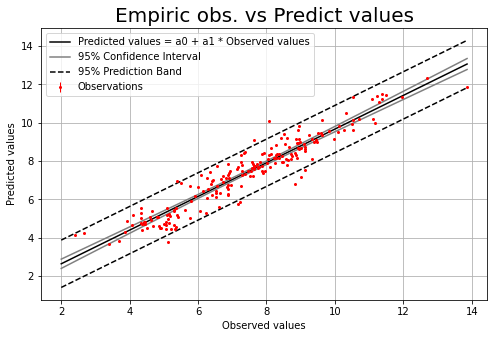

In [24]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [25]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [26]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: AEDR_mean: mean - 0.443, median - 0.445, CI - [0.383-0.515]

SHAP-values for: Azimuth: mean - 0.164, median - 0.164, CI - [0.13-0.201]

SHAP-values for: D_cm: mean - 0.197, median - 0.199, CI - [0.172-0.222]

SHAP-values for: Distance_km: mean - 0.419, median - 0.418, CI - [0.338-0.498]

SHAP-values for: F_Soil_ID: mean - 0.129, median - 0.13, CI - [0.101-0.156]

SHAP-values for: Species_ID: mean - 0.094, median - 0.092, CI - [0.071-0.116]

SHAP-values for: Sr_2021_kBq_m: mean - 0.682, median - 0.688, CI - [0.606-0.753]



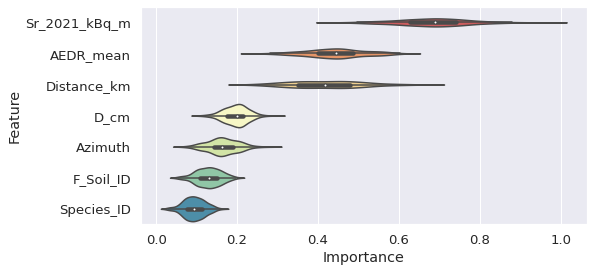

In [30]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'D_cm', 'Azimuth', 'F_Soil_ID', 'Species_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [31]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [32]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 98.1, median: 94.5,
 pred. interval (P(0.025)-P(0.975)): 46.925-161.0, 
 conf. interval (p-value=0.95): 67.155-129.018 
***
Aggregate bias statistic: 
 mean: -0.014, median: -0.019,
 pred. interval (P(0.025)-P(0.975)): -0.21-0.19, 
 conf. interval (p-value=0.95): -0.105-0.08 
***
Aggregate RMSE statistic: 
 mean: 0.671, median: 0.67, pred. interval (P(0.025)-P(0.975)): 0.523-0.838, 
 conf. interval (p-value=0.95): 0.604-0.74 
***
Aggregate MSE statistic: 
 mean: 0.457, median: 0.449, pred. interval (P(0.025)-P(0.975)): 0.274-0.702, 
 conf. interval (p-value=0.95): 0.365-0.548 
***
Aggregate R^2 statistic: 
 mean: 0.883, median: 0.887, pred. interval (P(0.025)-P(0.975)): 0.803-0.936, 
 conf. interval (p-value=0.95): 0.855-0.913 
***
Aggregate bias(%) statistic: 
 mean: -0.179, median: -0.263, pred. interval (P(0.025)-P(0.975)): -2.821-2.693, 
 conf. interval (p-value=0.95): -1.425-1.

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

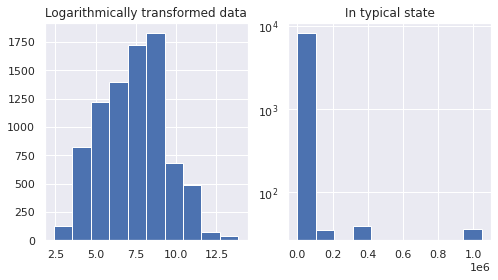

In [33]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [34]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 3, 6, 9, 12, 15])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 1000, 10000, 50000, 100000, 1000000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

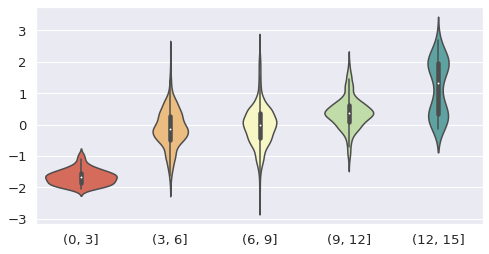

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

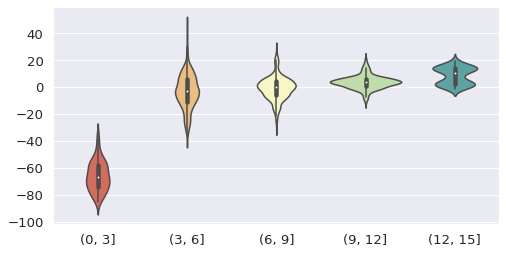

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

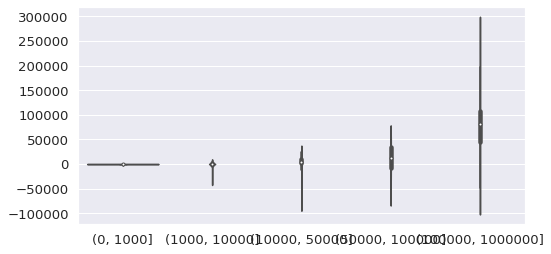

In [37]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

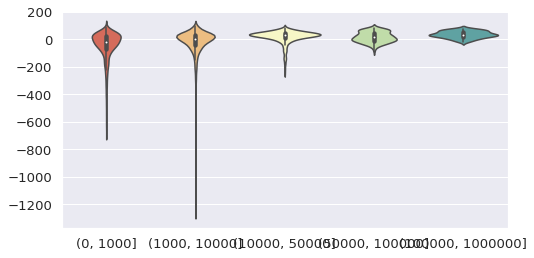

In [38]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [39]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [40]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [41]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:6.55662
[1]	validation_0-rmse:6.00064
[2]	validation_0-rmse:5.49198
[3]	validation_0-rmse:5.03199
[4]	validation_0-rmse:4.61111
[5]	validation_0-rmse:4.22998
[6]	validation_0-rmse:3.89392
[7]	validation_0-rmse:3.57629
[8]	validation_0-rmse:3.28119
[9]	validation_0-rmse:3.00603


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:2.77445
[11]	validation_0-rmse:2.56195
[12]	validation_0-rmse:2.36963
[13]	validation_0-rmse:2.19663
[14]	validation_0-rmse:2.03657
[15]	validation_0-rmse:1.89121
[16]	validation_0-rmse:1.75308
[17]	validation_0-rmse:1.63450
[18]	validation_0-rmse:1.52385
[19]	validation_0-rmse:1.42357
[20]	validation_0-rmse:1.34303
[21]	validation_0-rmse:1.26173
[22]	validation_0-rmse:1.18357
[23]	validation_0-rmse:1.11503
[24]	validation_0-rmse:1.05937
[25]	validation_0-rmse:1.00869
[26]	validation_0-rmse:0.96443
[27]	validation_0-rmse:0.92572
[28]	validation_0-rmse:0.89276
[29]	validation_0-rmse:0.85653
[30]	validation_0-rmse:0.82526
[31]	validation_0-rmse:0.80362
[32]	validation_0-rmse:0.78607
[33]	validation_0-rmse:0.76628
[34]	validation_0-rmse:0.74238
[35]	validation_0-rmse:0.72632
[36]	validation_0-rmse:0.70985
[37]	validation_0-rmse:0.70128
[38]	validation_0-rmse:0.68735
[39]	validation_0-rmse:0.67338
[40]	validation_0-rmse:0.66470
[41]	validation_0-rmse:0.65388
[42]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [42]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 163


In [43]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

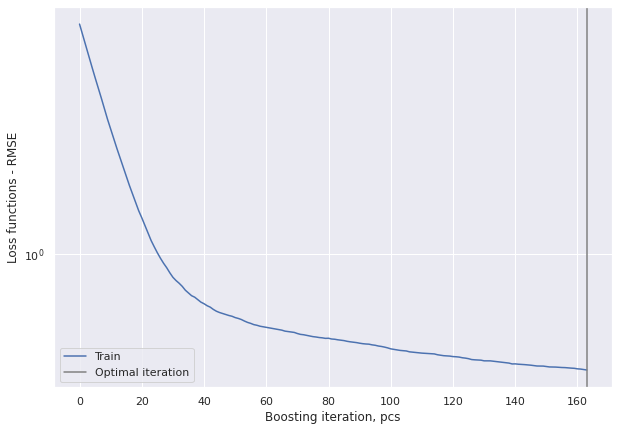

In [44]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [45]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.00
RMSE: 0.4
Relative RMSE(%):  5.234
MSE: 0.1
R square: 96.4%


In [46]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.964
Uncertainty
a0: 0.36+/-0.10
a1: 0.951+/-0.013


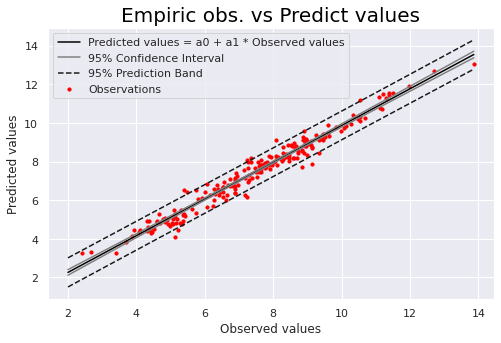

In [48]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

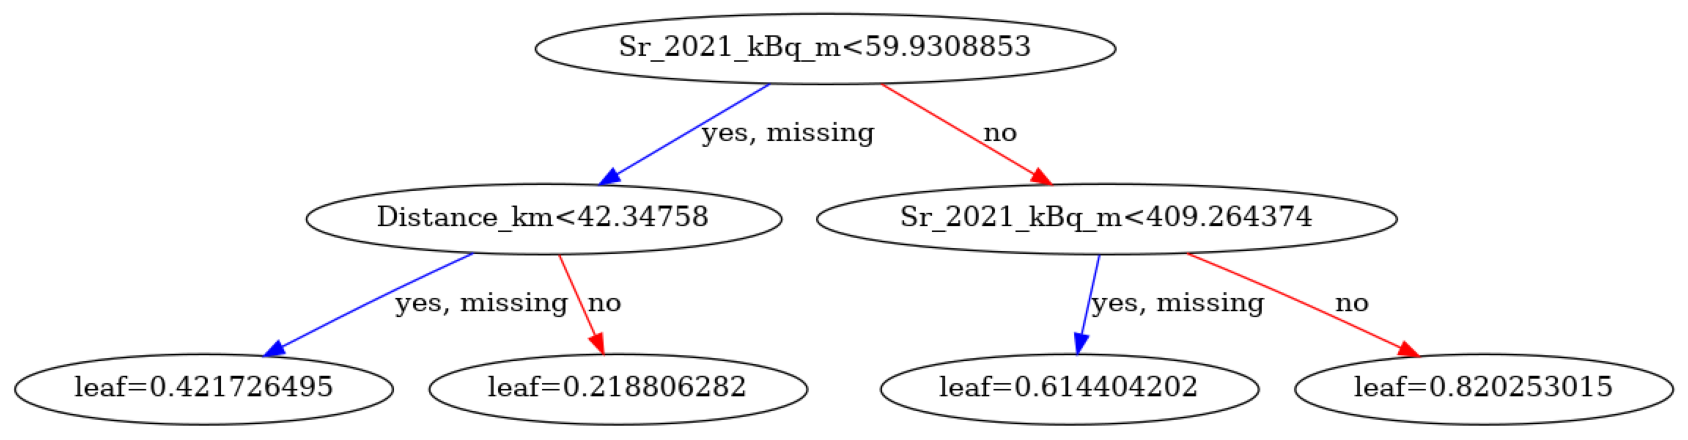

In [50]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

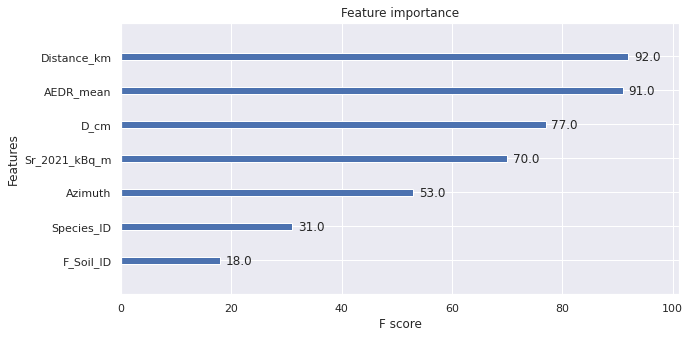

In [52]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

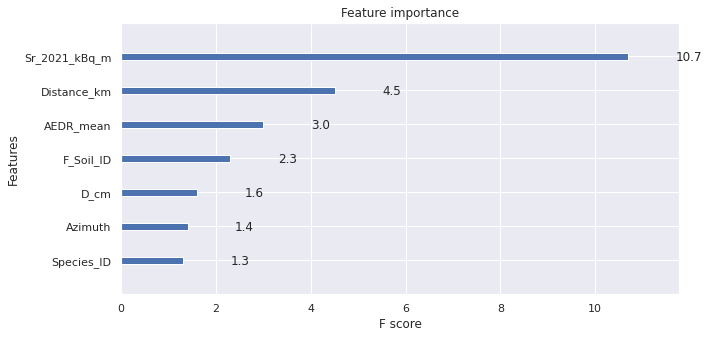

In [53]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

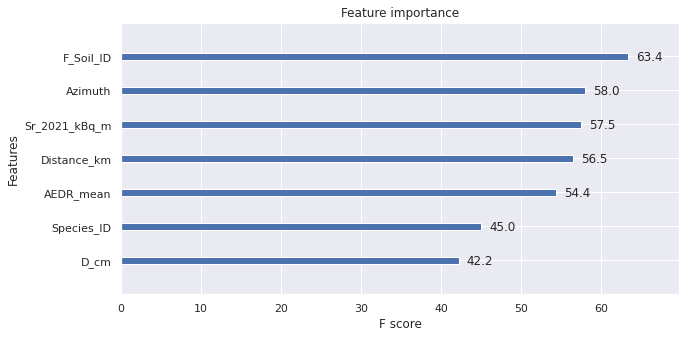

In [54]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [55]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


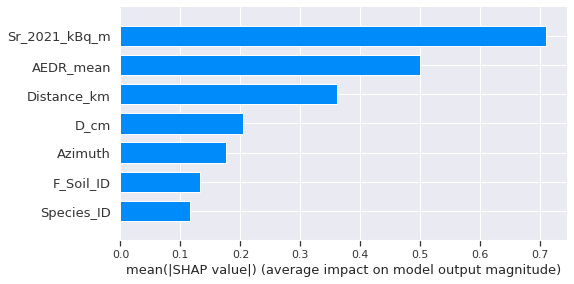

In [56]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

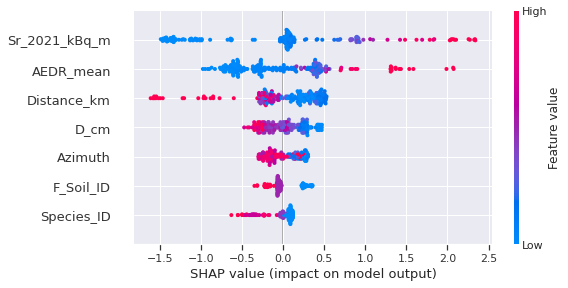

In [57]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

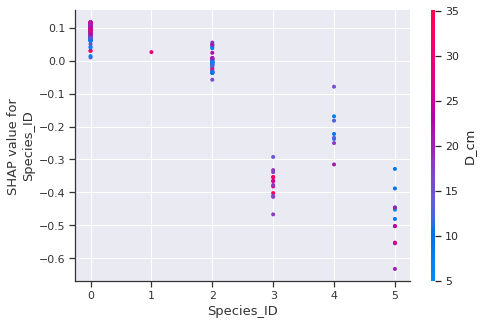

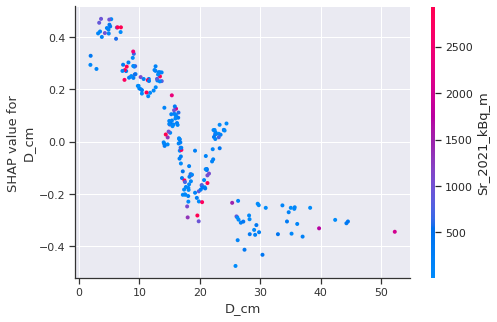

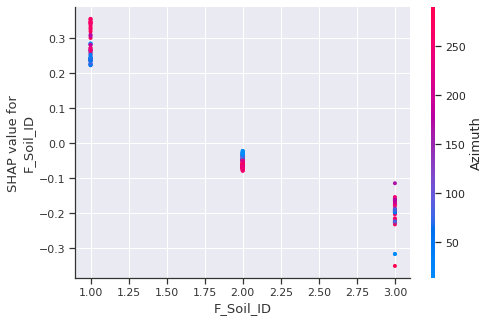

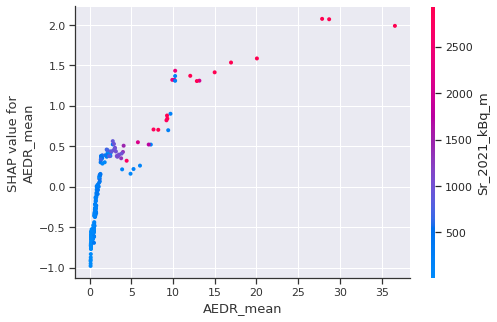

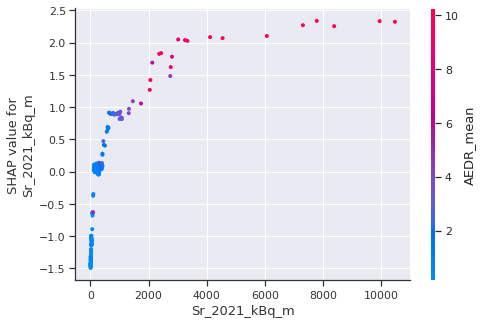

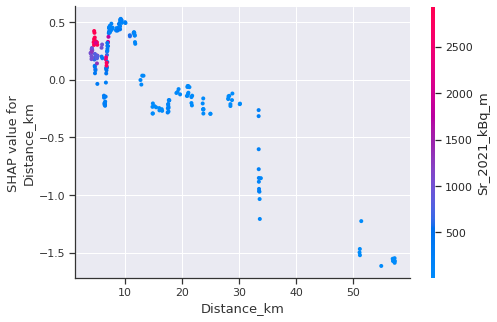

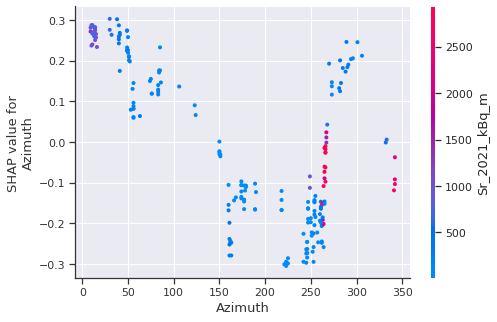

In [58]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [59]:
# Save to JSON
f_xgb_model.save_model("../02_output_data/XGBoost_models/02_LN_Sr_content_with_geo_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../02_output_data/XGBoost_models/02_LN_Sr_content_with_geo_XGB_model.txt")